#ML for metastasis

ML classifiers for metastatic vs non-metastatic protein sequences.

1.   Get fasta sequences and convert them into TXT (metastatic and non-metastatic proteins)
2.   Calculate molecular descriptors (dataset for ML)
3.   Build ML classifiers for metastatic and non-metastatic protein sequences (split dataset, build models, feature selection, model comparison)
4. Statistical analysis



In [ ]:
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set path to dataset subfolder
dsPath = "/content/drive/My Drive/TFM/dataset/" #"./dataset/"

In [ ]:
# Print content in drive to check if it is OK
for filename in os.listdir(dsPath):
  print(filename)

MODELO_1_NEGATIVE_metastasis.fasta
MODELO_1_POSITIVE_metastasis.fasta
dsMix.normFS(210).csv
dsAAC.normFS(5).csv
dsDPC.normFS(100).csv
dsMix.normFS(105).csv
metastasis_POS.csv
Errors.csv
metastasis_NEG.csv
dsAAC.csv
dsDPC.csv
dsMix.csv
dsAAC_norm_scalerMinMax.pkl
dsAAC_norm.csv
dsDPC_norm_scalerMinMax.pkl
dsDPC_norm.csv
dsMix_norm_scalerMinMax.pkl
dsMix_norm.csv
dsAAC.normFS_RFE(10).csv
dsAAC.normFS(10).csv
dsDPC.normFS(200).csv


In [ ]:
# Set path to results subfolder
resPath = "/content/drive/My Drive/TFM/results/" #"./results/"

##Convert FASTA to CSV format

Read all the sequences for metastatic and non-metastatic proteins and convert in ProteinName, Sequence format as CSV files.

In [ ]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.6 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO

In [ ]:
# Define a function to read fasta sequences one at a time
def fasta_generator(input_file):
    with open(input_file, 'r') as fasta_file:
        for record in SeqIO.parse(fasta_file, 'fasta'):
            yield record

In [ ]:
# Define 2 lists with protein name
metastasis_POS = []  # metastatic proteins
metastasis_NEG = []  # non-metastatic proteins

In [ ]:
# Get fasta sequences for metastasis_POS proteins
# Define fasta file to read and csv file to write the protein name and the sequences
inFile  = dsPath+'MODELO_1_POSITIVE_metastasis.fasta' # to read
outFile = dsPath+'metastasis_POS.csv'       # to write

# Open the output file for writing
with open(outFile, 'w') as out_file:
  out_file.write(f'ProteinDescription,Sequence\n')  # write the header
  # Iterate over each fasta sequence using the generator
  for fasta in fasta_generator(inFile):
      name = fasta.id
      sequence = str(fasta.seq)               # convert the sequence to a string
      out_file.write(f'{name},{sequence}\n')  # write only the sequence to the output file
      metastasis_POS.append(name+","+sequence)           # add the sequence to a list TFs

out_file.close()

In [ ]:
# Checking metastasis_POS list
print("No of metastasis_POS sequences:", len(metastasis_POS))
# Print first sequence in metastasis_POS to check if it is OK
print("First metastasis_POS sequence:\n"+metastasis_POS[0])

No of metastasis_POS sequences: 220
First metastasis_POS sequence:
sp|P04637|P53_HUMAN,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD


In [ ]:
# Get fasta sequences for metastasis_NEG proteins
# Define fasta file to read and csv file to write the protein names and sequences
inFile  = dsPath+'MODELO_1_NEGATIVE_metastasis.fasta'
outFile = dsPath+'metastasis_NEG.csv'

# Open the output file for writing
with open(outFile, 'w') as out_file:
  out_file.write(f'ProteinDescription,Sequence\n')  # write the header
  # Iterate over each fasta sequence using the generator
  for fasta in fasta_generator(inFile):
      name = fasta.id
      sequence = str(fasta.seq)               # convert the sequence to a string
      out_file.write(f'{name},{sequence}\n')  # write only the sequence to the output file
      metastasis_NEG.append(name+","+sequence)        # add the sequence to a list

out_file.close()

In [ ]:
# Checking metastasis_NEG list
print("No of metastasis_NEG sequences:", len(metastasis_NEG))
# Print first sequence to check if it is OK
print("First metastasis_NEG sequence:\n"+metastasis_NEG[0])

No of metastasis_NEG sequences: 218
First metastasis_NEG sequence:
sp|Q9NRG9|AAAS_HUMAN,MCSLGLFPPPPPRGQVTLYEHNNELVTGSSYESPPPDFRGQWINLPVLQLTKDPLKTPGRLDHGTRTAFIHHREQVWKRCINIWRDVGLFGVLNEIANSEEEVFEWVKTASGWALALCRWASSLHGSLFPHLSLRSEDLIAEFAQVTNWSSCCLRVFAWHPHTNKFAVALLDDSVRVYNASSTIVPSLKHRLQRNVASLAWKPLSASVLAVACQSCILIWTLDPTSLSTRPSSGCAQVLSHPGHTPVTSLAWAPSGGRLLSASPVDAAIRVWDVSTETCVPLPWFRGGGVTNLLWSPDGSKILATTPSAVFRVWEAQMWTCERWPTLSGRCQTGCWSPDGSRLLFTVLGEPLIYSLSFPERCGEGKGCVGGAKSATIVADLSETTIQTPDGEERLGGEAHSMVWDPSGERLAVLMKGKPRVQDGKPVILLFRTRNSPVFELLPCGIIQGEPGAQPQLITFHPSFNKGALLSVGWSTGRIAHIPLYFVNAQFPRFSPVLGRAQEPPAGGGGSIHDLPLFTETSPTSAPWDPLPGPPPVLPHSPHSHL


##Check for common sequences in metastasis_POS and metastasis_NEG

In [ ]:
# List with errors
errors = []

# Check if we have the same sequence in both lists
with open(dsPath+"Errors.csv", 'w') as out_file:
  out_file.write(f'ErrNo,metastasis_POS,metastasis_NEG,metastasis_POS_seq, metastasis_NEG_seq\n')
  n=0
  for idmPOS in range(len(metastasis_POS)):
    name_metastasis_POS, seq_metastasis_POS = metastasis_POS[idmPOS].split(',')
    for idmNEG in range(len(metastasis_NEG)):
      name_metastasis_NEG, seq_metastasis_NEG = metastasis_NEG[idmNEG].split(',')
      if (name_metastasis_POS == name_metastasis_NEG):
        n=n+1
        print(n, name_metastasis_POS, name_metastasis_NEG, seq_metastasis_POS, seq_metastasis_NEG)
        out_file.write(f'{n},{name_metastasis_POS},{name_metastasis_NEG},{seq_metastasis_POS},{seq_metastasis_NEG}\n')
        errors.append(name_metastasis_NEG+","+seq_metastasis_NEG)        # add the sequence to a list
        continue
  if n==0: print("No errors!")
  else:
    print(errors)
out_file.close()

No errors!


##Get the list of sequences to use for descriptors calculation

In [ ]:
# Get only the lists of ONLY the sequences
listmPOS = []
for seqPOS in metastasis_POS:
    name_seqPOS, seq_seqPOS = seqPOS.split(',')
    listmPOS.append(seq_seqPOS)

# Get only the lists of ONLY the sequences
listmNEG = []
for seqNEG in metastasis_NEG:
    name_seqNEG, seq_seqNEG = seqNEG.split(',')
    listmNEG.append(seq_seqNEG)

In [ ]:
print("The study will use", len(listmPOS),"metastasic sequences vs.", len(listmNEG), "non metastasic sequences.")

The study will use 220 metastasic sequences vs. 218 non metastasic sequences.


##Molecular descriptors

In [ ]:
# Install package for protein molecular descriptors
!pip install propy3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.3/290.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
from propy import PyPro
import pandas as pd

###Descriptors from list (metastasis_POS and metastasis_NEG) to dataframes (AAC, DPC, Mix)

In [ ]:
def to_dataframe(list_sequences, is_POS):
    data_AAC = []  # list with AAC descriptors
    data_DPC = []  # list with DPC descriptors
    data_Mix = []  # list with Mix descriptors

    for sequence in list_sequences:  # for each sequence of the list
        DesObject = PyPro.GetProDes(sequence)  # create an object for descriptors
        amino_acid_composition = DesObject.GetAAComp()  # calculate amino_acid_composition (AAC) descriptors (dictionary)
        dipeptide_composition = DesObject.GetDPComp()  # calculate dipeptide_composition (DPC) descriptors (dictionary)
        data_AAC.append(list(amino_acid_composition.values()))  # add AAC descriptors to list data_AAC
        data_DPC.append(list(dipeptide_composition.values()))  # add DPC descriptors to list data_DPC
        data_Mix.append(list(amino_acid_composition.values()) + list(dipeptide_composition.values()))  # add both AAC and DPC descriptors (mix) to list data_Mix

    # create 3 dataframes, one for each set of descriptors: AAC, DPC and Mix,
    # using the descriptors values from the previous lists and the header with the descriptors names (dictionary keys)
    # amino_acid_composition, dipeptide_composition are dictionaries
    columns_AAC = list(amino_acid_composition.keys())
    columns_DPC = list(dipeptide_composition.keys())

    df_AAC = pd.DataFrame(data_AAC, columns=columns_AAC)
    df_DPC = pd.DataFrame(data_DPC, columns=columns_DPC)
    df_Mix = pd.DataFrame(data_Mix, columns=columns_AAC + columns_DPC)

    # add a new column as the last one with the class (metastasis_POS = 1; metastasis_NEG = 0)
    df_AAC['Class'] = 1 if is_POS else 0
    df_DPC['Class'] = 1 if is_POS else 0
    df_Mix['Class'] = 1 if is_POS else 0

    return df_AAC, df_DPC, df_Mix

# listmPOS
df_AAC_mPOS, df_DPC_mPOS, df_Mix_mPOS = to_dataframe(listmPOS, is_POS=True)

# listmNEG
df_AAC_mNEG, df_DPC_mNEG, df_Mix_mNEG = to_dataframe(listmNEG, is_POS=False)


In [ ]:
# Checking dataframes

# Metastasis_POS
#df_AAC_mPOS
#df_DPC_mPOS
#df_Mix_mPOS

# Metastasis_NEG
#df_AAC_mNEG
#df_DPC_mNEG
#df_Mix_mNEG

##Datasets

We will create different datasets using the previous dataframes with descriptors for metastasis_POS and metastasis_NEG.

### Datasets with all descriptors (no feature selection, without normalization)

We have 6 dataframes with descriptors for metastasis_POS and metastasis_NEG:

*   for metastasis_POS: df_AAC_mPOS, df_DPC_mPOS, df_Mix_mPOS
*   for metastasis_NEG: df_AAC_mNEG, df_DPC_mNEG, df_Mix_mNEG

We will mix descriptors for metastasis_POS and metastasis_NEG for each subset of descriptors: AAC, DPC and Mix (by merging the correspondent dataframes). We will obtain datasets: ds_AAC, ds_DPC, ds_Mix as dataframes and CSV files.



In [ ]:
ds_AAC = pd.concat([df_AAC_mPOS, df_AAC_mNEG], axis=0) # dataset for AAC (AAC descriptors for metastasis_POS and metastasis_NEG)
ds_DPC = pd.concat([df_DPC_mPOS, df_DPC_mNEG], axis=0) # dataset for DPC (DPC descriptors for metastasis_POS and metastasis_NEG)
ds_Mix = pd.concat([df_Mix_mPOS, df_Mix_mNEG], axis=0) # dataset for Mix (AAC and DPC descriptors for metastasis_POS and metastasis_NEG)

# Save the datasets on files (in your Gdrive folder)
# These are the datasets with all the descriptors, without feature selection, without data normalization!
ds_AAC.to_csv(dsPath+'dsAAC.csv', index=False)
ds_DPC.to_csv(dsPath+'dsDPC.csv', index=False)
ds_Mix.to_csv(dsPath+'dsMix.csv', index=False)

In [ ]:
# Checking dataframes
#ds_AAC
#ds_DPC
#ds_Mix

The datasets from dsAAC.csv, dsDPC.csv and dsMix.csv will be used in feature selections and directly to build ML models.

###Dataset description

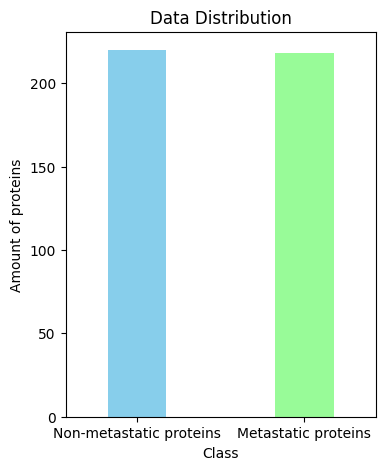

In [ ]:
data = ds_DPC

class_column = data.columns[-1]
class_count = data[class_column].value_counts()

plt.figure(figsize=(4, 5))

class_count.plot(kind='bar', color=['#87CEEB', '#98FB98'], width=0.35)

plt.xlabel('Class')
plt.ylabel('Amount of proteins')
plt.title('Data Distribution')

plt.xticks(ticks=[0, 1], labels=['Non-metastatic proteins', 'Metastatic proteins'], rotation=0, wrap=True)

plt.show()


###Normalized datasets of AAC, DPC and Mix

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

In [ ]:
# Normalises the datasets between 0 and 1

def normalize(ds, ds_name, ds_path):
    # create the normalized dataframe as copy of the raw dataset
    ds_norm = ds.copy()

    # create a scaler object
    scaler = MinMaxScaler()

    # select all columns except the last one (excluding the class)
    cols_to_scale = ds_norm.columns[:-1]

    # normalize the selected columns
    ds_norm[cols_to_scale] = scaler.fit_transform(ds_norm[cols_to_scale])

    # save the scaler for future predictions
    scaler_file = ds_path + 'ds{}_norm_scalerMinMax.pkl'.format(ds_name)
    joblib.dump(scaler, scaler_file)

    # save the normalized dataset as CSV file
    ds_norm.to_csv(ds_path + 'ds{}_norm.csv'.format(ds_name), index=False)

    return ds_norm

In [ ]:
# AAC dataset
ds_AAC_norm = normalize(ds_AAC, 'AAC', dsPath)

# DPC dataset
ds_DPC_norm = normalize(ds_DPC, 'DPC', dsPath)

# Mix dataset
ds_Mix_norm = normalize(ds_Mix, 'Mix', dsPath)

In [ ]:
# Checking the normalized datasets
#ds_AAC_norm
#ds_DPC_norm
#ds_Mix_norm

A         R         N         D         C         E         Q  \
0    0.284616  0.481374  0.524132  0.370388  0.245514  0.556739  0.272512   
1    0.210212  0.461947  0.311360  0.550454  0.255258  0.578836  0.393065   
2    0.179842  0.401921  0.771483  0.396955  0.289022  0.518961  0.327881   
3    0.291199  0.417127  0.817834  0.379476  0.128979  0.536100  0.403370   
4    0.975162  0.792855  0.377281  0.522800  0.061837  0.514221  0.012759   
..        ...       ...       ...       ...       ...       ...       ...   
213  0.252697  0.402357  0.712036  0.422512  0.266737  0.470537  0.261879   
214  0.267854  0.292346  0.328428  0.287190  0.516786  0.390680  0.398462   
215  0.399403  0.349607  0.592407  0.479531  0.225545  0.871354  0.342684   
216  0.224263  0.501819  0.968658  0.389031  0.241945  0.457264  0.344892   
217  0.324279  0.553842  0.579311  0.382817  0.303878  0.535954  0.475505   

            G         H         I  ...         K         M         F  \
0    0.106364  0.369139  0.199081  ...  0.344923  0.361137  0.259744   
1    0.105660  0.171058  0.776083  ...  0.573810  0.307336  0.294636   
2    0.078558  0.336171  0.650044  ...  0.456961  0.440317  0.382331   
3    0.091383  0.275098  0.395522  ...  0.474448  0.222604  0.153396   
4    0.175045  0.389677  0.188032  ...  0.000000  0.381229  0.059484   
..        ...       ...       ...  ...       ...       ...       ...   
213  0.068856  0.423591  0.608292  ...  0.733970  0.292664  0.406273   
214  0.085663  0.559789  0.480199  ...  0.423614  0.193655  0.207127   
215  0.086191  0.395352  0.304781  ...  0.360919  0.369597  0.253062   
216  0.094859  0.380219  0.551775  ...  0.339976  0.247588  0.465479   
217  0.121983  0.382246  0.205339  ...  0.106751  0.373959  0.243597   

            P         S         T         W         Y         V  Class  
0    0.455257  0.361341  0.397813  0.225221  0.294837  0.428117      1  
1    0.047268  0.127608  0.525050  0.000000  0.613107  0.791363      1  
2    0.145929  0.159474  0.213618  0.393584  0.470194  0.490092      1  
3    0.216414  0.631276  0.425249  0.108850  0.226471  0.371565      1  
4    0.251402  0.114509  0.159940  0.283628  0.165057  0.599177      1  
..        ...       ...       ...       ...       ...       ...    ...  
213  0.084805  0.208107  0.391054  0.101991  0.296640  0.516919      0  
214  0.255665  0.219729  0.240755  0.493805  0.632290  0.625911      0  
215  0.135270  0.117272  0.486879  0.258628  0.334363  0.789119      0  
216  0.084434  0.214347  0.246421  0.346681  0.524656  0.351655      0  
217  0.155753  0.463370  0.676243  0.000000  0.304107  0.343522      0  

[438 rows x 21 columns]

## Univariate feature selection

The normalized datasets for AAC, DPC and Mix will be used to build ML models and for selection features. This moment, we have 3 datasets (normalized datasets with pool features for AAC, DPC and Mix).

We will create 3 new datasets with the best features for AAC, DPC and Mix descriptors.

In [ ]:
# Function to obtain input descriptors and output class as arrays, and the list with the names of the descriptors

def getDataFromDataFrame(df, OutVar='Class'):
    # get X, Y data and column names from df
    print('\n-> Get X & Y data, Features list')
    print('Shape', df.shape)

    # select X and Y
    ds_y = df[OutVar]
    ds_X = df.drop(OutVar,axis = 1)
    Xdata = ds_X.values # get values of features
    Ydata = ds_y.values # get output values

    print('Shape X data:', Xdata.shape)
    print('Shape Y data:', Ydata.shape)
    print('Done!')

    # return data for X and Y, feature names as list
    return (Xdata, Ydata, list(ds_X.columns))

In [ ]:
# Univariate feature selection
from sklearn.feature_selection import f_classif, SelectKBest

def FeatureSelection(df,label,nFeats=1):
    if nFeats == 0:
        print("\n NO feature selection")
        return df

    # Get separated info
    Xdata, Ydata, Features = getDataFromDataFrame(df)  # out var = Class

    # Feature selection
    print('\n-> Univariate Feature selection')
    print('Initial columns:', list(df.columns))
    selector= SelectKBest(f_classif, k=nFeats)  # you can select other feature selection
    Xdata = selector.fit_transform(Xdata, Ydata)  # select the features

    # Get the selected features
    SelFeatures = []
    for i in selector.get_support(indices=True):
        SelFeatures.append(Features[i])

    # Create the new dataframe with selected features
    df = pd.DataFrame(Xdata,columns=SelFeatures)
    df['Class'] = Ydata  # add class column
    print('Final columns:', list(df.columns))

    # Save selected feature dataset
    selectFile = dsPath+'ds'+label+'.normFS('+str(nFeats)+').csv'  # dataset with selected features
    print('* Save selected features dataset:', selectFile)
    df.to_csv(selectFile, index=False)

    print('Done!')
    return df

###50% of descriptors

In [ ]:
# Univariate feature selection for AAC using the normalized dataset
ds_AAC_normFS50 = FeatureSelection(ds_AAC_norm,"AAC",nFeats=10) # select the best 10 features (10/20)
ds_AAC_normFS50 # check the feature selected dataset for AAC


-> Get X & Y data, Features list
Shape (438, 21)
Shape X data: (438, 20)
Shape Y data: (438,)
Done!

-> Univariate Feature selection
Initial columns: ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'Class']
Final columns: ['A', 'N', 'D', 'Q', 'G', 'L', 'M', 'F', 'T', 'W', 'Class']
* Save selected features dataset: /content/drive/My Drive/TFM/dataset/dsAAC.normFS(10).csv
Done!


A         N         D         Q         G         L         M  \
0    0.284616  0.524132  0.370388  0.272512  0.106364  0.356855  0.361137   
1    0.210212  0.311360  0.550454  0.393065  0.105660  0.278270  0.307336   
2    0.179842  0.771483  0.396955  0.327881  0.078558  0.517093  0.440317   
3    0.291199  0.817834  0.379476  0.403370  0.091383  0.316050  0.222604   
4    0.975162  0.377281  0.522800  0.012759  0.175045  0.477603  0.381229   
..        ...       ...       ...       ...       ...       ...       ...   
433  0.252697  0.712036  0.422512  0.261879  0.068856  0.444337  0.292664   
434  0.267854  0.328428  0.287190  0.398462  0.085663  0.508722  0.193655   
435  0.399403  0.592407  0.479531  0.342684  0.086191  0.318768  0.369597   
436  0.224263  0.968658  0.389031  0.344892  0.094859  0.563333  0.247588   
437  0.324279  0.579311  0.382817  0.475505  0.121983  0.402612  0.373959   

            F         T         W  Class  
0    0.259744  0.397813  0.225221      1  
1    0.294636  0.525050  0.000000      1  
2    0.382331  0.213618  0.393584      1  
3    0.153396  0.425249  0.108850      1  
4    0.059484  0.159940  0.283628      1  
..        ...       ...       ...    ...  
433  0.406273  0.391054  0.101991      0  
434  0.207127  0.240755  0.493805      0  
435  0.253062  0.486879  0.258628      0  
436  0.465479  0.246421  0.346681      0  
437  0.243597  0.676243  0.000000      0  

[438 rows x 11 columns]

In [ ]:
# Univariate feature selection for DPC using the normalized dataset
ds_DPC_normFS50 = FeatureSelection(ds_DPC_norm,"DPC",nFeats=200) # select the best 200 features (200/400)
ds_DPC_normFS50 # check the feature selected dataset for DPC


-> Get X & Y data, Features list
Shape (438, 401)
Shape X data: (438, 400)
Shape Y data: (438,)
Done!

-> Univariate Feature selection
Initial columns: ['AA', 'AR', 'AN', 'AD', 'AC', 'AE', 'AQ', 'AG', 'AH', 'AI', 'AL', 'AK', 'AM', 'AF', 'AP', 'AS', 'AT', 'AW', 'AY', 'AV', 'RA', 'RR', 'RN', 'RD', 'RC', 'RE', 'RQ', 'RG', 'RH', 'RI', 'RL', 'RK', 'RM', 'RF', 'RP', 'RS', 'RT', 'RW', 'RY', 'RV', 'NA', 'NR', 'NN', 'ND', 'NC', 'NE', 'NQ', 'NG', 'NH', 'NI', 'NL', 'NK', 'NM', 'NF', 'NP', 'NS', 'NT', 'NW', 'NY', 'NV', 'DA', 'DR', 'DN', 'DD', 'DC', 'DE', 'DQ', 'DG', 'DH', 'DI', 'DL', 'DK', 'DM', 'DF', 'DP', 'DS', 'DT', 'DW', 'DY', 'DV', 'CA', 'CR', 'CN', 'CD', 'CC', 'CE', 'CQ', 'CG', 'CH', 'CI', 'CL', 'CK', 'CM', 'CF', 'CP', 'CS', 'CT', 'CW', 'CY', 'CV', 'EA', 'ER', 'EN', 'ED', 'EC', 'EE', 'EQ', 'EG', 'EH', 'EI', 'EL', 'EK', 'EM', 'EF', 'EP', 'ES', 'ET', 'EW', 'EY', 'EV', 'QA', 'QR', 'QN', 'QD', 'QC', 'QE', 'QQ', 'QG', 'QH', 'QI', 'QL', 'QK', 'QM', 'QF', 'QP', 'QS', 'QT', 'QW', 'QY', 'QV', 'GA', 

AA        AC        AE        AG        AL        AK        AM  \
0    0.148936  0.141304  0.000000  0.088737  0.150685  0.261538  0.344595   
1    0.000000  0.000000  0.000000  0.361775  0.103718  0.271795  0.358108   
2    0.036750  0.048913  0.073643  0.095563  0.146771  0.143590  0.189189   
3    0.088975  0.038043  0.189922  0.037543  0.090020  0.251282  0.189189   
4    0.624758  0.000000  1.000000  0.880546  0.252446  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
433  0.044487  0.125000  0.178295  0.156997  0.135029  0.235897  0.155405   
434  0.000000  0.244565  0.000000  0.000000  0.176125  0.230769  0.000000   
435  0.150870  0.000000  0.604651  0.044369  0.152642  0.266667  0.351351   
436  0.181818  0.168478  0.000000  0.000000  0.060665  0.158974  0.000000   
437  0.152805  0.141304  0.205426  0.088737  0.103718  0.000000  0.358108   

           AF        AS        AW  ...        VC        VE        VQ  \
0    0.000000  0.000000  0.000000  ...  0.254902  0.329060  0.152047   
1    0.273196  0.000000  0.000000  ...  0.000000  0.226496  0.000000   
2    0.000000  0.000000  0.111111  ...  0.274510  0.158120  0.163743   
3    0.036082  0.324074  0.000000  ...  0.107843  0.149573  0.146199   
4    0.000000  0.000000  0.802469  ...  0.000000  0.277778  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
433  0.237113  0.106481  0.000000  ...  0.225490  0.000000  0.269006   
434  0.000000  0.208333  0.000000  ...  0.441176  0.000000  0.789474   
435  0.000000  0.060185  0.160494  ...  0.509804  0.666667  0.076023   
436  0.000000  0.291667  0.000000  ...  0.000000  0.000000  0.181287   
437  0.134021  0.245370  0.000000  ...  0.000000  0.111111  0.152047   

           VG        VL        VK        VF        VP        VS  Class  
0    0.144444  0.111111  0.000000  0.000000  0.221739  0.000000      1  
1    0.888889  0.226496  0.828125  0.335443  0.230435  0.000000      1  
2    0.105556  0.119658  0.437500  0.000000  0.160870  0.200855      1  
3    0.116667  0.179487  0.164062  0.069620  0.078261  0.329060      1  
4    0.000000  0.277778  0.000000  0.000000  0.000000  0.000000      1  
..        ...       ...       ...       ...       ...       ...    ...  
433  0.127778  0.491453  0.539062  0.145570  0.200000  0.098291      0  
434  0.000000  0.384615  0.703125  0.284810  0.391304  0.000000      0  
435  0.216667  0.055556  0.203125  0.164557  0.282609  0.055556      0  
436  0.172222  0.269231  0.242188  0.000000  0.000000  0.000000      0  
437  0.000000  0.000000  0.000000  0.000000  0.000000  0.111111      0  

[438 rows x 201 columns]

In [ ]:
# Univariate feature selection for Mix using the normalized dataset
ds_Mix_normFS50 = FeatureSelection(ds_Mix_norm,"Mix",nFeats=210) # select the best 210 features (210/420)
ds_Mix_normFS50 # check the feature selected dataset for Mix


-> Get X & Y data, Features list
Shape (438, 421)
Shape X data: (438, 420)
Shape Y data: (438,)
Done!

-> Univariate Feature selection
Initial columns: ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'AA', 'AR', 'AN', 'AD', 'AC', 'AE', 'AQ', 'AG', 'AH', 'AI', 'AL', 'AK', 'AM', 'AF', 'AP', 'AS', 'AT', 'AW', 'AY', 'AV', 'RA', 'RR', 'RN', 'RD', 'RC', 'RE', 'RQ', 'RG', 'RH', 'RI', 'RL', 'RK', 'RM', 'RF', 'RP', 'RS', 'RT', 'RW', 'RY', 'RV', 'NA', 'NR', 'NN', 'ND', 'NC', 'NE', 'NQ', 'NG', 'NH', 'NI', 'NL', 'NK', 'NM', 'NF', 'NP', 'NS', 'NT', 'NW', 'NY', 'NV', 'DA', 'DR', 'DN', 'DD', 'DC', 'DE', 'DQ', 'DG', 'DH', 'DI', 'DL', 'DK', 'DM', 'DF', 'DP', 'DS', 'DT', 'DW', 'DY', 'DV', 'CA', 'CR', 'CN', 'CD', 'CC', 'CE', 'CQ', 'CG', 'CH', 'CI', 'CL', 'CK', 'CM', 'CF', 'CP', 'CS', 'CT', 'CW', 'CY', 'CV', 'EA', 'ER', 'EN', 'ED', 'EC', 'EE', 'EQ', 'EG', 'EH', 'EI', 'EL', 'EK', 'EM', 'EF', 'EP', 'ES', 'ET', 'EW', 'EY', 'EV', 'QA', 'QR', 'QN', 'QD', 'Q

A         N         D         C         Q         G         H  \
0    0.284616  0.524132  0.370388  0.245514  0.272512  0.106364  0.369139   
1    0.210212  0.311360  0.550454  0.255258  0.393065  0.105660  0.171058   
2    0.179842  0.771483  0.396955  0.289022  0.327881  0.078558  0.336171   
3    0.291199  0.817834  0.379476  0.128979  0.403370  0.091383  0.275098   
4    0.975162  0.377281  0.522800  0.061837  0.012759  0.175045  0.389677   
..        ...       ...       ...       ...       ...       ...       ...   
433  0.252697  0.712036  0.422512  0.266737  0.261879  0.068856  0.423591   
434  0.267854  0.328428  0.287190  0.516786  0.398462  0.085663  0.559789   
435  0.399403  0.592407  0.479531  0.225545  0.342684  0.086191  0.395352   
436  0.224263  0.968658  0.389031  0.241945  0.344892  0.094859  0.380219   
437  0.324279  0.579311  0.382817  0.303878  0.475505  0.121983  0.382246   

            L         K         M  ...        VC        VE        VQ  \
0    0.356855  0.344923  0.361137  ...  0.254902  0.329060  0.152047   
1    0.278270  0.573810  0.307336  ...  0.000000  0.226496  0.000000   
2    0.517093  0.456961  0.440317  ...  0.274510  0.158120  0.163743   
3    0.316050  0.474448  0.222604  ...  0.107843  0.149573  0.146199   
4    0.477603  0.000000  0.381229  ...  0.000000  0.277778  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
433  0.444337  0.733970  0.292664  ...  0.225490  0.000000  0.269006   
434  0.508722  0.423614  0.193655  ...  0.441176  0.000000  0.789474   
435  0.318768  0.360919  0.369597  ...  0.509804  0.666667  0.076023   
436  0.563333  0.339976  0.247588  ...  0.000000  0.000000  0.181287   
437  0.402612  0.106751  0.373959  ...  0.000000  0.111111  0.152047   

           VG        VL        VK        VF        VP        VS  Class  
0    0.144444  0.111111  0.000000  0.000000  0.221739  0.000000      1  
1    0.888889  0.226496  0.828125  0.335443  0.230435  0.000000      1  
2    0.105556  0.119658  0.437500  0.000000  0.160870  0.200855      1  
3    0.116667  0.179487  0.164062  0.069620  0.078261  0.329060      1  
4    0.000000  0.277778  0.000000  0.000000  0.000000  0.000000      1  
..        ...       ...       ...       ...       ...       ...    ...  
433  0.127778  0.491453  0.539062  0.145570  0.200000  0.098291      0  
434  0.000000  0.384615  0.703125  0.284810  0.391304  0.000000      0  
435  0.216667  0.055556  0.203125  0.164557  0.282609  0.055556      0  
436  0.172222  0.269231  0.242188  0.000000  0.000000  0.000000      0  
437  0.000000  0.000000  0.000000  0.000000  0.000000  0.111111      0  

[438 rows x 211 columns]

###25% of descriptors

In [ ]:
# Univariate feature selection for AAC using the normalized dataset
ds_AAC_normFS25 = FeatureSelection(ds_AAC_norm,"AAC",nFeats=5) # select the best 5 features (5/20)
ds_AAC_normFS25 # check the feature selected dataset for AAC


-> Get X & Y data, Features list
Shape (438, 21)
Shape X data: (438, 20)
Shape Y data: (438,)
Done!

-> Univariate Feature selection
Initial columns: ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'Class']
Final columns: ['A', 'N', 'D', 'L', 'M', 'Class']
* Save selected features dataset: /content/drive/My Drive/TFM/dataset/dsAAC.normFS(5).csv
Done!


A         N         D         L         M  Class
0    0.284616  0.524132  0.370388  0.356855  0.361137      1
1    0.210212  0.311360  0.550454  0.278270  0.307336      1
2    0.179842  0.771483  0.396955  0.517093  0.440317      1
3    0.291199  0.817834  0.379476  0.316050  0.222604      1
4    0.975162  0.377281  0.522800  0.477603  0.381229      1
..        ...       ...       ...       ...       ...    ...
433  0.252697  0.712036  0.422512  0.444337  0.292664      0
434  0.267854  0.328428  0.287190  0.508722  0.193655      0
435  0.399403  0.592407  0.479531  0.318768  0.369597      0
436  0.224263  0.968658  0.389031  0.563333  0.247588      0
437  0.324279  0.579311  0.382817  0.402612  0.373959      0

[438 rows x 6 columns]

In [ ]:
# Univariate feature selection for DPC using the normalized dataset
ds_DPC_normFS25 = FeatureSelection(ds_DPC_norm,"DPC",nFeats=100) # select the best 100 features (100/400)
ds_DPC_normFS25 # check the feature selected dataset for DPC


-> Get X & Y data, Features list
Shape (438, 401)
Shape X data: (438, 400)
Shape Y data: (438,)
Done!

-> Univariate Feature selection
Initial columns: ['AA', 'AR', 'AN', 'AD', 'AC', 'AE', 'AQ', 'AG', 'AH', 'AI', 'AL', 'AK', 'AM', 'AF', 'AP', 'AS', 'AT', 'AW', 'AY', 'AV', 'RA', 'RR', 'RN', 'RD', 'RC', 'RE', 'RQ', 'RG', 'RH', 'RI', 'RL', 'RK', 'RM', 'RF', 'RP', 'RS', 'RT', 'RW', 'RY', 'RV', 'NA', 'NR', 'NN', 'ND', 'NC', 'NE', 'NQ', 'NG', 'NH', 'NI', 'NL', 'NK', 'NM', 'NF', 'NP', 'NS', 'NT', 'NW', 'NY', 'NV', 'DA', 'DR', 'DN', 'DD', 'DC', 'DE', 'DQ', 'DG', 'DH', 'DI', 'DL', 'DK', 'DM', 'DF', 'DP', 'DS', 'DT', 'DW', 'DY', 'DV', 'CA', 'CR', 'CN', 'CD', 'CC', 'CE', 'CQ', 'CG', 'CH', 'CI', 'CL', 'CK', 'CM', 'CF', 'CP', 'CS', 'CT', 'CW', 'CY', 'CV', 'EA', 'ER', 'EN', 'ED', 'EC', 'EE', 'EQ', 'EG', 'EH', 'EI', 'EL', 'EK', 'EM', 'EF', 'EP', 'ES', 'ET', 'EW', 'EY', 'EV', 'QA', 'QR', 'QN', 'QD', 'QC', 'QE', 'QQ', 'QG', 'QH', 'QI', 'QL', 'QK', 'QM', 'QF', 'QP', 'QS', 'QT', 'QW', 'QY', 'QV', 'GA', 

AA        AL        AS        AW        AV        RA        RN  \
0    0.148936  0.150685  0.000000  0.000000  0.000000  0.197436  0.439655   
1    0.000000  0.103718  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.036750  0.146771  0.000000  0.111111  0.082609  0.071795  0.163793   
3    0.088975  0.090020  0.324074  0.000000  0.121739  0.053846  0.362069   
4    0.624758  0.252446  0.000000  0.802469  0.000000  0.497436  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
433  0.044487  0.135029  0.106481  0.000000  0.000000  0.117949  0.396552   
434  0.000000  0.176125  0.208333  0.000000  0.000000  0.115385  0.000000   
435  0.150870  0.152642  0.060185  0.160494  0.339130  0.100000  0.112069   
436  0.181818  0.060665  0.291667  0.000000  0.134783  0.079487  0.810345   
437  0.152805  0.103718  0.245370  0.000000  0.000000  0.202564  0.224138   

           RD        RG        RL  ...        YQ        YH        YM  \
0    0.141304  0.076471  0.086957  ...  0.309524  0.000000  0.262626   
1    0.288043  0.000000  0.177258  ...  0.000000  0.000000  0.535354   
2    0.255435  0.026471  0.157191  ...  0.107143  0.091837  0.090909   
3    0.059783  0.144118  0.083612  ...  0.047619  0.040816  0.000000   
4    0.701087  0.379412  0.431438  ...  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
433  0.500000  0.135294  0.230769  ...  0.000000  0.000000  0.000000   
434  0.000000  0.132353  0.150502  ...  0.535714  0.459184  0.000000   
435  0.070652  0.114706  0.130435  ...  0.000000  0.000000  0.000000   
436  0.168478  0.091176  0.000000  ...  0.000000  0.316327  0.313131   
437  0.141304  0.232353  0.086957  ...  0.000000  0.000000  0.000000   

           YT        VC        VQ        VG        VL        VF  Class  
0    0.000000  0.254902  0.152047  0.144444  0.111111  0.000000      1  
1    0.504762  0.000000  0.000000  0.888889  0.226496  0.335443      1  
2    0.180952  0.274510  0.163743  0.105556  0.119658  0.000000      1  
3    0.104762  0.107843  0.146199  0.116667  0.179487  0.069620      1  
4    0.000000  0.000000  0.000000  0.000000  0.277778  0.000000      1  
..        ...       ...       ...       ...       ...       ...    ...  
433  0.219048  0.225490  0.269006  0.127778  0.491453  0.145570      0  
434  0.857143  0.441176  0.789474  0.000000  0.384615  0.284810      0  
435  0.123810  0.509804  0.076023  0.216667  0.055556  0.164557      0  
436  0.000000  0.000000  0.181287  0.172222  0.269231  0.000000      0  
437  0.247619  0.000000  0.152047  0.000000  0.000000  0.000000      0  

[438 rows x 101 columns]

In [ ]:
# Univariate feature selection for Mix using the normalized dataset
ds_Mix_normFS25 = FeatureSelection(ds_Mix_norm,"Mix",nFeats=105) # select the best 105 features (105/420)
ds_Mix_normFS25 # check the feature selected dataset for Mix


-> Get X & Y data, Features list
Shape (438, 421)
Shape X data: (438, 420)
Shape Y data: (438,)
Done!

-> Univariate Feature selection
Initial columns: ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'AA', 'AR', 'AN', 'AD', 'AC', 'AE', 'AQ', 'AG', 'AH', 'AI', 'AL', 'AK', 'AM', 'AF', 'AP', 'AS', 'AT', 'AW', 'AY', 'AV', 'RA', 'RR', 'RN', 'RD', 'RC', 'RE', 'RQ', 'RG', 'RH', 'RI', 'RL', 'RK', 'RM', 'RF', 'RP', 'RS', 'RT', 'RW', 'RY', 'RV', 'NA', 'NR', 'NN', 'ND', 'NC', 'NE', 'NQ', 'NG', 'NH', 'NI', 'NL', 'NK', 'NM', 'NF', 'NP', 'NS', 'NT', 'NW', 'NY', 'NV', 'DA', 'DR', 'DN', 'DD', 'DC', 'DE', 'DQ', 'DG', 'DH', 'DI', 'DL', 'DK', 'DM', 'DF', 'DP', 'DS', 'DT', 'DW', 'DY', 'DV', 'CA', 'CR', 'CN', 'CD', 'CC', 'CE', 'CQ', 'CG', 'CH', 'CI', 'CL', 'CK', 'CM', 'CF', 'CP', 'CS', 'CT', 'CW', 'CY', 'CV', 'EA', 'ER', 'EN', 'ED', 'EC', 'EE', 'EQ', 'EG', 'EH', 'EI', 'EL', 'EK', 'EM', 'EF', 'EP', 'ES', 'ET', 'EW', 'EY', 'EV', 'QA', 'QR', 'QN', 'QD', 'Q

A         N         D         Q         G         L         M  \
0    0.284616  0.524132  0.370388  0.272512  0.106364  0.356855  0.361137   
1    0.210212  0.311360  0.550454  0.393065  0.105660  0.278270  0.307336   
2    0.179842  0.771483  0.396955  0.327881  0.078558  0.517093  0.440317   
3    0.291199  0.817834  0.379476  0.403370  0.091383  0.316050  0.222604   
4    0.975162  0.377281  0.522800  0.012759  0.175045  0.477603  0.381229   
..        ...       ...       ...       ...       ...       ...       ...   
433  0.252697  0.712036  0.422512  0.261879  0.068856  0.444337  0.292664   
434  0.267854  0.328428  0.287190  0.398462  0.085663  0.508722  0.193655   
435  0.399403  0.592407  0.479531  0.342684  0.086191  0.318768  0.369597   
436  0.224263  0.968658  0.389031  0.344892  0.094859  0.563333  0.247588   
437  0.324279  0.579311  0.382817  0.475505  0.121983  0.402612  0.373959   

            F        AA        AL  ...        YQ        YH        YM  \
0    0.259744  0.148936  0.150685  ...  0.309524  0.000000  0.262626   
1    0.294636  0.000000  0.103718  ...  0.000000  0.000000  0.535354   
2    0.382331  0.036750  0.146771  ...  0.107143  0.091837  0.090909   
3    0.153396  0.088975  0.090020  ...  0.047619  0.040816  0.000000   
4    0.059484  0.624758  0.252446  ...  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
433  0.406273  0.044487  0.135029  ...  0.000000  0.000000  0.000000   
434  0.207127  0.000000  0.176125  ...  0.535714  0.459184  0.000000   
435  0.253062  0.150870  0.152642  ...  0.000000  0.000000  0.000000   
436  0.465479  0.181818  0.060665  ...  0.000000  0.316327  0.313131   
437  0.243597  0.152805  0.103718  ...  0.000000  0.000000  0.000000   

           YT        VC        VQ        VG        VL        VF  Class  
0    0.000000  0.254902  0.152047  0.144444  0.111111  0.000000      1  
1    0.504762  0.000000  0.000000  0.888889  0.226496  0.335443      1  
2    0.180952  0.274510  0.163743  0.105556  0.119658  0.000000      1  
3    0.104762  0.107843  0.146199  0.116667  0.179487  0.069620      1  
4    0.000000  0.000000  0.000000  0.000000  0.277778  0.000000      1  
..        ...       ...       ...       ...       ...       ...    ...  
433  0.219048  0.225490  0.269006  0.127778  0.491453  0.145570      0  
434  0.857143  0.441176  0.789474  0.000000  0.384615  0.284810      0  
435  0.123810  0.509804  0.076023  0.216667  0.055556  0.164557      0  
436  0.000000  0.000000  0.181287  0.172222  0.269231  0.000000      0  
437  0.247619  0.000000  0.152047  0.000000  0.000000  0.000000      0  

[438 rows x 106 columns]

### ML classifiers for metastasic vs non-metastasic protein sequences

We have 9 datasets to use with different ML classifier:
*   3 normalized datasets with all descriptors: ds_AAC_norm, ds_DPC_norm, ds_Mix_norm
*  3 dataset with 50% of the best features selected from the previous datasets: ds_AAC_normFS50 (only 10 features from 20), ds_DPC_normFS50 (only 200 features from 400), ds_Mix_normFS50 (only 210 features from 420).
*   3 dataset with 25% of the best features selected from the previous datasets: ds_AAC_normFS25 (only 5 features from 20), ds_DPC_normFS25 (only 100 features from 400), ds_Mix_normFS25 (only 105 features from 420).



###Functions for ML

In [ ]:
nfold = 10 # number of fold-CV

In [ ]:
# Create a function that will build ML models for one dataset

import numpy as np
import time

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, cohen_kappa_score, recall_score, precision_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

def MLOuterCV(Xdata, Ydata, folds, seed=2024):
    # define classifiers labels in results
    names = ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']

    classifiers = [GaussianNB(),
                   KNeighborsClassifier(5),
                   LinearDiscriminantAnalysis(solver='svd'),  # no random_state
                   SVC(kernel="linear", random_state=seed, gamma='scale'),
                   SVC(kernel='rbf', random_state=seed, gamma='scale'),
                   LogisticRegression(solver='lbfgs', random_state=seed),
                   MLPClassifier(random_state=seed, max_iter=50000, shuffle=False),
                   DecisionTreeClassifier(random_state=seed),
                   RandomForestClassifier(n_jobs=-1, random_state=seed),
                   XGBClassifier(n_jobs=-1, seed=seed)
                   ]

    # results dataframe: each column for a classifier
    df_res_auroc = pd.DataFrame(columns=names, dtype=object)
    df_res_f1 = pd.DataFrame(columns=names, dtype=object)
    df_res_kappa = pd.DataFrame(columns=names, dtype=object)
    df_res_recall = pd.DataFrame(columns=names, dtype=object)
    df_res_precision = pd.DataFrame(columns=names, dtype=object)

    # build each classifier
    print('* Building ' + str(folds) + '-fold CV for ' + str(len(names)) + ' classifiers:', str(names))
    total = time.time()

    # define a fold-CV for all the classifier
    outer_cv = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)

    print('ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)')

    for name, clf in zip(names, classifiers):
        start = time.time()

        # evaluate pipeline
        scores_auroc = cross_val_score(clf, Xdata, Ydata, cv=outer_cv, scoring='roc_auc', n_jobs=-1)
        scores_f1 = cross_val_score(clf, Xdata, Ydata, cv=outer_cv, scoring='f1', n_jobs=-1)
        scores_kappa = cross_val_score(clf, Xdata, Ydata, cv=outer_cv, scoring='accuracy', n_jobs=-1)
        scores_recall = cross_val_score(clf, Xdata, Ydata, cv=outer_cv, scoring='recall', n_jobs=-1)
        scores_precision = cross_val_score(clf, Xdata, Ydata, cv=outer_cv, scoring='precision', n_jobs=-1)

        df_res_auroc[name] = scores_auroc
        df_res_f1[name] = scores_f1
        df_res_kappa[name] = scores_kappa
        df_res_recall[name] = scores_recall
        df_res_precision[name] = scores_precision

        results_string = ('%s, %0.3f, %0.4f, %0.3f, %0.4f, %0.3f, %0.4f, %0.3f, %0.4f, %0.3f, %0.4f, %0.1f' %
                        (name, scores_auroc.mean(), scores_auroc.std(),
                          scores_f1.mean(), scores_f1.std(),
                          scores_kappa.mean(), scores_kappa.std(),
                          scores_recall.mean(), scores_recall.std(),
                          scores_precision.mean(), scores_precision.std(),
                          (time.time() - start) / 60))
        print(results_string)

    print('Total time:', (time.time() - total) / 60, ' mins')
    return [df_res_auroc, df_res_f1, df_res_kappa, df_res_recall, df_res_precision]


In [ ]:
# Function to build ML models, write the results plot box plots for a dataframe

def MLmodels(df, df_fold, nfold, label="X", label_y="Y"):
    df_results = None
    df_fold['Dataset'] = label
    df_fold['folds'] = nfold

    # add each result to a summary dataframe
    df_results = pd.concat([df_results,df_fold])
    summaryFile = resPath+'ML_'+label+'_'+label_y+'.csv' # ML metrics results
    boxplotFile = resPath+'ML_'+label+'_'+label_y+'.png' # box plot of the metrics

    # save all results
    print('\n==>> Saving summary', summaryFile)
    df_results.to_csv(summaryFile, index=False)

    # save boxplot
    classifierNames = list(df_results.columns)
    classifierNames.remove('Dataset')
    classifierNames.remove('folds')

    foldTypes=[nfold]

    plt.figure()
    plt.clf()
    print('==> Fold =', nfold)
    grouped = df_results[df_results['folds']==nfold].drop(['folds'], axis=1).groupby('Dataset')
    #grouped.boxplot(figsize=(16,12), return_type='axes')
    grouped.boxplot(return_type='axes')
    plt.title("")
    #plt.xlabel("Machine Learning methods for "+label,size=18)
    #plt.ylabel("AUROC ("+str(nfold)+"-fold CV)",size=18)
    plt.xlabel("Machine Learning methods for "+ label)
    plt.ylabel(label_y + "("+str(nfold)+"-fold CV)")
    #plt.tick_params(labelsize=14)
    plt.ylim(0,1.0)
    #plt.savefig(boxplotFile, dpi=1200)
    plt.savefig(boxplotFile)
    plt.show()

    df_results
    return

### ML models and box plots


-> Get X & Y data, Features list
Shape (438, 21)
Shape X data: (438, 20)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.695, 0.0512, 0.667, 0.0468, 0.615, 0.0643, 0.764, 0.0568, 0.596, 0.0681, 0.1
KNN, 0.679, 0.0838, 0.681, 0.0685, 0.635, 0.0920, 0.768, 0.0688, 0.617, 0.0890, 0.0
LDA, 0.685, 0.0540, 0.645, 0.0468, 0.646, 0.0334, 0.645, 0.0833, 0.652, 0.0392, 0.0
SVM, 0.674, 0.0619, 0.659, 0.0374, 0.635, 0.0480, 0.705, 0.0740, 0.630, 0.0701, 0.0
SVMrbf, 0.748, 0.0280, 0.701, 0.0587, 0.685, 0.0643, 0.732, 0.0625, 0.674, 0.0700, 0.0
LR, 0.679, 0.0657, 0.647, 0.0390, 0.639, 0.0416, 0.659, 0.0651, 0.641, 0.0537, 0.0
MLP, 0.681, 0.0562, 0.650, 0.0276, 0.639, 0.0327, 0.668, 0.0577, 0.638, 0.0421, 1.1
DT, 0.605, 0.0603, 0.604, 0.0574, 0.605, 0.0601, 0.600, 0.0698

<Figure size 640x480 with 0 Axes>

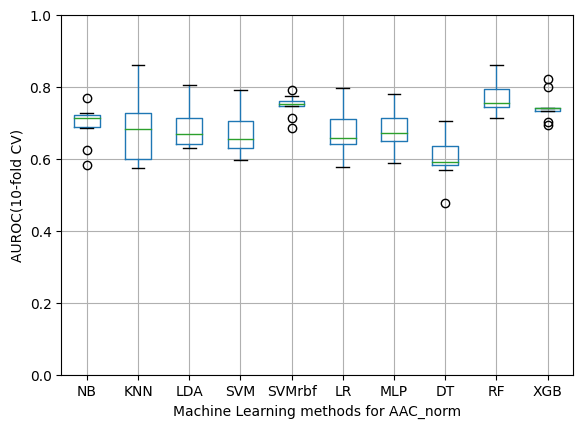


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

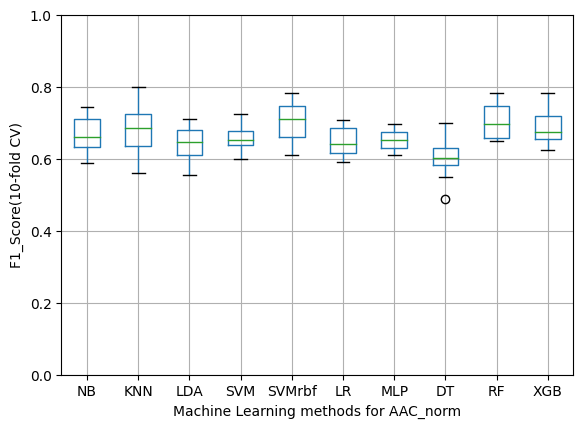


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

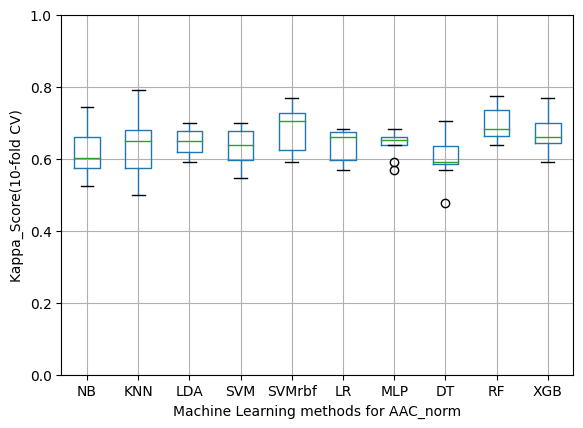


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

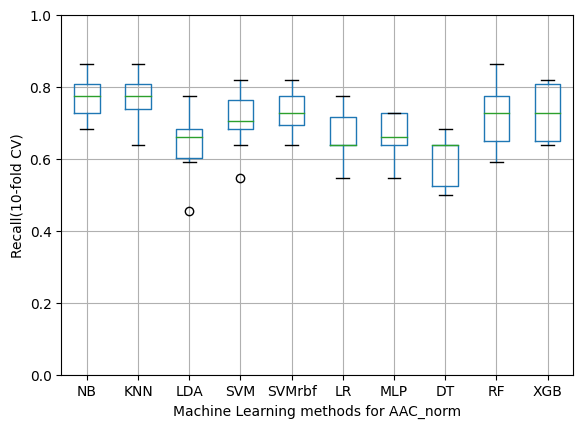


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

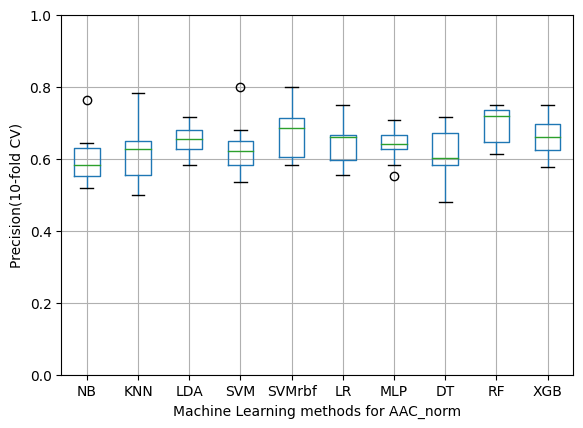

In [ ]:
# ML for AAC normalized dataset with all descriptors (no feature selection)

Xdata, Ydata, Features = getDataFromDataFrame(ds_AAC_norm)
df_res_auroc, df_res_f1, df_res_kappa_AAC, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_AAC_norm, df_res_auroc, nfold, label="AAC_norm", label_y="AUROC")

# F1_Score
MLmodels(ds_AAC_norm, df_res_f1, nfold, label="AAC_norm", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_AAC_norm, df_res_kappa_AAC, nfold, label="AAC_norm", label_y="Kappa_Score")

# Recall
MLmodels(ds_AAC_norm, df_res_recall, nfold, label="AAC_norm", label_y="Recall")

# Precision
MLmodels(ds_AAC_norm, df_res_precision, nfold, label="AAC_norm", label_y="Precision")



-> Get X & Y data, Features list
Shape (438, 401)
Shape X data: (438, 400)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.680, 0.0605, 0.667, 0.0621, 0.619, 0.0659, 0.764, 0.0992, 0.595, 0.0555, 0.0
KNN, 0.623, 0.0407, 0.669, 0.0326, 0.601, 0.0412, 0.809, 0.0881, 0.576, 0.0365, 0.0
LDA, 0.585, 0.0655, 0.591, 0.0794, 0.594, 0.0508, 0.600, 0.1345, 0.594, 0.0505, 0.1
SVM, 0.741, 0.0594, 0.682, 0.0742, 0.678, 0.0709, 0.691, 0.0949, 0.677, 0.0708, 0.0
SVMrbf, 0.778, 0.0469, 0.680, 0.0740, 0.692, 0.0642, 0.659, 0.1021, 0.708, 0.0646, 0.0
LR, 0.768, 0.0495, 0.711, 0.0705, 0.712, 0.0567, 0.714, 0.0997, 0.714, 0.0554, 0.0
MLP, 0.747, 0.0382, 0.717, 0.0740, 0.714, 0.0538, 0.736, 0.1199, 0.708, 0.0433, 3.3
DT, 0.571, 0.0790, 0.565, 0.0832, 0.571, 0.0784, 0.559, 0.10

<Figure size 640x480 with 0 Axes>

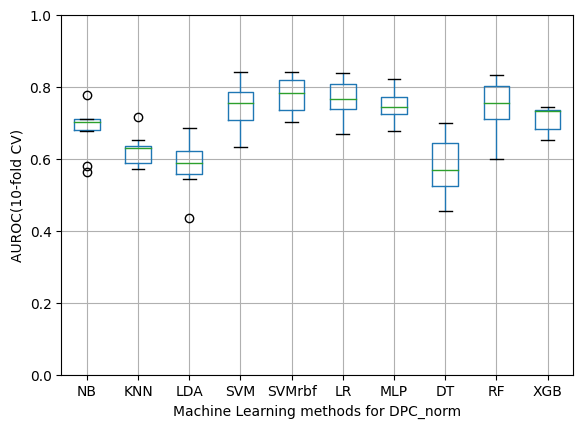


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

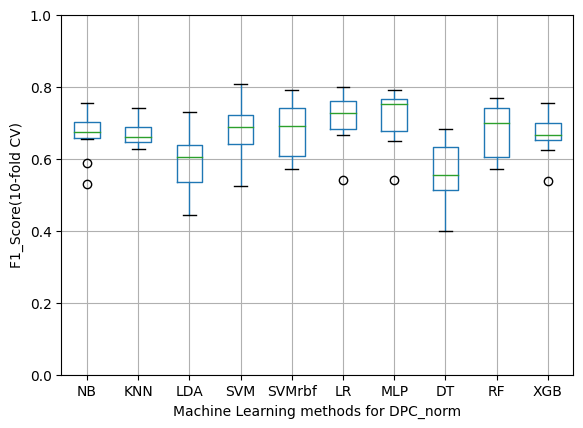


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

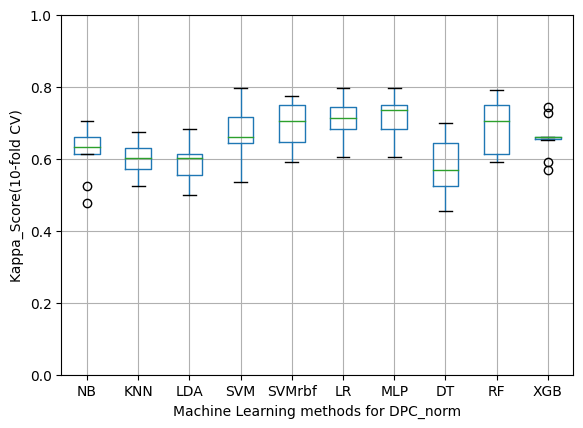


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

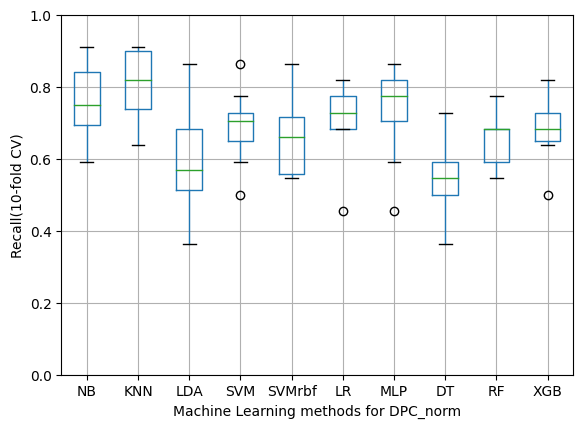


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

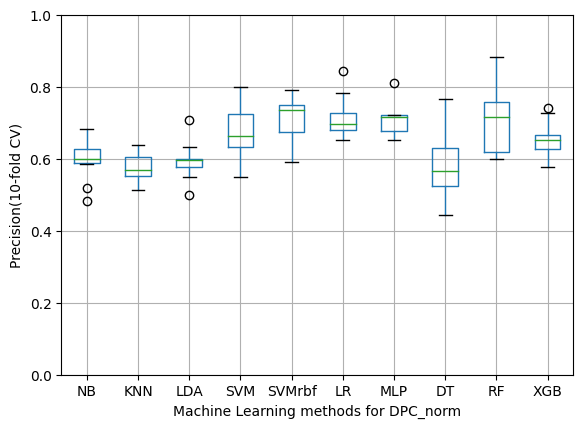

In [ ]:
# ML for DPC normalized dataset with all descriptors (no feature selection)

Xdata, Ydata, Features = getDataFromDataFrame(ds_DPC_norm)
df_res_auroc, df_res_f1, df_res_kappa_DPC, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_DPC_norm, df_res_auroc, nfold, label="DPC_norm", label_y="AUROC")

# F1_Score
MLmodels(ds_DPC_norm, df_res_f1, nfold, label="DPC_norm", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_DPC_norm, df_res_kappa_DPC, nfold, label="DPC_norm", label_y="Kappa_Score")

# Recall
MLmodels(ds_DPC_norm, df_res_recall, nfold, label="DPC_norm", label_y="Recall")

# Precision
MLmodels(ds_DPC_norm, df_res_precision, nfold, label="DPC_norm", label_y="Precision")


-> Get X & Y data, Features list
Shape (438, 421)
Shape X data: (438, 420)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.686, 0.0611, 0.675, 0.0473, 0.628, 0.0528, 0.773, 0.0813, 0.604, 0.0513, 0.0
KNN, 0.614, 0.0479, 0.658, 0.0425, 0.594, 0.0454, 0.782, 0.0881, 0.572, 0.0371, 0.0
LDA, 0.580, 0.0329, 0.585, 0.0391, 0.571, 0.0301, 0.605, 0.0612, 0.568, 0.0271, 0.1
SVM, 0.743, 0.0556, 0.684, 0.0664, 0.678, 0.0660, 0.695, 0.0839, 0.676, 0.0665, 0.1
SVMrbf, 0.777, 0.0463, 0.684, 0.0655, 0.694, 0.0591, 0.664, 0.0891, 0.710, 0.0599, 0.0
LR, 0.767, 0.0492, 0.707, 0.0692, 0.710, 0.0537, 0.709, 0.1020, 0.713, 0.0517, 0.0
MLP, 0.759, 0.0388, 0.695, 0.0660, 0.698, 0.0473, 0.695, 0.1038, 0.701, 0.0346, 3.3
DT, 0.660, 0.0470, 0.665, 0.0517, 0.660, 0.0465, 0.682, 0.10

<Figure size 640x480 with 0 Axes>

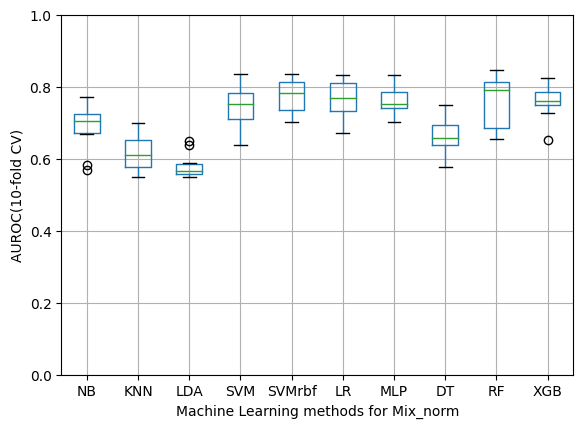


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

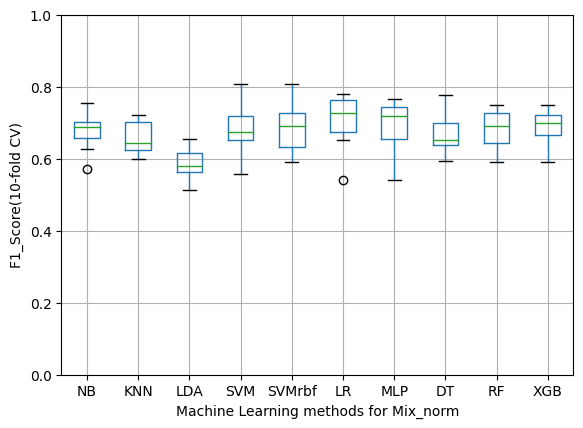


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

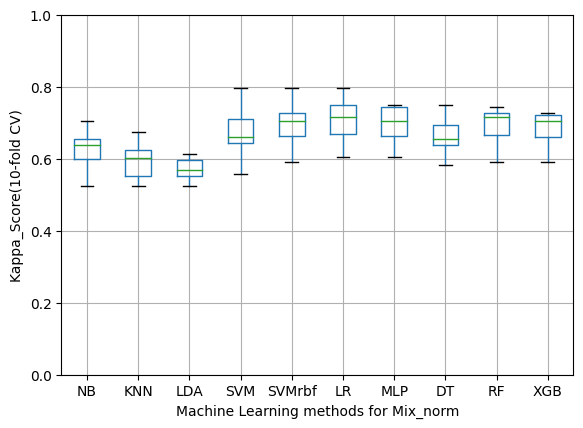


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

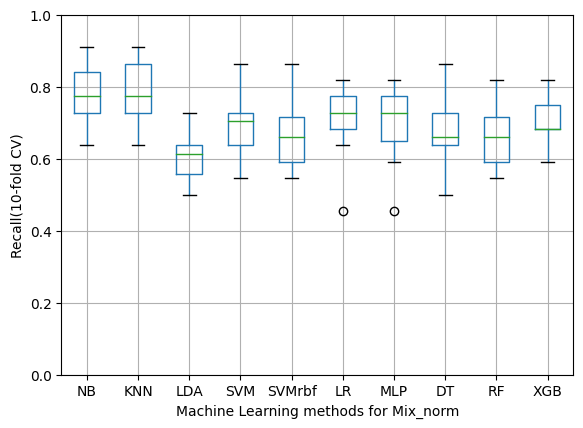


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

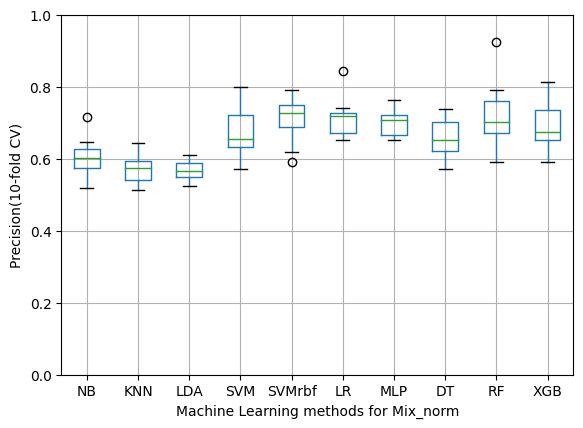

In [ ]:
# ML for Mix normalized dataset with all descriptors (no feature selection)

Xdata, Ydata, Features = getDataFromDataFrame(ds_Mix_norm)
df_res_auroc, df_res_f1, df_res_kappa_Mix, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_Mix_norm, df_res_auroc, nfold, label="Mix_norm", label_y="AUROC")

# F1_Score
MLmodels(ds_Mix_norm, df_res_f1, nfold, label="Mix_norm", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_Mix_norm, df_res_kappa_Mix, nfold, label="Mix_norm", label_y="Kappa_Score")

# Recall
MLmodels(ds_Mix_norm, df_res_recall, nfold, label="Mix_norm", label_y="Recall")

# Precision
MLmodels(ds_Mix_norm, df_res_precision, nfold, label="Mix_norm", label_y="Precision")

###50% of descriptors


-> Get X & Y data, Features list
Shape (438, 11)
Shape X data: (438, 10)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.680, 0.0532, 0.671, 0.0464, 0.621, 0.0556, 0.768, 0.0717, 0.599, 0.0547, 0.0
KNN, 0.690, 0.0534, 0.672, 0.0552, 0.646, 0.0555, 0.727, 0.1016, 0.633, 0.0588, 0.0
LDA, 0.694, 0.0681, 0.671, 0.0543, 0.653, 0.0600, 0.705, 0.0682, 0.645, 0.0671, 0.0
SVM, 0.690, 0.0690, 0.670, 0.0425, 0.642, 0.0563, 0.723, 0.0688, 0.632, 0.0754, 0.0
SVMrbf, 0.704, 0.0716, 0.653, 0.0600, 0.635, 0.0594, 0.686, 0.0919, 0.629, 0.0740, 0.0
LR, 0.692, 0.0698, 0.657, 0.0350, 0.637, 0.0458, 0.691, 0.0636, 0.632, 0.0602, 0.0
MLP, 0.681, 0.0756, 0.629, 0.0525, 0.619, 0.0588, 0.645, 0.0905, 0.624, 0.0766, 0.3
DT, 0.589, 0.0542, 0.585, 0.0644, 0.589, 0.0541, 0.582, 0.0927

<Figure size 640x480 with 0 Axes>

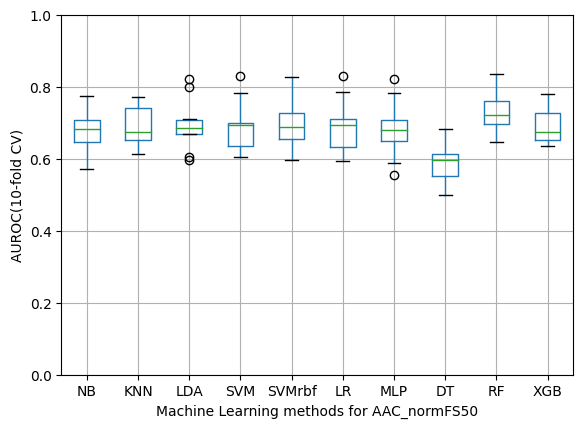


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_normFS50_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

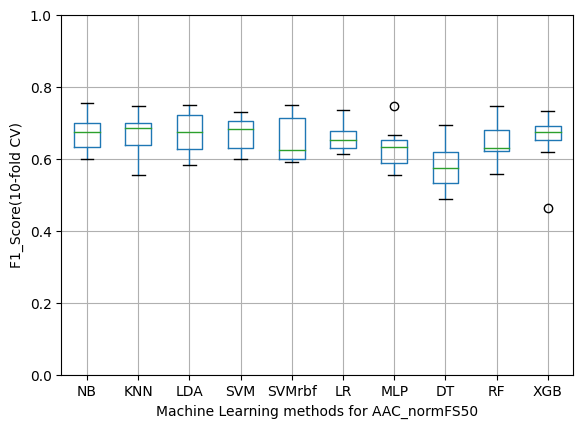


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_normFS50_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

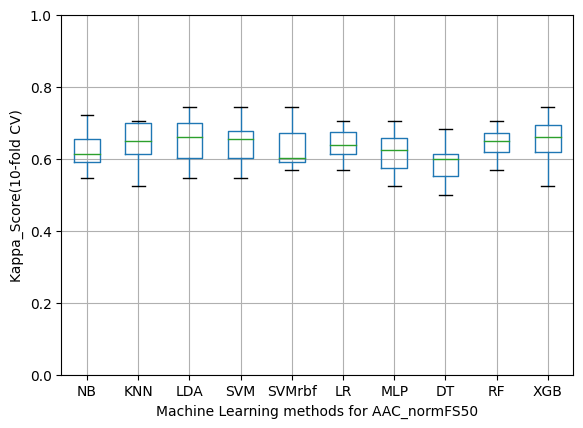


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_normFS50_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

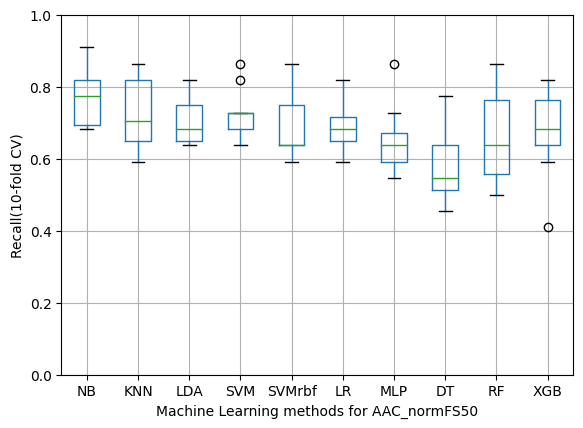


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_normFS50_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

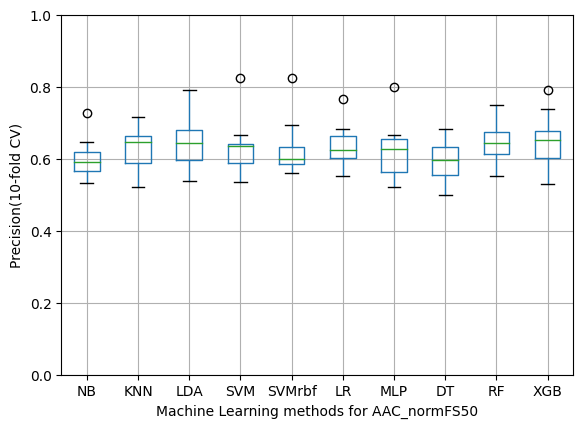

In [ ]:
# ML for AAC normalized dataset with selected features

Xdata, Ydata, Features = getDataFromDataFrame(ds_AAC_normFS50)
df_res_auroc, df_res_f1, df_res_kappa_AAC_FS50, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_AAC_normFS50, df_res_auroc, nfold, label="AAC_normFS50", label_y="AUROC")

# F1_Score
MLmodels(ds_AAC_normFS50, df_res_f1, nfold, label="AAC_normFS50", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_AAC_normFS50, df_res_kappa_AAC_FS50, nfold, label="AAC_normFS50", label_y="Kappa_Score")

# Recall
MLmodels(ds_AAC_normFS50, df_res_recall, nfold, label="AAC_normFS50", label_y="Recall")

# Precision
MLmodels(ds_AAC_normFS50, df_res_precision, nfold, label="AAC_normFS50", label_y="Precision")


-> Get X & Y data, Features list
Shape (438, 201)
Shape X data: (438, 200)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.751, 0.0535, 0.716, 0.0424, 0.678, 0.0487, 0.809, 0.0833, 0.649, 0.0601, 0.0
KNN, 0.672, 0.0705, 0.676, 0.0429, 0.628, 0.0623, 0.768, 0.0555, 0.608, 0.0661, 0.0
LDA, 0.729, 0.0667, 0.667, 0.0769, 0.662, 0.0645, 0.686, 0.1244, 0.656, 0.0492, 0.0
SVM, 0.812, 0.0479, 0.756, 0.0489, 0.756, 0.0431, 0.759, 0.0864, 0.761, 0.0547, 0.0
SVMrbf, 0.818, 0.0518, 0.731, 0.0689, 0.733, 0.0582, 0.736, 0.1128, 0.735, 0.0517, 0.0
LR, 0.807, 0.0418, 0.743, 0.0490, 0.746, 0.0357, 0.741, 0.0910, 0.753, 0.0274, 0.0
MLP, 0.793, 0.0422, 0.735, 0.0398, 0.733, 0.0336, 0.745, 0.1000, 0.740, 0.0643, 3.0
DT, 0.576, 0.0632, 0.549, 0.0955, 0.575, 0.0633, 0.532, 0.13

<Figure size 640x480 with 0 Axes>

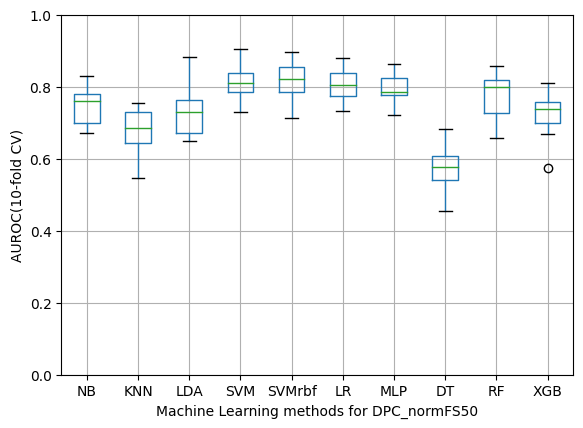


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_normFS50_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

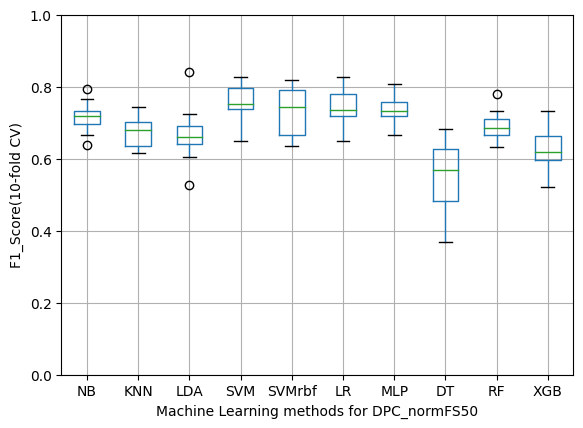


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_normFS50_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

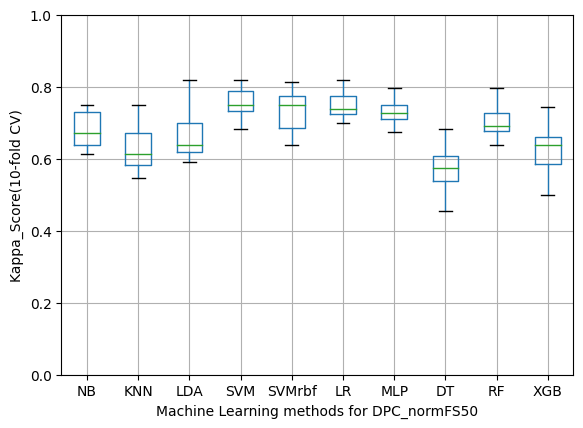


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_normFS50_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

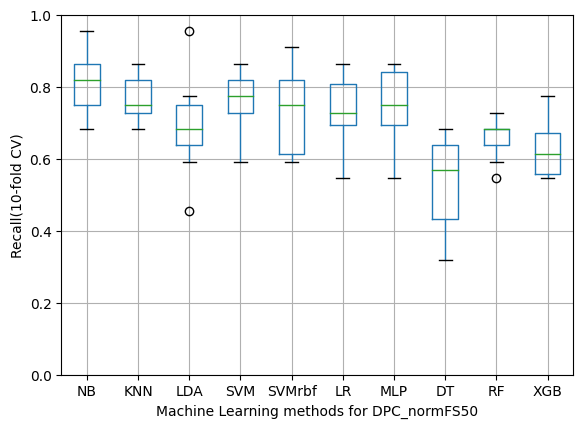


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_normFS50_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

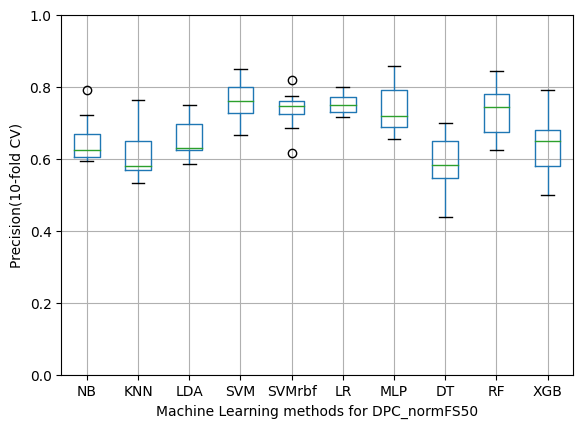

In [ ]:
# ML for DPC normalized dataset with selected features

Xdata, Ydata, Features = getDataFromDataFrame(ds_DPC_normFS50)
df_res_auroc, df_res_f1, df_res_kappa_DPC_FS50, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_DPC_normFS50, df_res_auroc, nfold, label="DPC_normFS50", label_y="AUROC")

# F1_Score
MLmodels(ds_DPC_normFS50, df_res_f1, nfold, label="DPC_normFS50", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_DPC_normFS50, df_res_kappa_DPC_FS50, nfold, label="DPC_normFS50", label_y="Kappa_Score")

# Recall
MLmodels(ds_DPC_normFS50, df_res_recall, nfold, label="DPC_normFS50", label_y="Recall")

# Precision
MLmodels(ds_DPC_normFS50, df_res_precision, nfold, label="DPC_normFS50", label_y="Precision")


-> Get X & Y data, Features list
Shape (438, 211)
Shape X data: (438, 210)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.756, 0.0512, 0.725, 0.0448, 0.685, 0.0578, 0.823, 0.0717, 0.654, 0.0730, 0.0
KNN, 0.659, 0.0649, 0.658, 0.0244, 0.605, 0.0256, 0.759, 0.0644, 0.583, 0.0235, 0.0
LDA, 0.742, 0.0789, 0.683, 0.0930, 0.678, 0.0793, 0.700, 0.1154, 0.670, 0.0744, 0.0
SVM, 0.802, 0.0490, 0.738, 0.0683, 0.742, 0.0541, 0.736, 0.1072, 0.744, 0.0327, 0.0
SVMrbf, 0.817, 0.0461, 0.731, 0.0607, 0.733, 0.0539, 0.732, 0.1045, 0.739, 0.0515, 0.0
LR, 0.808, 0.0377, 0.740, 0.0540, 0.742, 0.0413, 0.741, 0.0955, 0.744, 0.0246, 0.0
MLP, 0.813, 0.0430, 0.718, 0.0372, 0.715, 0.0404, 0.727, 0.0761, 0.720, 0.0666, 4.5
DT, 0.614, 0.0867, 0.613, 0.0962, 0.614, 0.0870, 0.614, 0.11

<Figure size 640x480 with 0 Axes>

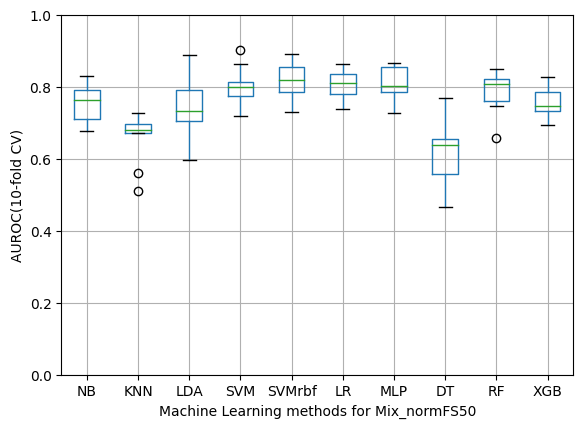


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_normFS50_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

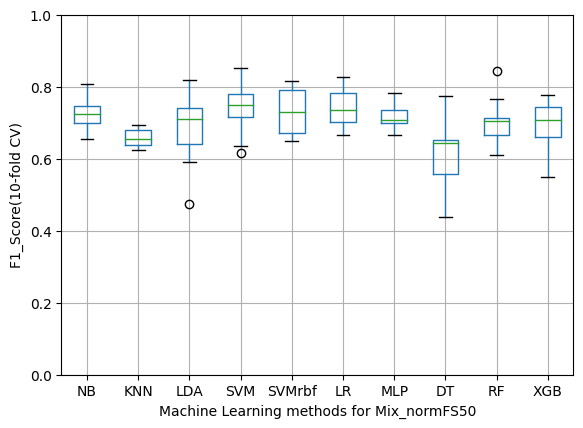


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_normFS50_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

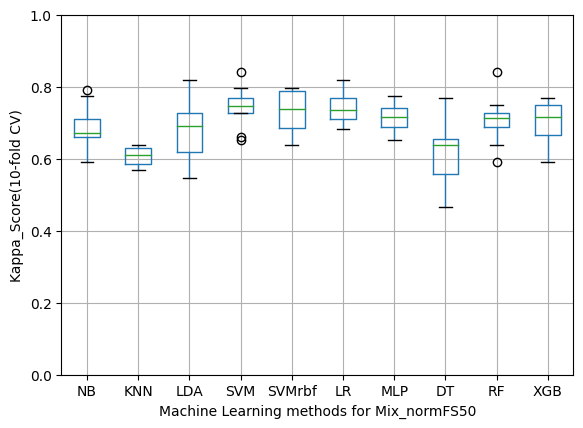


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_normFS50_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

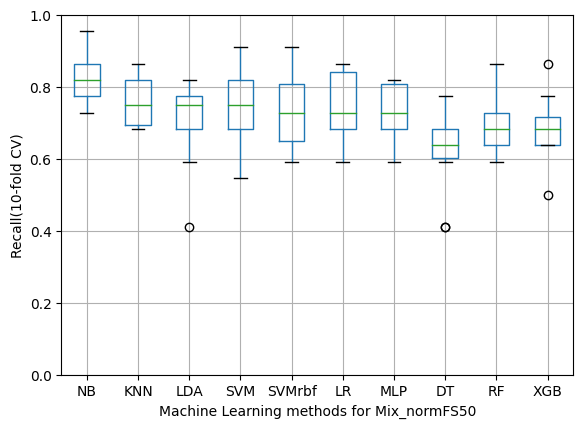


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_normFS50_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

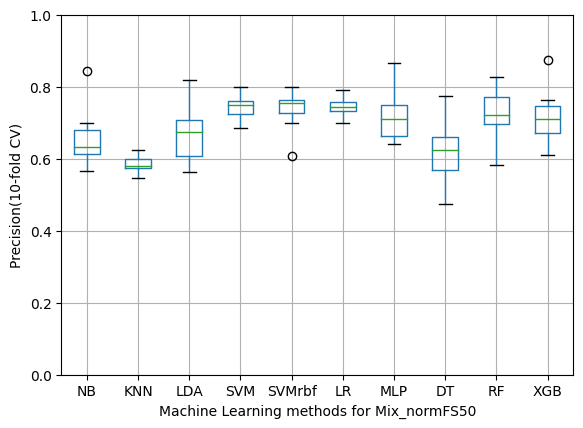

In [ ]:
# ML for Mix normalized dataset with selected features

Xdata, Ydata, Features = getDataFromDataFrame(ds_Mix_normFS50)
df_res_auroc, df_res_f1, df_res_kappa_Mix_FS50, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_Mix_normFS50, df_res_auroc, nfold, label="Mix_normFS50", label_y="AUROC")

# F1_Score
MLmodels(ds_Mix_normFS50, df_res_f1, nfold, label="Mix_normFS50", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_Mix_normFS50, df_res_kappa_Mix_FS50, nfold, label="Mix_normFS50", label_y="Kappa_Score")

# Recall
MLmodels(ds_Mix_normFS50, df_res_recall, nfold, label="Mix_normFS50", label_y="Recall")

# Precision
MLmodels(ds_Mix_normFS50, df_res_precision, nfold, label="Mix_normFS50", label_y="Precision")

###25% of descriptors


-> Get X & Y data, Features list
Shape (438, 6)
Shape X data: (438, 5)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.679, 0.0802, 0.686, 0.0635, 0.649, 0.0823, 0.759, 0.0762, 0.632, 0.0841, 0.0
KNN, 0.651, 0.0590, 0.619, 0.0426, 0.594, 0.0351, 0.664, 0.0867, 0.586, 0.0361, 0.0
LDA, 0.674, 0.0789, 0.644, 0.0604, 0.630, 0.0665, 0.664, 0.0649, 0.630, 0.0820, 0.0
SVM, 0.674, 0.0814, 0.646, 0.0465, 0.617, 0.0583, 0.695, 0.0676, 0.611, 0.0783, 0.0
SVMrbf, 0.660, 0.0813, 0.611, 0.0703, 0.596, 0.0707, 0.636, 0.0996, 0.597, 0.0815, 0.0
LR, 0.675, 0.0797, 0.646, 0.0500, 0.633, 0.0572, 0.668, 0.0706, 0.634, 0.0770, 0.0
MLP, 0.672, 0.0802, 0.634, 0.0593, 0.621, 0.0781, 0.645, 0.0603, 0.633, 0.1084, 0.4
DT, 0.578, 0.0838, 0.593, 0.0646, 0.578, 0.0835, 0.609, 0.0710, 

<Figure size 640x480 with 0 Axes>

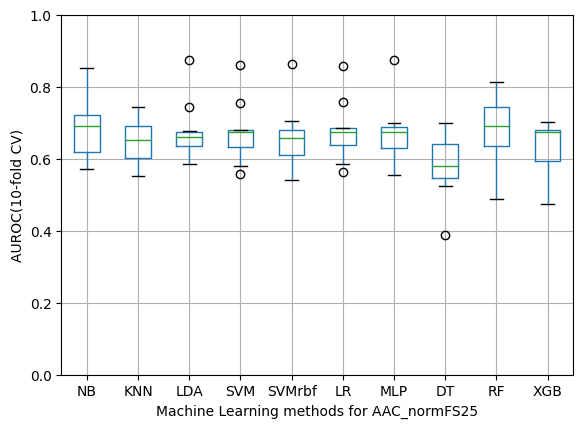


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_normFS25_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

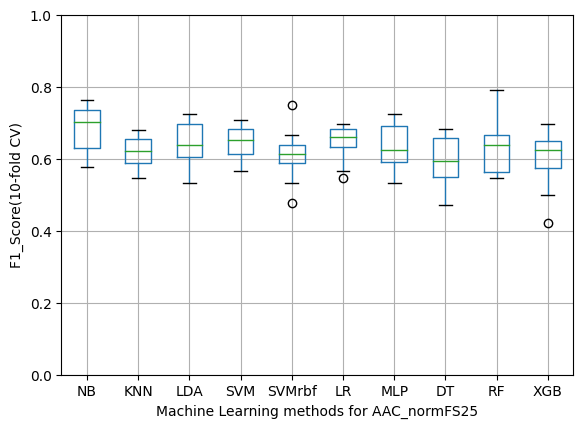


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_normFS25_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

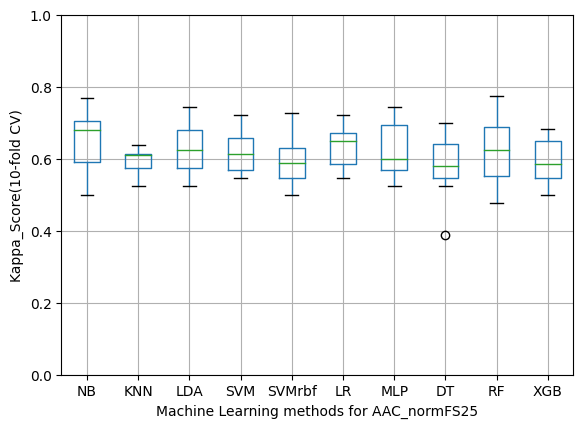


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_normFS25_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

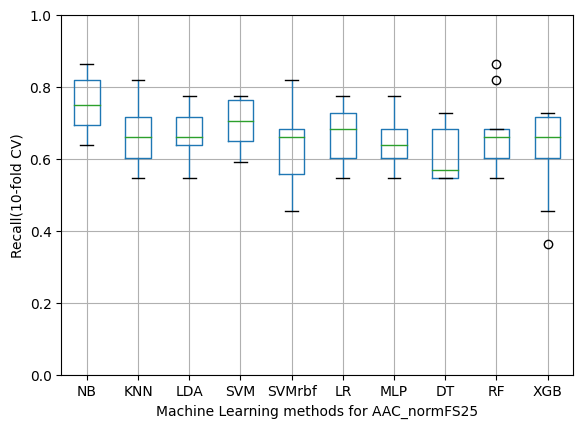


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_normFS25_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

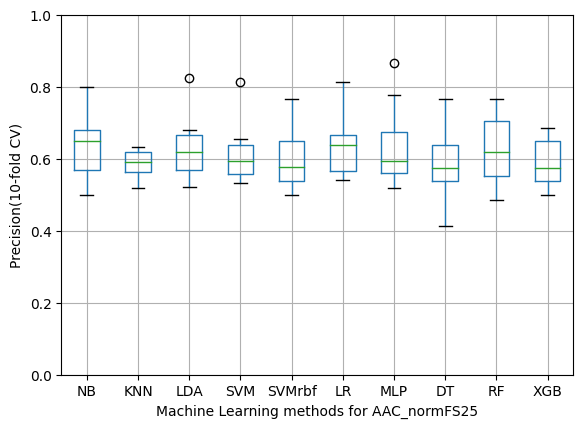

In [ ]:
# ML for AAC normalized dataset with selected features

Xdata, Ydata, Features = getDataFromDataFrame(ds_AAC_normFS25)
df_res_auroc, df_res_f1, df_res_kappa_AAC_FS25, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_AAC_normFS25, df_res_auroc, nfold, label="AAC_normFS25", label_y="AUROC")

# F1_Score
MLmodels(ds_AAC_normFS25, df_res_f1, nfold, label="AAC_normFS25", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_AAC_normFS25, df_res_kappa_AAC_FS25, nfold, label="AAC_normFS25", label_y="Kappa_Score")

# Recall
MLmodels(ds_AAC_normFS25, df_res_recall, nfold, label="AAC_normFS25", label_y="Recall")

# Precision
MLmodels(ds_AAC_normFS25, df_res_precision, nfold, label="AAC_normFS25", label_y="Precision")


-> Get X & Y data, Features list
Shape (438, 101)
Shape X data: (438, 100)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.784, 0.0457, 0.740, 0.0394, 0.708, 0.0490, 0.827, 0.0698, 0.675, 0.0570, 0.0
KNN, 0.691, 0.0624, 0.651, 0.0624, 0.635, 0.0587, 0.682, 0.0886, 0.627, 0.0558, 0.0
LDA, 0.790, 0.0717, 0.742, 0.0838, 0.739, 0.0731, 0.759, 0.1169, 0.730, 0.0577, 0.0
SVM, 0.828, 0.0448, 0.756, 0.0555, 0.753, 0.0523, 0.768, 0.0873, 0.751, 0.0544, 0.0
SVMrbf, 0.832, 0.0507, 0.767, 0.0502, 0.763, 0.0455, 0.786, 0.0887, 0.757, 0.0549, 0.0
LR, 0.826, 0.0442, 0.746, 0.0541, 0.744, 0.0511, 0.755, 0.0936, 0.747, 0.0624, 0.0
MLP, 0.810, 0.0413, 0.727, 0.0696, 0.730, 0.0596, 0.727, 0.1150, 0.741, 0.0712, 3.5
DT, 0.596, 0.0635, 0.583, 0.0822, 0.596, 0.0635, 0.573, 0.10

<Figure size 640x480 with 0 Axes>

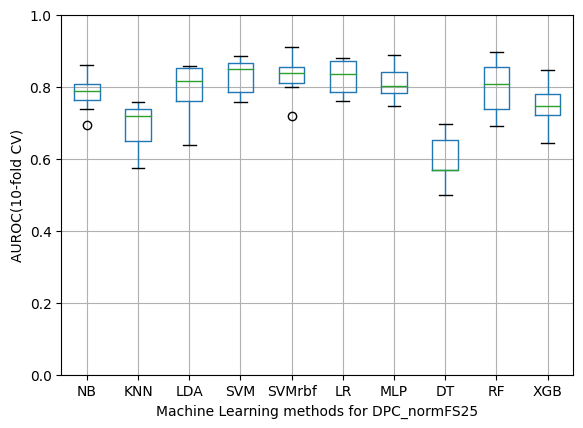


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_normFS25_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

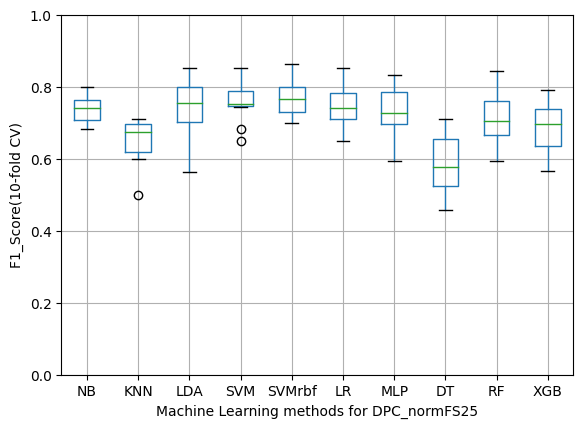


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_normFS25_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

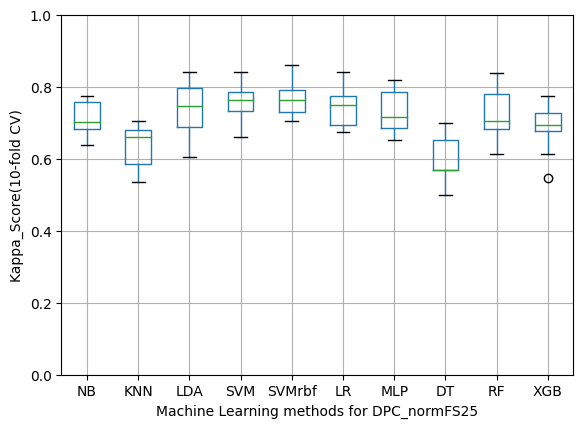


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_normFS25_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

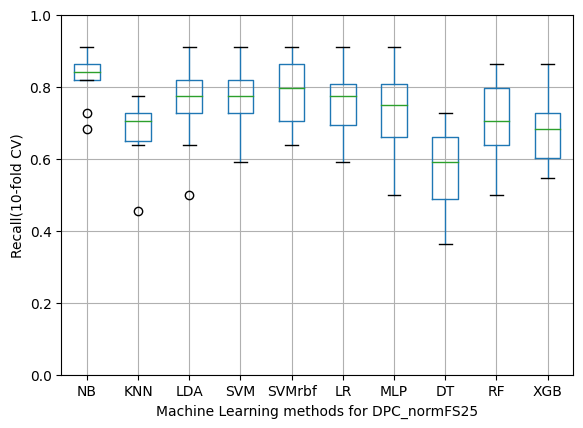


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_normFS25_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

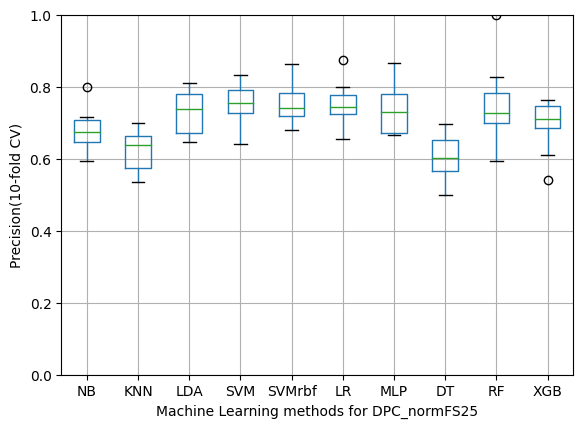

In [ ]:
# ML for DPC normalized dataset with selected features

Xdata, Ydata, Features = getDataFromDataFrame(ds_DPC_normFS25)
df_res_auroc, df_res_f1, df_res_kappa_DPC_FS25, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_DPC_normFS25, df_res_auroc, nfold, label="DPC_normFS25", label_y="AUROC")

# F1_Score
MLmodels(ds_DPC_normFS25, df_res_f1, nfold, label="DPC_normFS25", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_DPC_normFS25, df_res_kappa_DPC_FS25, nfold, label="DPC_normFS25", label_y="Kappa_Score")

# Recall
MLmodels(ds_DPC_normFS25, df_res_recall, nfold, label="DPC_normFS25", label_y="Recall")

# Precision
MLmodels(ds_DPC_normFS25, df_res_precision, nfold, label="DPC_normFS25", label_y="Precision")


-> Get X & Y data, Features list
Shape (438, 106)
Shape X data: (438, 105)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.788, 0.0440, 0.741, 0.0461, 0.713, 0.0586, 0.814, 0.0688, 0.687, 0.0796, 0.0
KNN, 0.688, 0.0587, 0.655, 0.0586, 0.635, 0.0575, 0.695, 0.0864, 0.624, 0.0537, 0.0
LDA, 0.798, 0.0480, 0.746, 0.0539, 0.740, 0.0479, 0.768, 0.0799, 0.728, 0.0417, 0.0
SVM, 0.839, 0.0399, 0.771, 0.0348, 0.765, 0.0329, 0.791, 0.0617, 0.755, 0.0329, 0.0
SVMrbf, 0.837, 0.0458, 0.764, 0.0534, 0.758, 0.0466, 0.786, 0.0955, 0.750, 0.0555, 0.0
LR, 0.830, 0.0425, 0.760, 0.0447, 0.756, 0.0464, 0.773, 0.0733, 0.754, 0.0609, 0.0
MLP, 0.819, 0.0451, 0.746, 0.0514, 0.749, 0.0465, 0.741, 0.0976, 0.763, 0.0636, 5.4
DT, 0.649, 0.0536, 0.643, 0.0399, 0.649, 0.0534, 0.627, 0.04

<Figure size 640x480 with 0 Axes>

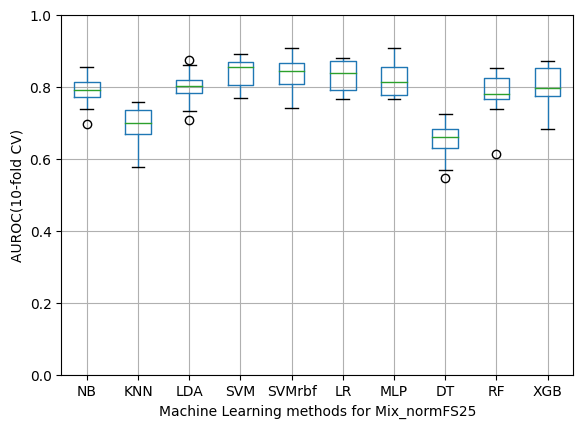


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_normFS25_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

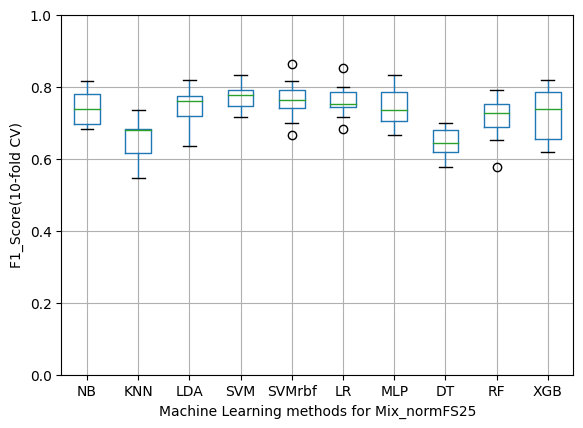


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_normFS25_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

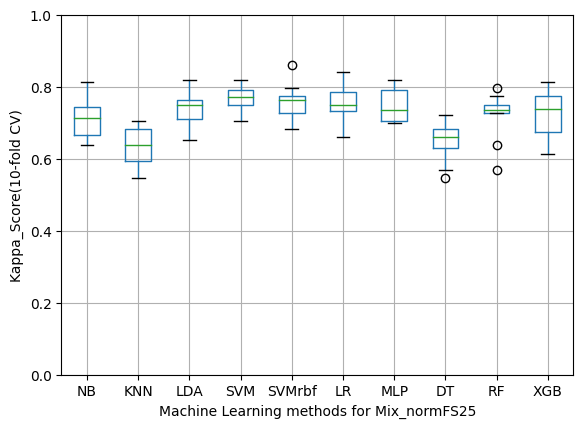


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_normFS25_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

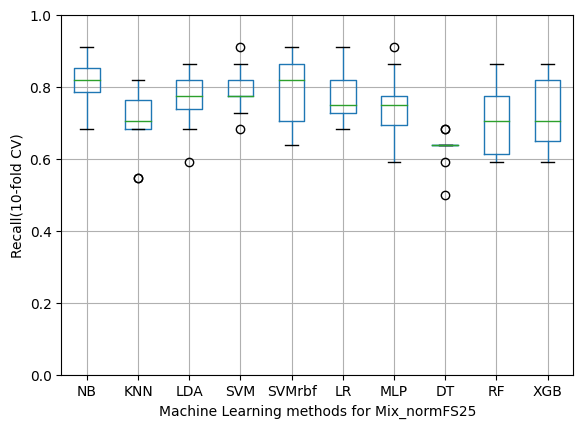


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_normFS25_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

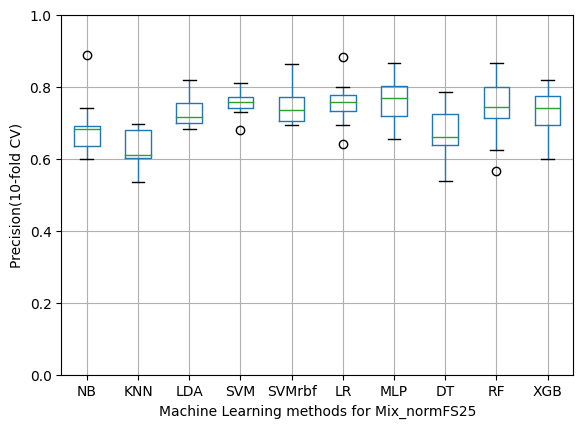

In [ ]:
# ML for Mix normalized dataset with selected features

Xdata, Ydata, Features = getDataFromDataFrame(ds_Mix_normFS25)
df_res_auroc, df_res_f1, df_res_kappa_Mix_FS25, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_Mix_normFS25, df_res_auroc, nfold, label="Mix_normFS25", label_y="AUROC")

# F1_Score
MLmodels(ds_Mix_normFS25, df_res_f1, nfold, label="Mix_normFS25", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_Mix_normFS25, df_res_kappa_Mix_FS25, nfold, label="Mix_normFS25", label_y="Kappa_Score")

# Recall
MLmodels(ds_Mix_normFS25, df_res_recall, nfold, label="Mix_normFS25", label_y="Recall")

# Precision
MLmodels(ds_Mix_normFS25, df_res_precision, nfold, label="Mix_normFS25", label_y="Precision")

### Statistical Analysis

### For each dataset:

#### Normality: Shapiro-Wilk and QQ Plot:

#### Shapiro-Wilk test

In [1]:
# Remove the last two columns from each dataframe

dicc = {
    "df_res_kappa_AAC": df_res_kappa_AAC,
    "df_res_kappa_DPC": df_res_kappa_DPC,
    "df_res_kappa_Mix": df_res_kappa_Mix,
    "df_res_kappa_AAC_FS50": df_res_kappa_AAC_FS50,
    "df_res_kappa_DPC_FS50": df_res_kappa_DPC_FS50,
    "df_res_kappa_Mix_FS50": df_res_kappa_Mix_FS50,
    "df_res_kappa_AAC_FS25": df_res_kappa_AAC_FS25,
    "df_res_kappa_DPC_FS25": df_res_kappa_DPC_FS25,
    "df_res_kappa_Mix_FS25": df_res_kappa_Mix_FS25
}

datasets = {}

def remove(df):
    return df.iloc[:, :-2]

for dataset_name, dataset in dicc.items():
    datasets[dataset_name] = remove(dataset)

NameError: name 'df_res_kappa_AAC' is not defined

In [ ]:
from scipy.stats import shapiro

def shapiro_test(df_res_kappa, dataset_name):
  ''' H0: The null hypothesis states that the data come from a population with a normal distribution.
      H1: The alternative hypothesis suggests that the data do not come from a population with a normal distribution.'''

  # Shapiro-Wilk
  statistic, p_value = shapiro(df_res_kappa)

  # Results
  if p_value < 0.05:
    print("Shapiro-Wilk test rejects the null hypothesis.")
    print("The dataset "f"\033[1m{dataset_name}\033[0m DOES NOT FOLLOWS a normal distribution.")

  else:
    print("Shapiro-Wilk test does not reject the null hypothesis.")
    print("The dataset "f"\033[1m{dataset_name}\033[0m FOLLOWS a normal distribution.")

  print()

In [ ]:
# Call Shapiro-Wilks function for each data set

for dataset_name, dataset in datasets.items():
    shapiro_test(dataset, dataset_name)

#### QQ Plot

In [ ]:
import statsmodels.api as sm

def assess_normality(df, dataset_name):

  # Calculate row averages and convert to a single column DataFrame
  y = df.values.flatten()

  # Create a sequence of integers as indexes for the columns
  x = range (len(y))

  # Fit a linear regression model and obtain the residuals
  model = sm.OLS(y, sm.add_constant(x)).fit()
  residuals = model.resid

  # Plot QQ plot
  sm.qqplot(residuals, line='s')
  plt.title(f'Normality Assessment of Residuals for {dataset_name}', fontsize=18)
  plt.xlabel('Theoretical Quantiles', fontsize=15)
  plt.ylabel('Sample Residual Quantiles', fontsize=15)
  plt.grid(True, which='both', linestyle='--', linewidth=0.5)
  plt.show()

In [ ]:
for dataset_name, dataset in datasets.items():
    assess_normality(dataset, dataset_name)

#### ANOVA
For those datasets following a normal distribution

In [ ]:
from scipy.stats import f_oneway

def anova(df_res_kappa, dataset_name):

  '''H0: The means of the classifiers are equal.
     H1: The means of the classifiers are not equal.'''

  # ANOVA
  f_statistic, p_value = f_oneway(*[df_res_kappa[column] for column in df_res_kappa.columns])

  # Results
  print("Statistical F:", f_statistic)
  print("P value:", p_value)

  if p_value < 0.05:
    print("Rejects the null hypothesis.")
    print("For the dataset "f"\033[1m{dataset_name}\033[0m THERE ARE statistically significant differences between the classifiers's means.")

  else:
    print("Does not reject the null hypothesis.")
    print("For the dataset "f"\033[1m{dataset_name}\033[0m THERE ARE NO statistically significant differences between the classifiers's means.")

  print()

In [ ]:
norm_dicc = {
    "df_res_kappa_AAC": df_res_kappa_AAC,
    "df_res_kappa_DPC": df_res_kappa_DPC,
    "df_res_kappa_AAC_FS50": df_res_kappa_AAC_FS50,
    "df_res_kappa_DPC_FS50": df_res_kappa_DPC_FS50,
    "df_res_kappa_Mix_FS50": df_res_kappa_Mix_FS50,
    "df_res_kappa_AAC_FS25": df_res_kappa_AAC_FS25,
}

norm_datasets = {}
for dataset_name, dataset in norm_dicc.items():
    norm_datasets[dataset_name] = remove(dataset)

In [ ]:
for dataset_name, dataset in norm_datasets.items():
    anova(dataset, dataset_name)

#### Kruskal-Wallis
For those datasets that do not follow a normal distribution

In [ ]:
not_norm_dicc = {
    "df_res_kappa_Mix": df_res_kappa_Mix,
    "df_res_kappa_DPC_FS25": df_res_kappa_DPC_FS25,
    "df_res_kappa_Mix_FS25": df_res_kappa_Mix_FS25
}

not_norm_datasets = {}
for dataset_name, dataset in not_norm_dicc.items():
    not_norm_datasets[dataset_name] = remove(dataset)

In [ ]:
from scipy.stats import kruskal

def kruskal_w(df_res_kappa, dataset_name):

  '''H0: The performance distributions of the classifiers are equal.
     H1: At least one classifier's performance distribution is different from the others.'''

  # Kruskal-Wallis
  h_statistic, p_value = kruskal(*[df_res_kappa[column] for column in df_res_kappa.columns])

  # Results
  print("Statistical F:", h_statistic)
  print("P value:", p_value)

  if p_value < 0.05:
    print("Rejects the null hypothesis.")
    print("For the dataset "f"\033[1m{dataset_name}\033[0m THERE IS at least one classifier whose performance is statistically different from the rest.")

  else:
    print("Does not reject the null hypothesis.")
    print("For the dataset "f"\033[1m{dataset_name}\033[0m THERE ARE NO statistically significant differences in the performance of the classifiers.")

  print()

In [ ]:
for dataset_name, dataset in not_norm_datasets.items():
    kruskal_w(dataset, dataset_name)

#### Levene's test
Variance of the classifiers

In [ ]:
from scipy.stats import levene

def levene_test(dataset, dataset_name):

  ''' H0: The variances of the classifiers are homogeneous.
      H1: At least one of the variances of the classifiers differs from the others.'''

  # Levene's test
  statistic, p_value = levene(*[dataset[column] for column in dataset.columns])

  # Results
  print("Levene's Test Statistic:", statistic)
  print("p-value:", p_value)

  # p-value
  if p_value < 0.05:
      print("Reject the null hypothesis of equal variances.")
      print("For the dataset "f"\033[1m{dataset_name}\033[0m THERE IS at least one classifier whose variance is statistically different from the others.")

  else:
      print("Does no reject null hypothesis of equal variances.")
      print("For the dataset "f"\033[1m{dataset_name}\033[0m THERE ARE NO statistically significant differences between the variance of the classifiers.")

  print()


In [ ]:
for dataset_name, dataset in datasets.items():
    levene_test(dataset, dataset_name)

#### Tukey's Test
Assumes that the data are approximately normally distributed and that the variances of the groups are homogeneous.

Determine whether there are significant differences between the means of classifier performance.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def tukey_test(dataset, dataset_name):
    # List of classifiers
    classifiers = dataset.columns.tolist()

    # List to store data for each classifier
    data = [dataset[classifier].values for classifier in classifiers]

    # Flatten the list of lists into a single list
    flattened_data = np.concatenate(data)

    # Create groups for each classifier
    groups = [classifier for classifier in classifiers for _ in range(len(dataset))]

    # Tukey's test
    tukey_result = pairwise_tukeyhsd(flattened_data, groups)

    # Results
    print("\033[1mResults for the dataset "f"{dataset_name}\033[0m")
    print()
    print(tukey_result)
    print()

    # Plot the results of Tukey's test
    tukey_result.plot_simultaneous()
    plt.title(f"Tukey Test for {dataset_name}. Comparisons Among Classifiers")
    plt.xlabel("Metric Value")
    plt.ylabel("Classifiers")
    plt.show()
    print()

In [ ]:
for dataset_name, dataset in datasets.items():
    tukey_test(dataset, dataset_name)

### Statistical Analysis

### For all datasets:

### NB classifier
For the comparison of all datasets, the NB classifier of each dataset is selected as there are no significant differences between classifiers.

In [ ]:
def NB_columns(dataframes, dataframe_names):
    NB_columns = []

    for df, df_name in zip(dataframes, dataframe_names):
        # Extract the NB column from each dataframe
        NB_column = pd.DataFrame(df['NB'].values)

        # Rename the column
        new_name = df_name + '_NB'
        NB_column = NB_column.rename(columns={0: new_name})

        NB_columns.append(NB_column)

    # Combine all columns into a single dataframe
    combined_df = pd.concat(NB_columns, axis=1)

    return combined_df

In [ ]:
# Function call

kappa_all_datasets = [df_res_kappa_AAC, df_res_kappa_DPC, df_res_kappa_Mix, df_res_kappa_AAC_FS50, df_res_kappa_DPC_FS50, df_res_kappa_Mix_FS50, df_res_kappa_AAC_FS25, df_res_kappa_DPC_FS25, df_res_kappa_Mix_FS25]
dataframe_names = ['df_res_kappa_AAC', 'df_res_kappa_DPC', 'df_res_kappa_Mix', 'df_res_kappa_AAC_FS50', 'df_res_kappa_DPC_FS50', 'df_res_kappa_Mix_FS50', 'df_res_kappa_AAC_FS25', 'df_res_kappa_DPC_FS25', 'df_res_kappa_Mix_FS25']

final_df = NB_columns(kappa_all_datasets, dataframe_names)
print(final_df)

   df_res_kappa_AAC_NB  df_res_kappa_DPC_NB  df_res_kappa_Mix_NB  \
0             0.545455             0.704545             0.704545   
1             0.522727             0.477273             0.522727   
2             0.590909             0.659091             0.636364   
3             0.613636             0.613636             0.590909   
4             0.681818             0.613636             0.636364   
5             0.568182             0.522727             0.568182   
6             0.613636             0.659091             0.659091   
7             0.590909             0.636364             0.636364   
8             0.674419             0.627907             0.627907   
9             0.744186             0.674419             0.697674   

   df_res_kappa_AAC_FS50_NB  df_res_kappa_DPC_FS50_NB  \
0                  0.613636                  0.750000   
1                  0.545455                  0.613636   
2                  0.590909                  0.636364   
3                  0.59

#### Normality: Shapiro-Wilk and QQ Plot:

#### Shapiro-Wilk

In [ ]:
# One-dimensional array
kappa_data = final_df.values.flatten()

# Shapiro-Wilk
statistic, p_value = shapiro(kappa_data)

# Results
print("Statistical:", statistic)
print("P value:", p_value)
print()

if p_value < 0.05:
  print("Shapiro-Wilk test rejects the null hypothesis.")
  print("The NB Dataset DOES NOT FOLLOWS a normal distribution.")

else:
  print("Shapiro-Wilk test does not reject the null hypothesis.")
  print("The NB Dataset FOLLOWS a normal distribution.")

Statistical: 0.9877541065216064
P value: 0.5670689344406128

Shapiro-Wilk test does not reject the null hypothesis.
The NB Dataset FOLLOWS a normal distribution.


#### QQ-plot

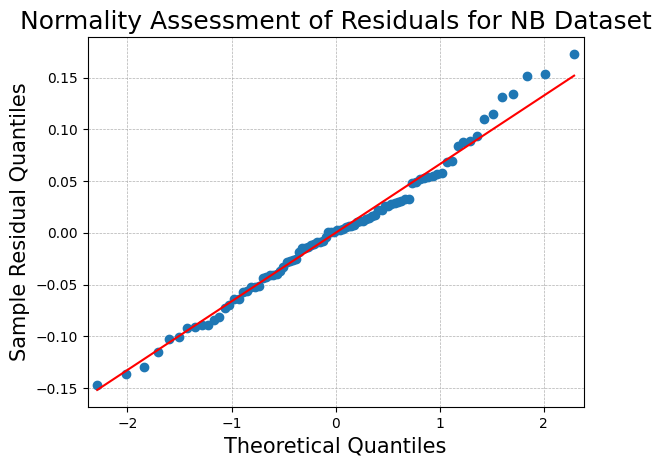

In [ ]:
# Call asses_normality function

assess_normality(final_df, 'NB Dataset')

#### ANOVA

In [ ]:
# Call anova function

anova(final_df, 'NB Dataset')

Statistical F: 3.829998615871752
P value: 0.0007314293625196248
Rejects the null hypothesis.
For the dataset NB Dataset THERE ARE statistically significant differences between the classifiers's means.



#### Levene's Test

In [ ]:
# Call levene_test function

levene_test(final_df, 'NB Dataset')

Levene's Test Statistic: 0.46437229265190966
p-value: 0.8776794239921117
Does no reject null hypothesis of equal variances.
For the dataset NB Dataset THERE ARE NO statistically significant differences between the variance of the classifiers.



#### Tukey's Test

Results for the dataset DB Dataset

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                   group2          meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
df_res_kappa_AAC_FS25_NB df_res_kappa_AAC_FS50_NB  -0.0273 0.9882 -0.1179 0.0632  False
df_res_kappa_AAC_FS25_NB      df_res_kappa_AAC_NB  -0.0341 0.9538 -0.1247 0.0564  False
df_res_kappa_AAC_FS25_NB df_res_kappa_DPC_FS25_NB   0.0591 0.4925 -0.0314 0.1497  False
df_res_kappa_AAC_FS25_NB df_res_kappa_DPC_FS50_NB   0.0297 0.9802 -0.0609 0.1202  False
df_res_kappa_AAC_FS25_NB      df_res_kappa_DPC_NB  -0.0299 0.9793 -0.1204 0.0607  False
df_res_kappa_AAC_FS25_NB df_res_kappa_Mix_FS25_NB   0.0638 0.3859 -0.0267 0.1544  False
df_res_kappa_AAC_FS25_NB df_res_kappa_Mix_FS50_NB   0.0365 0.9327  -0.054 0.1271  False
df_res_kappa_AAC_FS25_NB      df_res_kappa_Mix_NB  -0.0207 0.9982 -0.1112 0.0698  Fa

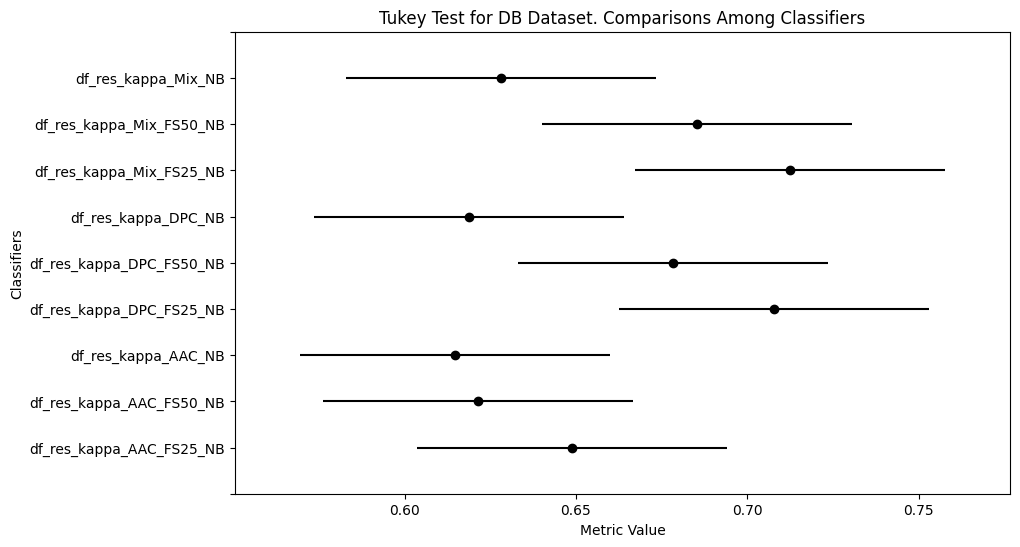

In [ ]:
# Call tukey_test function
tukey_test(final_df, 'DB Dataset')

## Multivariate feature selection

In [ ]:
# Multivariate feature selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Feature selection function using RFE with Random Forest
def FeatureSelectionWithRFE(df, label, nFeats=1):
    if nFeats == 0:
        print("\n NO feature selection")
        return df

    # Separating features and target variable using getDataFromDataFrame
    Xdata, Ydata, Features = getDataFromDataFrame(df)

    # Feature selection using RFE
    print('\n-> Multivariate Feature selection with RFE and Random Forest')
    print('Initial columns:', list(df.columns))

    # Define the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Configure RFE
    selector = RFE(estimator=rf_model, n_features_to_select=nFeats, step=1)

    # Adjust the selector to the data
    selector = selector.fit(Xdata, Ydata)

    # Obtain the selected characteristics
    SelFeatures = []
    for i in selector.get_support(indices=True):
        SelFeatures.append(Features[i])

    # Create the new DataFrame with the selected features
    Xdata_selected = selector.transform(Xdata)
    df_selected = pd.DataFrame(Xdata_selected, columns=SelFeatures)
    df_selected['Class'] = Ydata

    print('Final columns:', list(df_selected.columns))

    # Save the dataset with the selected characteristics
    selectFile = dsPath + 'ds' + label + '.normFS_RFE(' + str(nFeats) + ').csv'
    print('* Save selected features dataset:', selectFile)
    df_selected.to_csv(selectFile, index=False)

    print('Done!')
    return df_selected

In [ ]:
# Feature selection

ds_AAC_norm_RFE = FeatureSelectionWithRFE(ds_AAC_norm, "AAC", nFeats=20)  # ALL
ds_DPC_norm_RFE = FeatureSelectionWithRFE(ds_DPC_norm, "DPC", nFeats=400)  # ALL
ds_Mix_norm_RFE = FeatureSelectionWithRFE(ds_Mix_norm, "Mix", nFeats=420)  # ALL
ds_AAC_norm_RFE


-> Get X & Y data, Features list
Shape (438, 21)
Shape X data: (438, 20)
Shape Y data: (438,)
Done!

-> Multivariate Feature selection with RFE and Random Forest
Initial columns: ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'Class']
Final columns: ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'Class']
* Save selected features dataset: /content/drive/My Drive/TFM/dataset/dsAAC.normFS_RFE(20).csv
Done!

-> Get X & Y data, Features list
Shape (438, 401)
Shape X data: (438, 400)
Shape Y data: (438,)
Done!

-> Multivariate Feature selection with RFE and Random Forest
Initial columns: ['AA', 'AR', 'AN', 'AD', 'AC', 'AE', 'AQ', 'AG', 'AH', 'AI', 'AL', 'AK', 'AM', 'AF', 'AP', 'AS', 'AT', 'AW', 'AY', 'AV', 'RA', 'RR', 'RN', 'RD', 'RC', 'RE', 'RQ', 'RG', 'RH', 'RI', 'RL', 'RK', 'RM', 'RF', 'RP', 'RS', 'RT', 'RW', 'RY', 'RV', 'NA', 'NR', 'NN', 'ND', 'NC', 'NE', 'NQ', 'NG', 'NH', 'NI', '

A         R         N         D         C         E         Q  \
0    0.284616  0.481374  0.524132  0.370388  0.245514  0.556739  0.272512   
1    0.210212  0.461947  0.311360  0.550454  0.255258  0.578836  0.393065   
2    0.179842  0.401921  0.771483  0.396955  0.289022  0.518961  0.327881   
3    0.291199  0.417127  0.817834  0.379476  0.128979  0.536100  0.403370   
4    0.975162  0.792855  0.377281  0.522800  0.061837  0.514221  0.012759   
..        ...       ...       ...       ...       ...       ...       ...   
433  0.252697  0.402357  0.712036  0.422512  0.266737  0.470537  0.261879   
434  0.267854  0.292346  0.328428  0.287190  0.516786  0.390680  0.398462   
435  0.399403  0.349607  0.592407  0.479531  0.225545  0.871354  0.342684   
436  0.224263  0.501819  0.968658  0.389031  0.241945  0.457264  0.344892   
437  0.324279  0.553842  0.579311  0.382817  0.303878  0.535954  0.475505   

            G         H         I  ...         K         M         F  \
0    0.106364  0.369139  0.199081  ...  0.344923  0.361137  0.259744   
1    0.105660  0.171058  0.776083  ...  0.573810  0.307336  0.294636   
2    0.078558  0.336171  0.650044  ...  0.456961  0.440317  0.382331   
3    0.091383  0.275098  0.395522  ...  0.474448  0.222604  0.153396   
4    0.175045  0.389677  0.188032  ...  0.000000  0.381229  0.059484   
..        ...       ...       ...  ...       ...       ...       ...   
433  0.068856  0.423591  0.608292  ...  0.733970  0.292664  0.406273   
434  0.085663  0.559789  0.480199  ...  0.423614  0.193655  0.207127   
435  0.086191  0.395352  0.304781  ...  0.360919  0.369597  0.253062   
436  0.094859  0.380219  0.551775  ...  0.339976  0.247588  0.465479   
437  0.121983  0.382246  0.205339  ...  0.106751  0.373959  0.243597   

            P         S         T         W         Y         V  Class  
0    0.455257  0.361341  0.397813  0.225221  0.294837  0.428117      1  
1    0.047268  0.127608  0.525050  0.000000  0.613107  0.791363      1  
2    0.145929  0.159474  0.213618  0.393584  0.470194  0.490092      1  
3    0.216414  0.631276  0.425249  0.108850  0.226471  0.371565      1  
4    0.251402  0.114509  0.159940  0.283628  0.165057  0.599177      1  
..        ...       ...       ...       ...       ...       ...    ...  
433  0.084805  0.208107  0.391054  0.101991  0.296640  0.516919      0  
434  0.255665  0.219729  0.240755  0.493805  0.632290  0.625911      0  
435  0.135270  0.117272  0.486879  0.258628  0.334363  0.789119      0  
436  0.084434  0.214347  0.246421  0.346681  0.524656  0.351655      0  
437  0.155753  0.463370  0.676243  0.000000  0.304107  0.343522      0  

[438 rows x 21 columns]

In [ ]:
ds_AAC_normFS50_RFE = FeatureSelectionWithRFE(ds_AAC_norm, "AAC", nFeats=10)  # 50%
ds_DPC_normFS50_RFE = FeatureSelectionWithRFE(ds_DPC_norm, "DPC", nFeats=200)  # 50%
ds_Mix_normFS50_RFE = FeatureSelectionWithRFE(ds_Mix_norm, "Mix", nFeats=210)  # 50%


-> Get X & Y data, Features list
Shape (438, 21)
Shape X data: (438, 20)
Shape Y data: (438,)
Done!

-> Multivariate Feature selection with RFE and Random Forest
Initial columns: ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'Class']
Final columns: ['A', 'N', 'D', 'E', 'I', 'L', 'M', 'F', 'P', 'V', 'Class']
* Save selected features dataset: /content/drive/My Drive/TFM/dataset/dsAAC.normFS_RFE(10).csv
Done!

-> Get X & Y data, Features list
Shape (438, 401)
Shape X data: (438, 400)
Shape Y data: (438,)
Done!

-> Multivariate Feature selection with RFE and Random Forest
Initial columns: ['AA', 'AR', 'AN', 'AD', 'AC', 'AE', 'AQ', 'AG', 'AH', 'AI', 'AL', 'AK', 'AM', 'AF', 'AP', 'AS', 'AT', 'AW', 'AY', 'AV', 'RA', 'RR', 'RN', 'RD', 'RC', 'RE', 'RQ', 'RG', 'RH', 'RI', 'RL', 'RK', 'RM', 'RF', 'RP', 'RS', 'RT', 'RW', 'RY', 'RV', 'NA', 'NR', 'NN', 'ND', 'NC', 'NE', 'NQ', 'NG', 'NH', 'NI', 'NL', 'NK', 'NM', 'NF', 'NP', 'NS', 'NT', 'NW', 'NY

In [ ]:
ds_AAC_normFS25_RFE = FeatureSelectionWithRFE(ds_AAC_norm, "AAC", nFeats=5)  # 25%
ds_DPC_normFS25_RFE = FeatureSelectionWithRFE(ds_DPC_norm, "DPC", nFeats=100)  # 25%
ds_Mix_normFS25_RFE = FeatureSelectionWithRFE(ds_Mix_norm, "Mix", nFeats=105)  # 25%


-> Get X & Y data, Features list
Shape (438, 21)
Shape X data: (438, 20)
Shape Y data: (438,)
Done!

-> Multivariate Feature selection with RFE and Random Forest
Initial columns: ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'Class']
Final columns: ['D', 'I', 'L', 'M', 'V', 'Class']
* Save selected features dataset: /content/drive/My Drive/TFM/dataset/dsAAC.normFS_RFE(5).csv
Done!

-> Get X & Y data, Features list
Shape (438, 401)
Shape X data: (438, 400)
Shape Y data: (438,)
Done!

-> Multivariate Feature selection with RFE and Random Forest
Initial columns: ['AA', 'AR', 'AN', 'AD', 'AC', 'AE', 'AQ', 'AG', 'AH', 'AI', 'AL', 'AK', 'AM', 'AF', 'AP', 'AS', 'AT', 'AW', 'AY', 'AV', 'RA', 'RR', 'RN', 'RD', 'RC', 'RE', 'RQ', 'RG', 'RH', 'RI', 'RL', 'RK', 'RM', 'RF', 'RP', 'RS', 'RT', 'RW', 'RY', 'RV', 'NA', 'NR', 'NN', 'ND', 'NC', 'NE', 'NQ', 'NG', 'NH', 'NI', 'NL', 'NK', 'NM', 'NF', 'NP', 'NS', 'NT', 'NW', 'NY', 'NV', 'DA', 'DR', 'DN',


-> Get X & Y data, Features list
Shape (438, 21)
Shape X data: (438, 20)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.695, 0.0512, 0.667, 0.0468, 0.615, 0.0643, 0.764, 0.0568, 0.596, 0.0681, 0.0
KNN, 0.679, 0.0838, 0.681, 0.0685, 0.635, 0.0920, 0.768, 0.0688, 0.617, 0.0890, 0.0
LDA, 0.685, 0.0540, 0.645, 0.0468, 0.646, 0.0334, 0.645, 0.0833, 0.652, 0.0392, 0.0
SVM, 0.674, 0.0619, 0.659, 0.0374, 0.635, 0.0480, 0.705, 0.0740, 0.630, 0.0701, 0.0
SVMrbf, 0.748, 0.0280, 0.701, 0.0587, 0.685, 0.0643, 0.732, 0.0625, 0.674, 0.0700, 0.0
LR, 0.679, 0.0657, 0.647, 0.0390, 0.639, 0.0416, 0.659, 0.0651, 0.641, 0.0537, 0.0
MLP, 0.681, 0.0562, 0.650, 0.0276, 0.639, 0.0327, 0.668, 0.0577, 0.638, 0.0421, 0.8
DT, 0.605, 0.0603, 0.604, 0.0574, 0.605, 0.0601, 0.600, 0.0698

<Figure size 640x480 with 0 Axes>

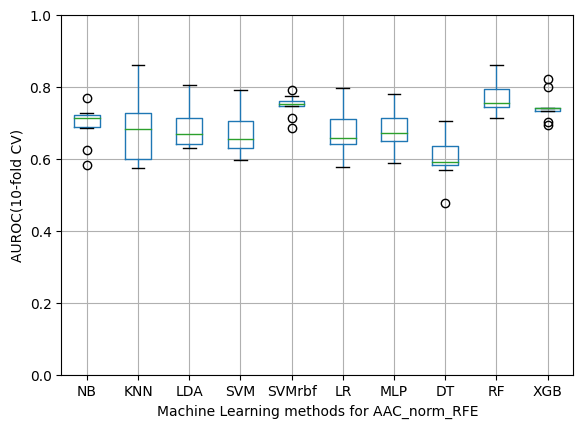


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_RFE_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

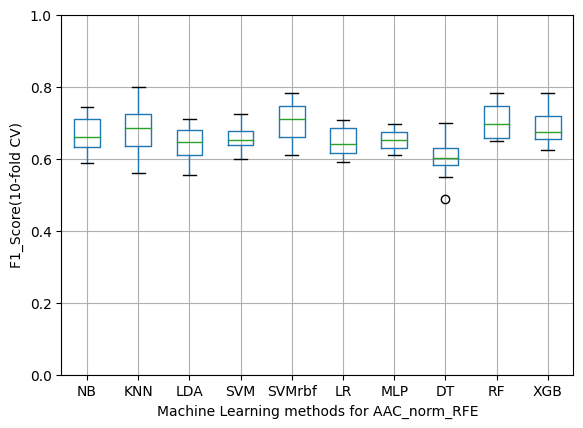


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_RFE_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

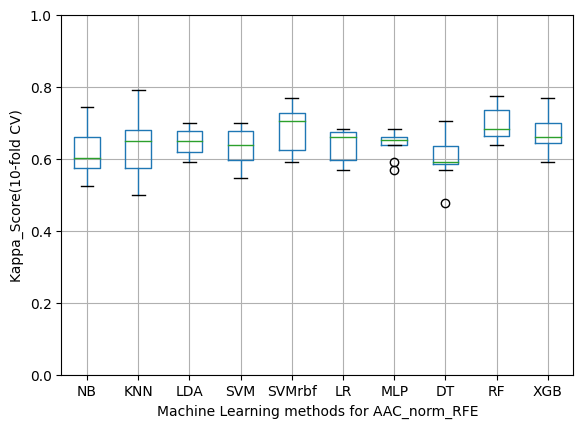


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_RFE_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

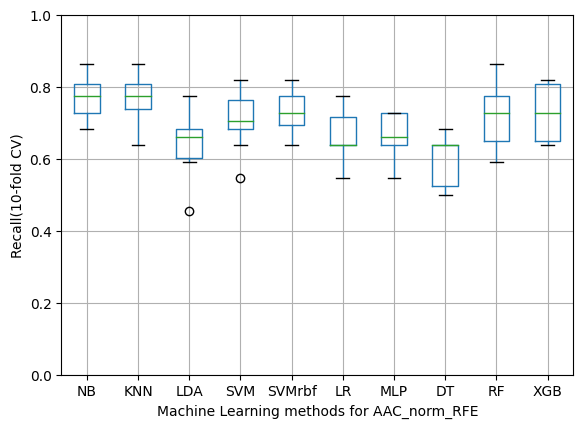


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_RFE_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

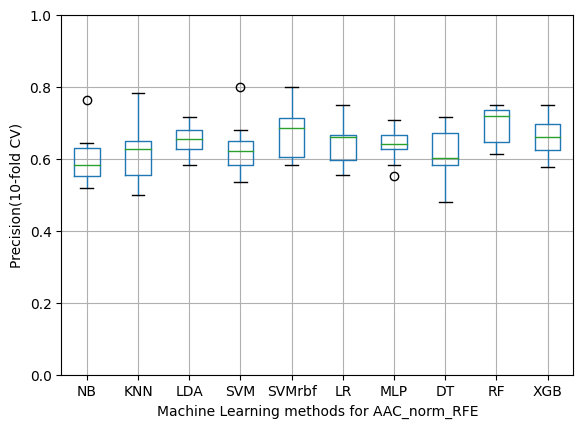

In [ ]:
# ML for AAC normalized dataset with all descriptors (no feature selection)

Xdata, Ydata, Features = getDataFromDataFrame(ds_AAC_norm_RFE)
df_res_auroc, df_res_f1, df_res_kappa_AAC_RFE, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_AAC_norm_RFE, df_res_auroc, nfold, label="AAC_norm_RFE", label_y="AUROC")

# F1_Score
MLmodels(ds_AAC_norm_RFE, df_res_f1, nfold, label="AAC_norm_RFE", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_AAC_norm_RFE, df_res_kappa_AAC_RFE, nfold, label="AAC_norm_RFE", label_y="Kappa_Score")

# Recall
MLmodels(ds_AAC_norm_RFE, df_res_recall, nfold, label="AAC_norm_RFE", label_y="Recall")

# Precision
MLmodels(ds_AAC_norm_RFE, df_res_precision, nfold, label="AAC_norm_RFE", label_y="Precision")



-> Get X & Y data, Features list
Shape (438, 401)
Shape X data: (438, 400)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.680, 0.0605, 0.667, 0.0621, 0.619, 0.0659, 0.764, 0.0992, 0.595, 0.0555, 0.0
KNN, 0.623, 0.0407, 0.669, 0.0326, 0.601, 0.0412, 0.809, 0.0881, 0.576, 0.0365, 0.0
LDA, 0.585, 0.0655, 0.591, 0.0794, 0.594, 0.0508, 0.600, 0.1345, 0.594, 0.0505, 0.1
SVM, 0.741, 0.0594, 0.682, 0.0742, 0.678, 0.0709, 0.691, 0.0949, 0.677, 0.0708, 0.0
SVMrbf, 0.778, 0.0469, 0.680, 0.0740, 0.692, 0.0642, 0.659, 0.1021, 0.708, 0.0646, 0.0
LR, 0.768, 0.0495, 0.711, 0.0705, 0.712, 0.0567, 0.714, 0.0997, 0.714, 0.0554, 0.0
MLP, 0.747, 0.0382, 0.717, 0.0740, 0.714, 0.0538, 0.736, 0.1199, 0.708, 0.0433, 3.5
DT, 0.571, 0.0790, 0.565, 0.0832, 0.571, 0.0784, 0.559, 0.10

<Figure size 640x480 with 0 Axes>

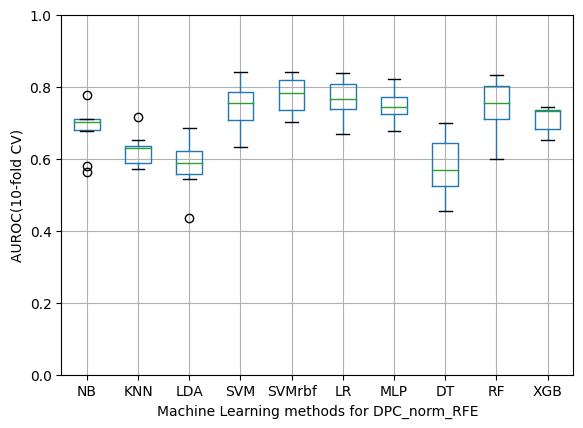


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_RFE_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

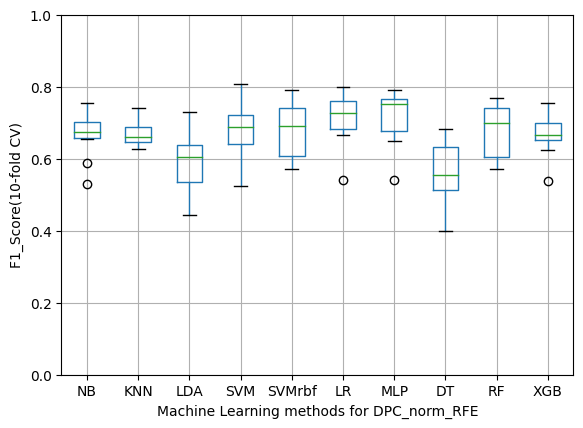


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_RFE_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

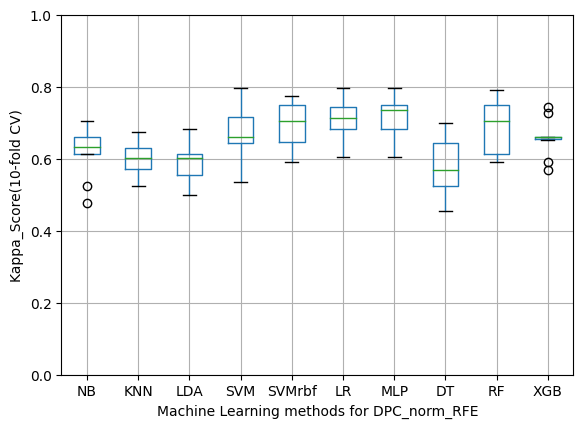


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_RFE_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

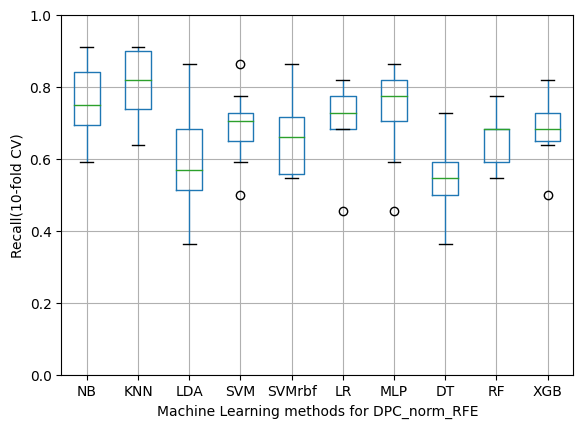


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_RFE_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

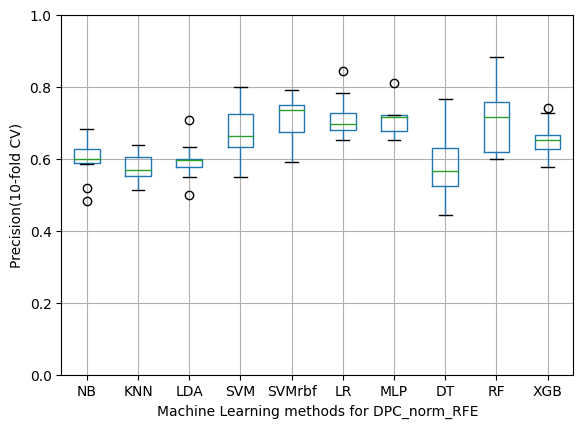

In [ ]:
# ML for DPC normalized dataset with all descriptors (no feature selection)

Xdata, Ydata, Features = getDataFromDataFrame(ds_DPC_norm_RFE)
df_res_auroc, df_res_f1, df_res_kappa_DPC_RFE, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_DPC_norm_RFE, df_res_auroc, nfold, label="DPC_norm_RFE", label_y="AUROC")

# F1_Score
MLmodels(ds_DPC_norm_RFE, df_res_f1, nfold, label="DPC_norm_RFE", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_DPC_norm_RFE, df_res_kappa_DPC_RFE, nfold, label="DPC_norm_RFE", label_y="Kappa_Score")

# Recall
MLmodels(ds_DPC_norm_RFE, df_res_recall, nfold, label="DPC_norm_RFE", label_y="Recall")

# Precision
MLmodels(ds_DPC_norm_RFE, df_res_precision, nfold, label="DPC_norm_RFE", label_y="Precision")


-> Get X & Y data, Features list
Shape (438, 421)
Shape X data: (438, 420)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.686, 0.0611, 0.675, 0.0473, 0.628, 0.0528, 0.773, 0.0813, 0.604, 0.0513, 0.0
KNN, 0.614, 0.0479, 0.658, 0.0425, 0.594, 0.0454, 0.782, 0.0881, 0.572, 0.0371, 0.0
LDA, 0.580, 0.0329, 0.585, 0.0391, 0.571, 0.0301, 0.605, 0.0612, 0.568, 0.0271, 0.1
SVM, 0.743, 0.0556, 0.684, 0.0664, 0.678, 0.0660, 0.695, 0.0839, 0.676, 0.0665, 0.0
SVMrbf, 0.777, 0.0463, 0.684, 0.0655, 0.694, 0.0591, 0.664, 0.0891, 0.710, 0.0599, 0.0
LR, 0.767, 0.0492, 0.707, 0.0692, 0.710, 0.0537, 0.709, 0.1020, 0.713, 0.0517, 0.0
MLP, 0.759, 0.0388, 0.695, 0.0660, 0.698, 0.0473, 0.695, 0.1038, 0.701, 0.0346, 3.2
DT, 0.660, 0.0470, 0.665, 0.0517, 0.660, 0.0465, 0.682, 0.10

<Figure size 640x480 with 0 Axes>

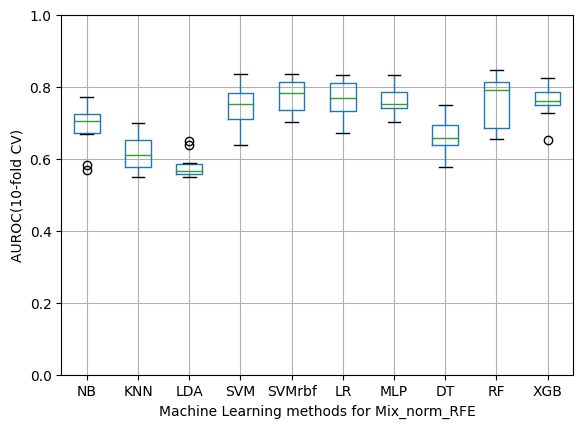


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_RFE_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

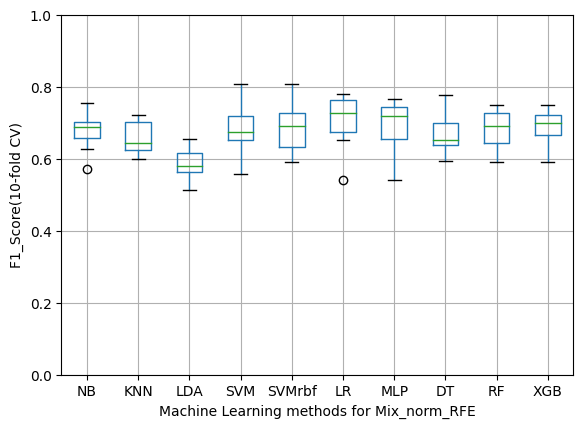


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_RFE_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

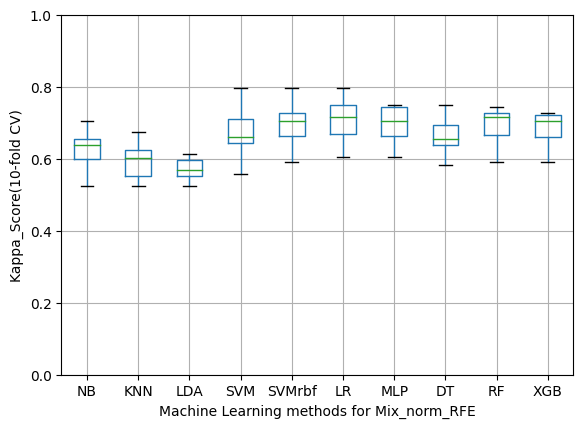


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_RFE_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

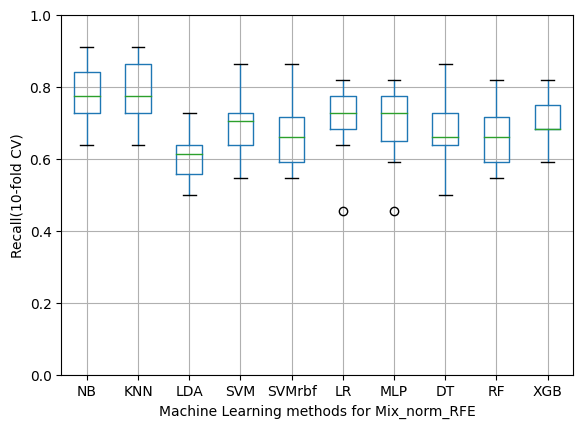


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_RFE_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

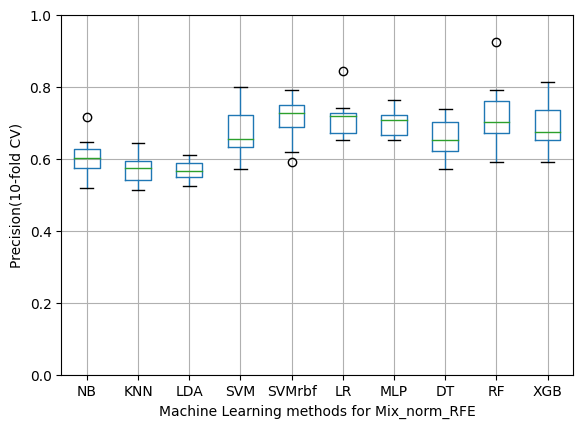

In [ ]:
# ML for Mix normalized dataset with all descriptors (no feature selection)

Xdata, Ydata, Features = getDataFromDataFrame(ds_Mix_norm_RFE)
df_res_auroc, df_res_f1, df_res_kappa_Mix_RFE, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_Mix_norm_RFE, df_res_auroc, nfold, label="Mix_norm_RFE", label_y="AUROC")

# F1_Score
MLmodels(ds_Mix_norm_RFE, df_res_f1, nfold, label="Mix_norm_RFE", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_Mix_norm_RFE, df_res_kappa_Mix_RFE, nfold, label="Mix_norm_RFE", label_y="Kappa_Score")

# Recall
MLmodels(ds_Mix_norm_RFE, df_res_recall, nfold, label="Mix_norm_RFE", label_y="Recall")

# Precision
MLmodels(ds_Mix_norm_RFE, df_res_precision, nfold, label="Mix_norm_RFE", label_y="Precision")


-> Get X & Y data, Features list
Shape (438, 11)
Shape X data: (438, 10)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.716, 0.0835, 0.679, 0.0821, 0.645, 0.0972, 0.741, 0.0789, 0.629, 0.0993, 0.0
KNN, 0.686, 0.0604, 0.693, 0.0285, 0.642, 0.0407, 0.805, 0.0457, 0.611, 0.0391, 0.0
LDA, 0.680, 0.0711, 0.641, 0.0595, 0.630, 0.0666, 0.655, 0.0680, 0.633, 0.0838, 0.0
SVM, 0.679, 0.0753, 0.652, 0.0632, 0.626, 0.0757, 0.695, 0.0762, 0.621, 0.0883, 0.0
SVMrbf, 0.745, 0.0500, 0.704, 0.0646, 0.681, 0.0692, 0.759, 0.1038, 0.664, 0.0721, 0.0
LR, 0.678, 0.0754, 0.644, 0.0527, 0.628, 0.0611, 0.668, 0.0676, 0.628, 0.0790, 0.0
MLP, 0.683, 0.0857, 0.635, 0.0584, 0.635, 0.0555, 0.636, 0.0909, 0.644, 0.0702, 0.3
DT, 0.598, 0.0709, 0.599, 0.0690, 0.598, 0.0707, 0.600, 0.0905

<Figure size 640x480 with 0 Axes>

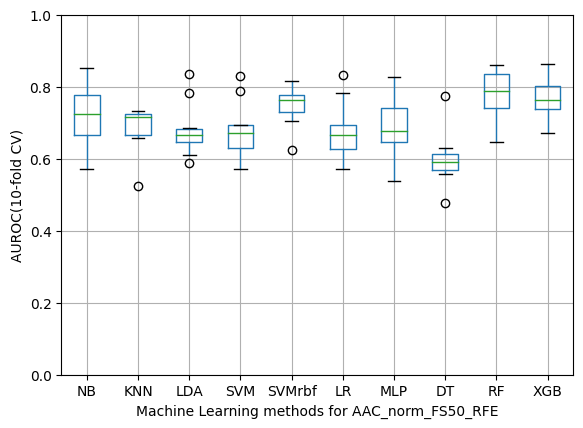


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_FS50_RFE_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

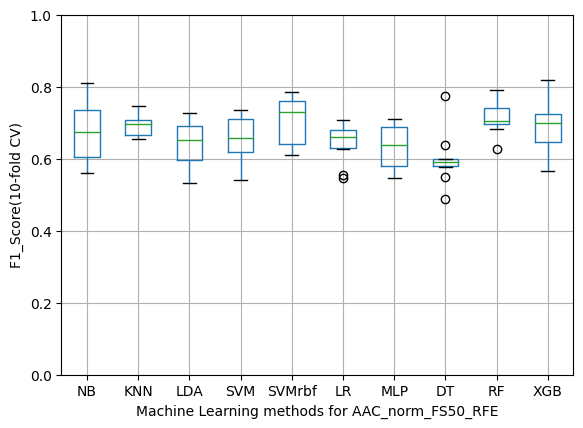


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_FS50_RFE_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

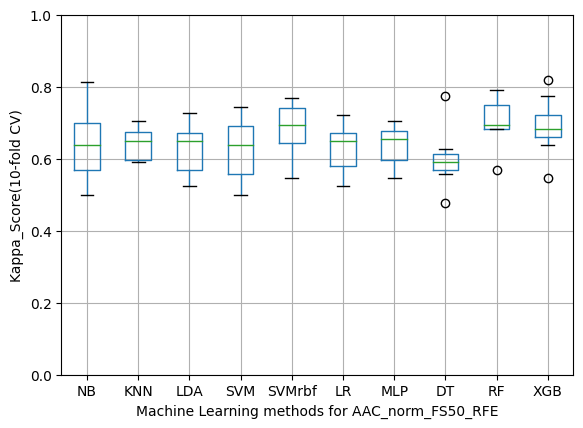


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_FS50_RFE_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

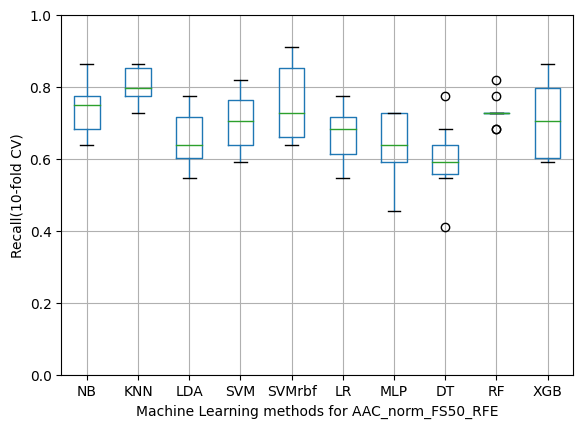


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_FS50_RFE_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

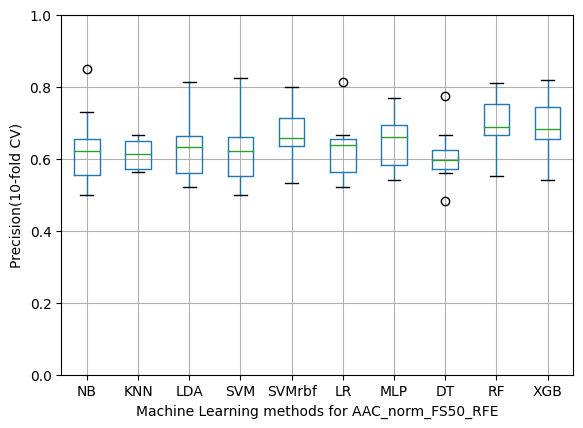

In [ ]:
# ML for AAC normalized dataset with selected features (50%)

Xdata, Ydata, Features = getDataFromDataFrame(ds_AAC_normFS50_RFE)
df_res_auroc, df_res_f1, df_res_kappa_AAC_FS50_RFE, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_AAC_normFS50_RFE, df_res_auroc, nfold, label="AAC_norm_FS50_RFE", label_y="AUROC")

# F1_Score
MLmodels(ds_AAC_normFS50_RFE, df_res_f1, nfold, label="AAC_norm_FS50_RFE", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_AAC_normFS50_RFE, df_res_kappa_AAC_FS50_RFE, nfold, label="AAC_norm_FS50_RFE", label_y="Kappa_Score")

# Recall
MLmodels(ds_AAC_normFS50_RFE, df_res_recall, nfold, label="AAC_norm_FS50_RFE", label_y="Recall")

# Precision
MLmodels(ds_AAC_normFS50_RFE, df_res_precision, nfold, label="AAC_norm_FS50_RFE", label_y="Precision")


-> Get X & Y data, Features list
Shape (438, 201)
Shape X data: (438, 200)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.740, 0.0737, 0.687, 0.0795, 0.644, 0.0843, 0.782, 0.1091, 0.618, 0.0839, 0.0
KNN, 0.603, 0.0623, 0.680, 0.0544, 0.593, 0.0572, 0.868, 0.1158, 0.562, 0.0389, 0.0
LDA, 0.751, 0.0621, 0.711, 0.0778, 0.701, 0.0752, 0.741, 0.1114, 0.691, 0.0731, 0.0
SVM, 0.809, 0.0558, 0.741, 0.0769, 0.740, 0.0714, 0.750, 0.1154, 0.741, 0.0741, 0.0
SVMrbf, 0.813, 0.0535, 0.725, 0.0797, 0.733, 0.0686, 0.709, 0.1041, 0.746, 0.0701, 0.0
LR, 0.811, 0.0579, 0.761, 0.0538, 0.760, 0.0478, 0.768, 0.0963, 0.764, 0.0598, 0.0
MLP, 0.811, 0.0405, 0.754, 0.0549, 0.753, 0.0397, 0.768, 0.1210, 0.755, 0.0512, 2.9
DT, 0.621, 0.0749, 0.635, 0.0716, 0.621, 0.0747, 0.659, 0.09

<Figure size 640x480 with 0 Axes>

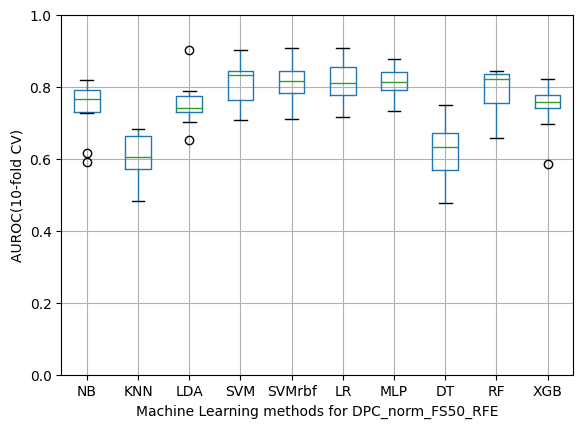


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_FS50_RFE_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

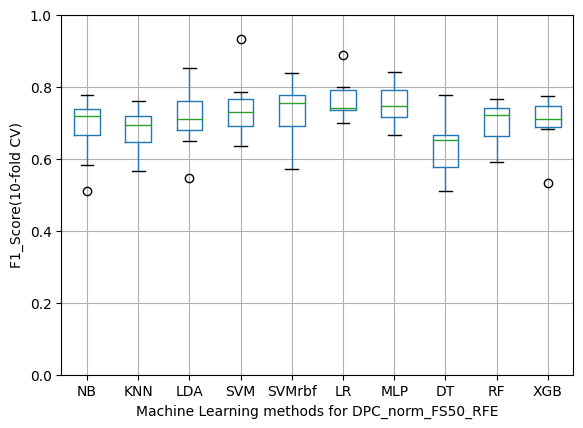


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_FS50_RFE_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

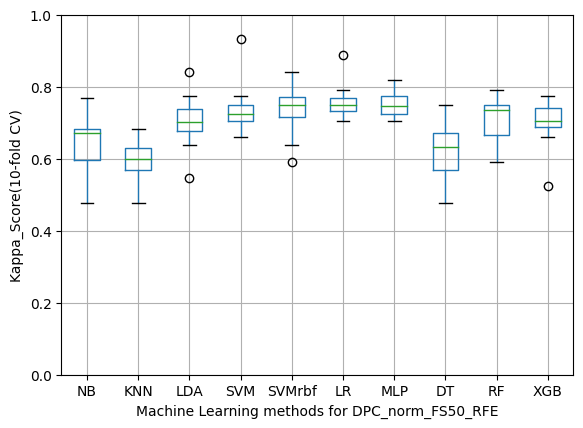


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_FS50_RFE_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

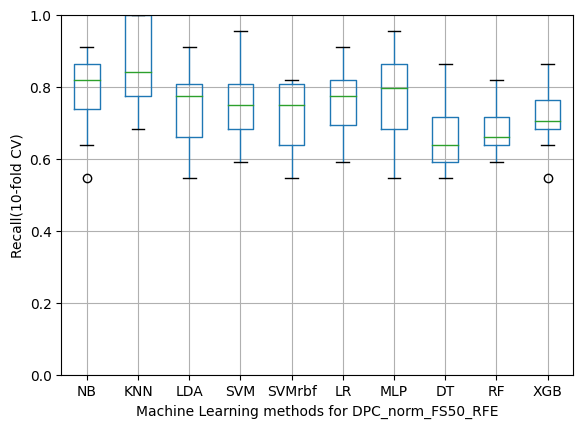


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_FS50_RFE_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

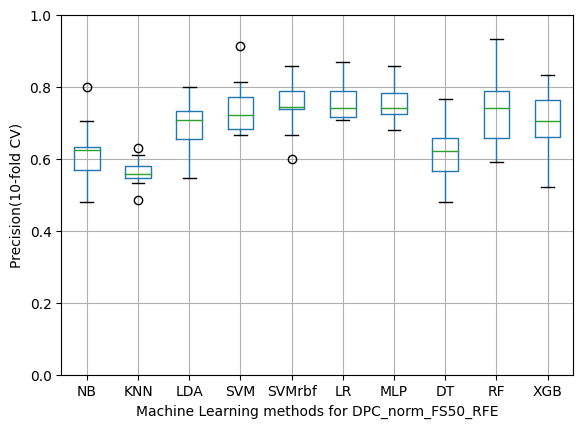

In [ ]:
# ML for DPC normalized dataset with selected features (50%)

Xdata, Ydata, Features = getDataFromDataFrame(ds_DPC_normFS50_RFE)
df_res_auroc, df_res_f1, df_res_kappa_DPC_FS50_RFE, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_DPC_normFS50_RFE, df_res_auroc, nfold, label="DPC_norm_FS50_RFE", label_y="AUROC")

# F1_Score
MLmodels(ds_DPC_normFS50_RFE, df_res_f1, nfold, label="DPC_norm_FS50_RFE", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_DPC_normFS50_RFE, df_res_kappa_DPC_FS50_RFE, nfold, label="DPC_norm_FS50_RFE", label_y="Kappa_Score")

# Recall
MLmodels(ds_DPC_normFS50_RFE, df_res_recall, nfold, label="DPC_norm_FS50_RFE", label_y="Recall")

# Precision
MLmodels(ds_DPC_normFS50_RFE, df_res_precision, nfold, label="DPC_norm_FS50_RFE", label_y="Precision")


-> Get X & Y data, Features list
Shape (438, 211)
Shape X data: (438, 210)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.747, 0.0667, 0.712, 0.0650, 0.672, 0.0729, 0.809, 0.0949, 0.639, 0.0685, 0.0
KNN, 0.646, 0.0675, 0.683, 0.0386, 0.610, 0.0459, 0.841, 0.0892, 0.579, 0.0386, 0.0
LDA, 0.723, 0.0696, 0.660, 0.0625, 0.653, 0.0580, 0.677, 0.0941, 0.651, 0.0583, 0.0
SVM, 0.787, 0.0675, 0.717, 0.0587, 0.715, 0.0478, 0.732, 0.1193, 0.719, 0.0779, 0.0
SVMrbf, 0.811, 0.0510, 0.720, 0.0583, 0.724, 0.0531, 0.714, 0.0814, 0.731, 0.0525, 0.0
LR, 0.807, 0.0573, 0.758, 0.0461, 0.754, 0.0419, 0.777, 0.0897, 0.749, 0.0572, 0.0
MLP, 0.814, 0.0490, 0.751, 0.0569, 0.744, 0.0576, 0.768, 0.0824, 0.740, 0.0717, 3.1
DT, 0.635, 0.0565, 0.635, 0.0637, 0.635, 0.0562, 0.641, 0.10

<Figure size 640x480 with 0 Axes>

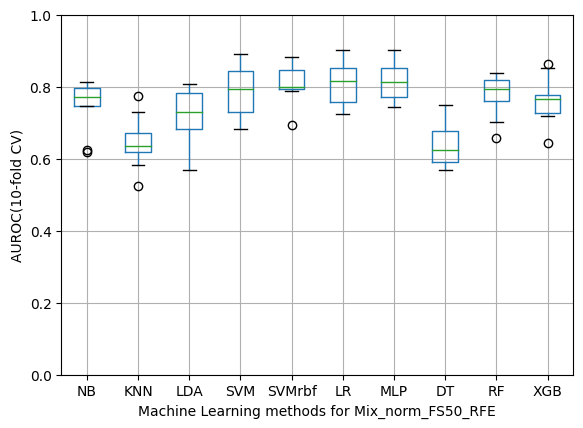


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_FS50_RFE_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

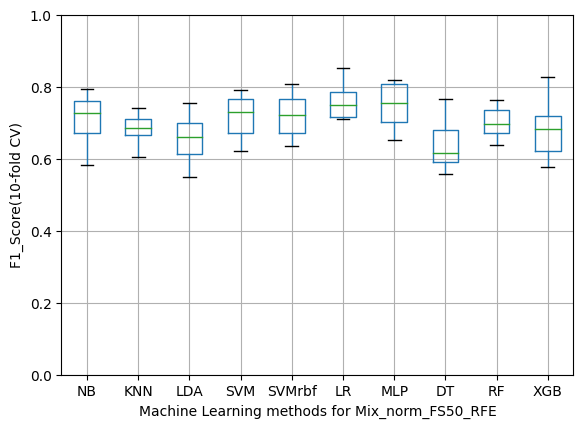


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_FS50_RFE_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

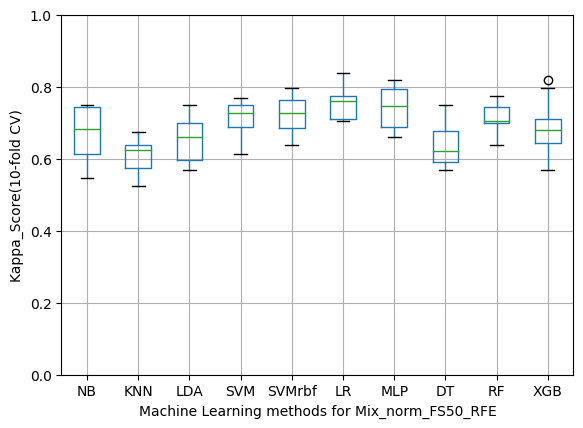


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_FS50_RFE_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

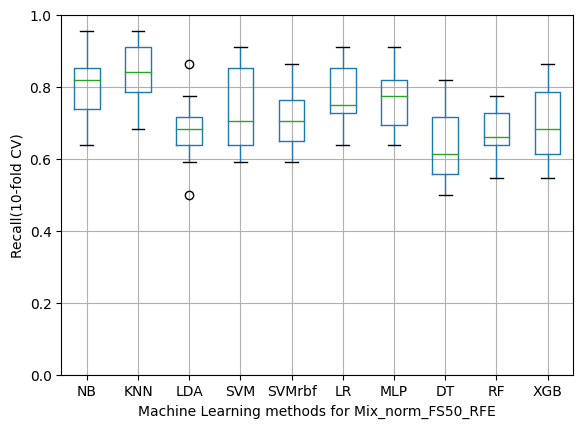


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_FS50_RFE_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

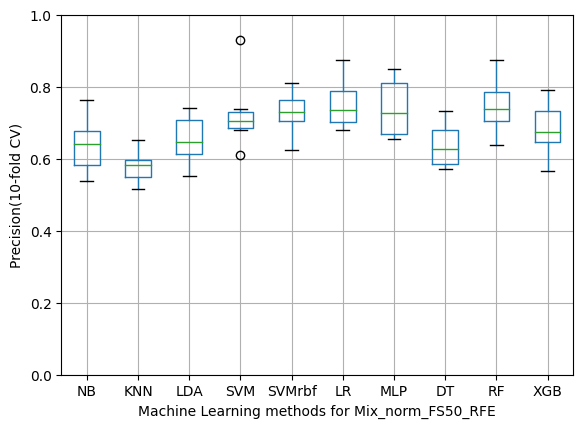

In [ ]:
# ML for Mix normalized dataset with selected features (50%)

Xdata, Ydata, Features = getDataFromDataFrame(ds_Mix_normFS50_RFE)
df_res_auroc, df_res_f1, df_res_kappa_Mix_FS50_RFE, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_Mix_normFS50_RFE, df_res_auroc, nfold, label="Mix_norm_FS50_RFE", label_y="AUROC")

# F1_Score
MLmodels(ds_Mix_normFS50_RFE, df_res_f1, nfold, label="Mix_norm_FS50_RFE", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_Mix_normFS50_RFE, df_res_kappa_Mix_FS50_RFE, nfold, label="Mix_norm_FS50_RFE", label_y="Kappa_Score")

# Recall
MLmodels(ds_Mix_normFS50_RFE, df_res_recall, nfold, label="Mix_norm_FS50_RFE", label_y="Recall")

# Precision
MLmodels(ds_Mix_normFS50_RFE, df_res_precision, nfold, label="Mix_norm_FS50_RFE", label_y="Precision")


-> Get X & Y data, Features list
Shape (438, 6)
Shape X data: (438, 5)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.687, 0.0703, 0.668, 0.0744, 0.628, 0.0870, 0.741, 0.0814, 0.610, 0.0808, 0.0
KNN, 0.669, 0.0479, 0.680, 0.0502, 0.649, 0.0563, 0.745, 0.0793, 0.631, 0.0596, 0.0
LDA, 0.664, 0.0819, 0.619, 0.0659, 0.615, 0.0697, 0.623, 0.0644, 0.619, 0.0791, 0.0
SVM, 0.660, 0.0877, 0.633, 0.0896, 0.617, 0.0930, 0.659, 0.1041, 0.612, 0.0905, 0.0
SVMrbf, 0.717, 0.0384, 0.687, 0.0428, 0.656, 0.0573, 0.750, 0.0618, 0.639, 0.0614, 0.0
LR, 0.661, 0.0845, 0.605, 0.0774, 0.601, 0.0797, 0.609, 0.0793, 0.605, 0.0881, 0.0
MLP, 0.552, 0.0712, 0.622, 0.0697, 0.525, 0.0896, 0.777, 0.0897, 0.519, 0.0602, 0.0
DT, 0.616, 0.0362, 0.621, 0.0324, 0.616, 0.0362, 0.627, 0.0490, 

<Figure size 640x480 with 0 Axes>

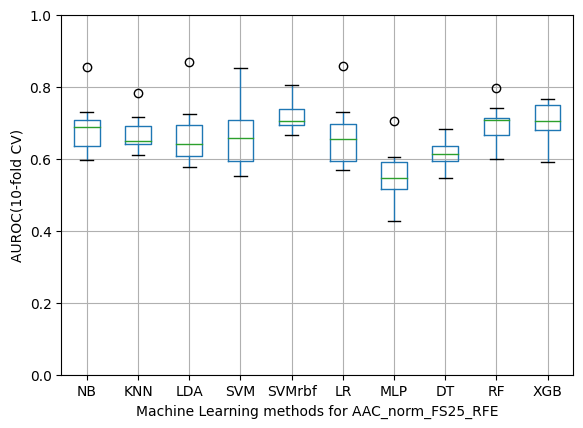


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_FS25_RFE_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

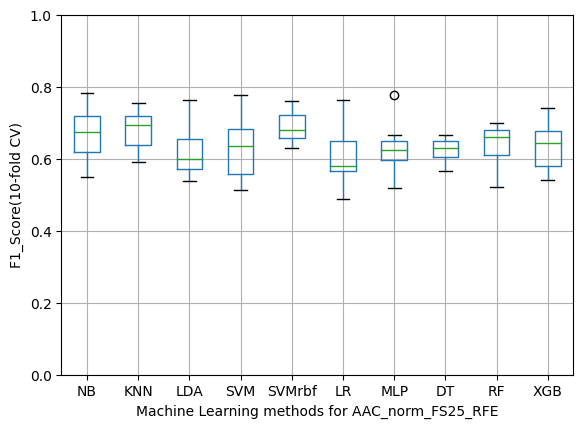


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_FS25_RFE_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

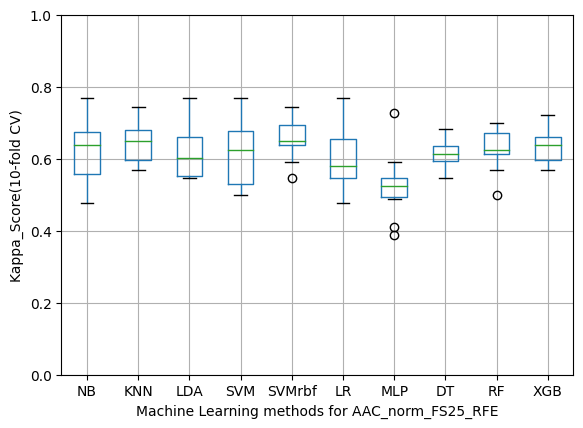


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_FS25_RFE_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

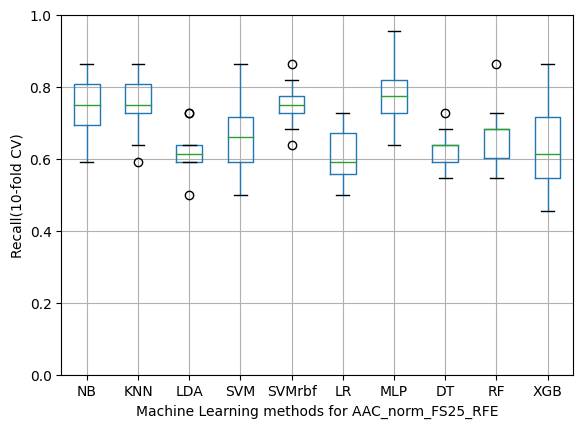


==>> Saving summary /content/drive/My Drive/TFM/results/ML_AAC_norm_FS25_RFE_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

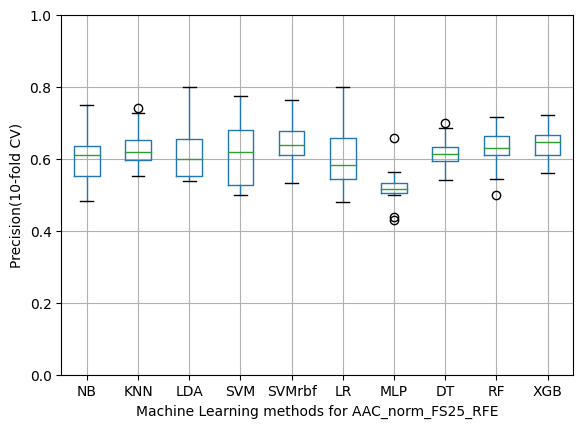

In [ ]:
# ML for AAC normalized dataset with selected features (25%)

Xdata, Ydata, Features = getDataFromDataFrame(ds_AAC_normFS25_RFE)
df_res_auroc, df_res_f1, df_res_kappa_AAC_FS25_RFE, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_AAC_normFS25_RFE, df_res_auroc, nfold, label="AAC_norm_FS25_RFE", label_y="AUROC")

# F1_Score
MLmodels(ds_AAC_normFS25_RFE, df_res_f1, nfold, label="AAC_norm_FS25_RFE", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_AAC_normFS25_RFE, df_res_kappa_AAC_FS25_RFE, nfold, label="AAC_norm_FS25_RFE", label_y="Kappa_Score")

# Recall
MLmodels(ds_AAC_normFS25_RFE, df_res_recall, nfold, label="AAC_norm_FS25_RFE", label_y="Recall")

# Precision
MLmodels(ds_AAC_normFS25_RFE, df_res_precision, nfold, label="AAC_norm_FS25_RFE", label_y="Precision")


-> Get X & Y data, Features list
Shape (438, 101)
Shape X data: (438, 100)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.759, 0.0779, 0.713, 0.0636, 0.669, 0.0695, 0.823, 0.0984, 0.633, 0.0612, 0.0
KNN, 0.638, 0.0583, 0.670, 0.0407, 0.584, 0.0490, 0.841, 0.0682, 0.558, 0.0326, 0.0
LDA, 0.802, 0.0825, 0.750, 0.0695, 0.749, 0.0724, 0.745, 0.0649, 0.758, 0.0938, 0.0
SVM, 0.834, 0.0742, 0.765, 0.0642, 0.756, 0.0663, 0.791, 0.0766, 0.742, 0.0692, 0.0
SVMrbf, 0.813, 0.0468, 0.732, 0.0633, 0.735, 0.0607, 0.723, 0.0799, 0.746, 0.0675, 0.0
LR, 0.821, 0.0649, 0.757, 0.0623, 0.751, 0.0675, 0.768, 0.0746, 0.752, 0.0855, 0.0
MLP, 0.809, 0.0583, 0.738, 0.0502, 0.728, 0.0501, 0.764, 0.0782, 0.717, 0.0535, 3.1
DT, 0.628, 0.0655, 0.617, 0.0747, 0.628, 0.0656, 0.605, 0.11

<Figure size 640x480 with 0 Axes>

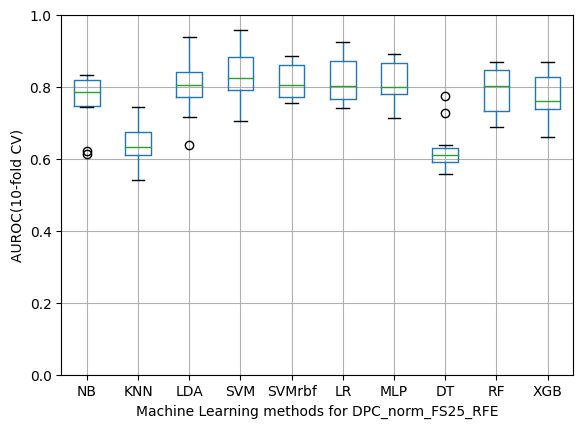


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_FS25_RFE_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

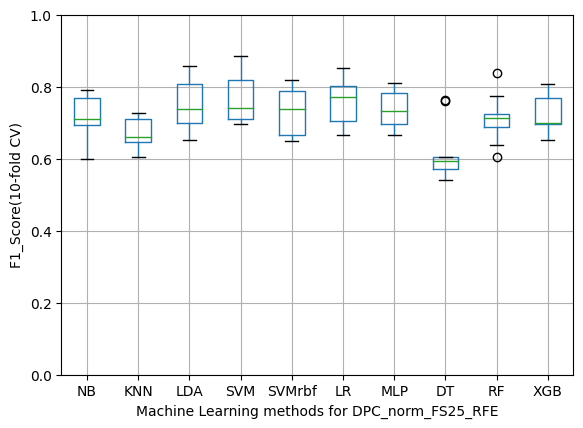


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_FS25_RFE_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

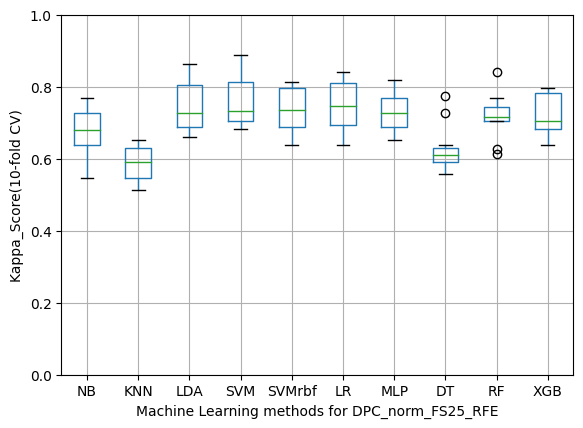


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_FS25_RFE_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

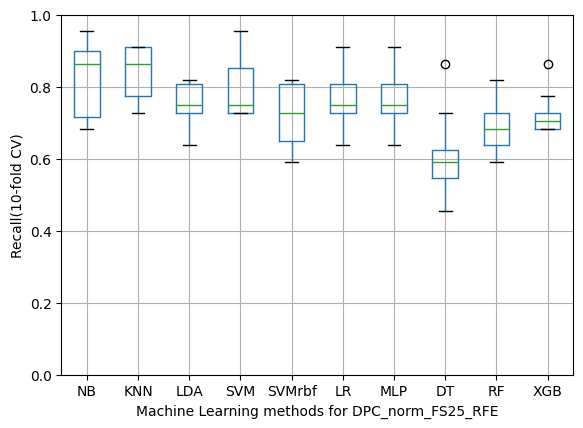


==>> Saving summary /content/drive/My Drive/TFM/results/ML_DPC_norm_FS25_RFE_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

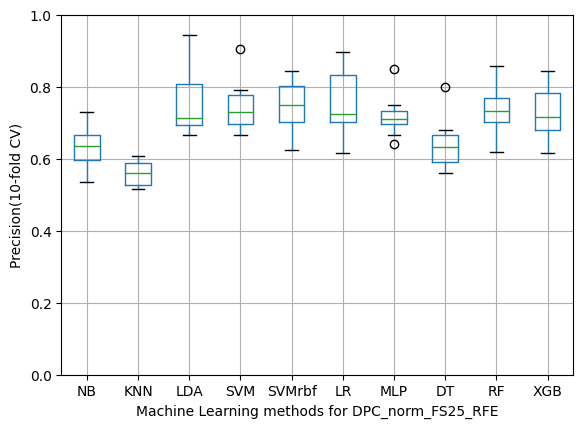

In [ ]:
# ML for DPC normalized dataset with selected features (25%)

Xdata, Ydata, Features = getDataFromDataFrame(ds_DPC_normFS25_RFE)
df_res_auroc, df_res_f1, df_res_kappa_DPC_FS25_RFE, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_DPC_normFS25_RFE, df_res_auroc, nfold, label="DPC_norm_FS25_RFE", label_y="AUROC")

# F1_Score
MLmodels(ds_DPC_normFS25_RFE, df_res_f1, nfold, label="DPC_norm_FS25_RFE", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_DPC_normFS25_RFE, df_res_kappa_DPC_FS25_RFE, nfold, label="DPC_norm_FS25_RFE", label_y="Kappa_Score")

# Recall
MLmodels(ds_DPC_normFS25_RFE, df_res_recall, nfold, label="DPC_norm_FS25_RFE", label_y="Recall")

# Precision
MLmodels(ds_DPC_normFS25_RFE, df_res_precision, nfold, label="DPC_norm_FS25_RFE", label_y="Precision")


-> Get X & Y data, Features list
Shape (438, 106)
Shape X data: (438, 105)
Shape Y data: (438,)
Done!
* Building 10-fold CV for 10 classifiers: ['NB', 'KNN', 'LDA', 'SVM', 'SVMrbf', 'LR', 'MLP', 'DT', 'RF', 'XGB']
ML method, AUROC Mean, AUROC SD, F1 Mean, F1 SD, Kappa Mean, Kappa SD, Recall Mean, Recall SD, Precision Mean, Precision SD, Time (min)
NB, 0.763, 0.0599, 0.704, 0.0689, 0.663, 0.0804, 0.800, 0.0958, 0.636, 0.0861, 0.0
KNN, 0.671, 0.0435, 0.694, 0.0325, 0.610, 0.0445, 0.882, 0.0582, 0.574, 0.0340, 0.0
LDA, 0.790, 0.0433, 0.715, 0.0424, 0.712, 0.0392, 0.723, 0.0688, 0.712, 0.0440, 0.0
SVM, 0.805, 0.0584, 0.719, 0.0541, 0.719, 0.0486, 0.723, 0.0897, 0.722, 0.0494, 0.0
SVMrbf, 0.817, 0.0412, 0.742, 0.0652, 0.740, 0.0621, 0.750, 0.0844, 0.737, 0.0579, 0.0
LR, 0.804, 0.0531, 0.725, 0.0398, 0.728, 0.0317, 0.718, 0.0698, 0.737, 0.0362, 0.0
MLP, 0.807, 0.0470, 0.740, 0.0569, 0.733, 0.0580, 0.759, 0.0789, 0.728, 0.0696, 3.7
DT, 0.642, 0.0613, 0.644, 0.0470, 0.642, 0.0609, 0.641, 0.05

<Figure size 640x480 with 0 Axes>

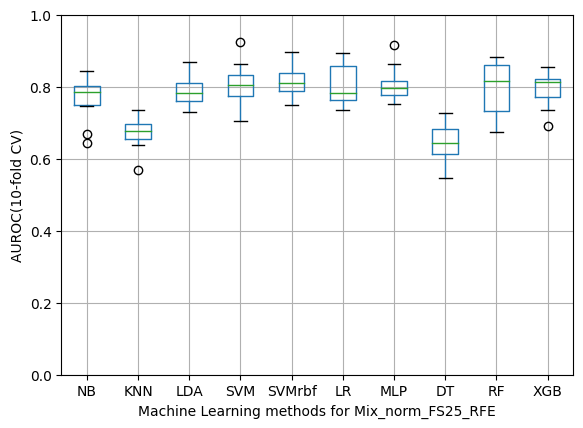


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_FS25_RFE_F1_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

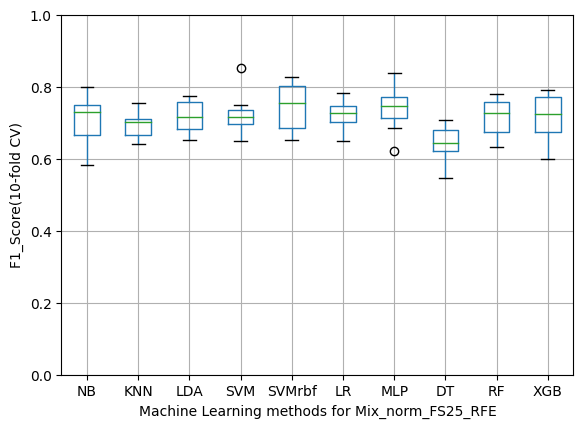


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_FS25_RFE_Kappa_Score.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

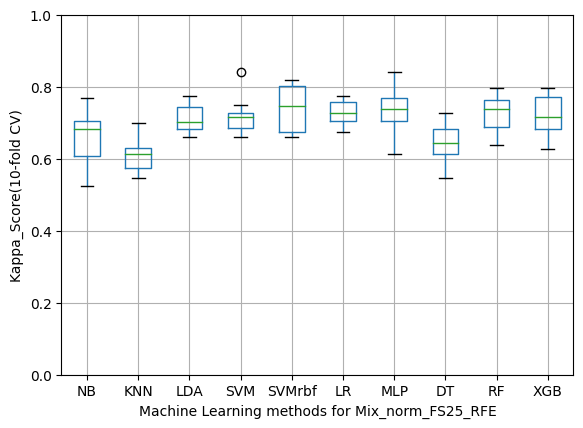


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_FS25_RFE_Recall.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

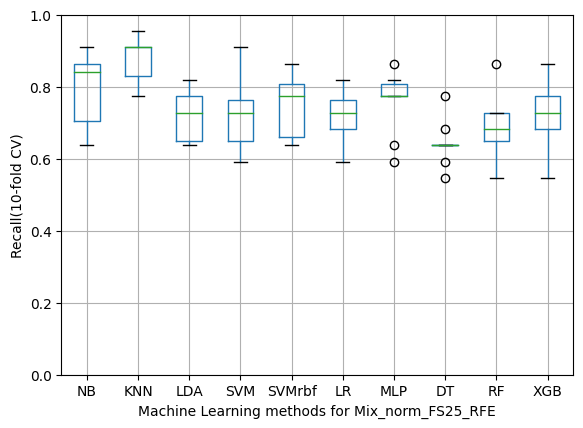


==>> Saving summary /content/drive/My Drive/TFM/results/ML_Mix_norm_FS25_RFE_Precision.csv
==> Fold = 10


<Figure size 640x480 with 0 Axes>

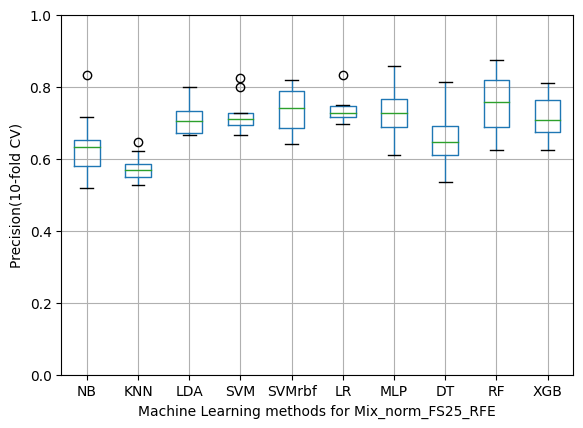

In [ ]:
# ML for Mix normalized dataset with selected features (25%)

Xdata, Ydata, Features = getDataFromDataFrame(ds_Mix_normFS25_RFE)
df_res_auroc, df_res_f1, df_res_kappa_Mix_FS25_RFE, df_res_recall, df_res_precision = MLOuterCV(Xdata, Ydata, nfold)

# AUROC
MLmodels(ds_Mix_normFS25_RFE, df_res_auroc, nfold, label="Mix_norm_FS25_RFE", label_y="AUROC")

# F1_Score
MLmodels(ds_Mix_normFS25_RFE, df_res_f1, nfold, label="Mix_norm_FS25_RFE", label_y="F1_Score")

# Kappa_Score
MLmodels(ds_Mix_normFS25_RFE, df_res_kappa_Mix_FS25_RFE, nfold, label="Mix_norm_FS25_RFE", label_y="Kappa_Score")

# Recall
MLmodels(ds_Mix_normFS25_RFE, df_res_recall, nfold, label="Mix_norm_FS25_RFE", label_y="Recall")

# Precision
MLmodels(ds_Mix_normFS25_RFE, df_res_precision, nfold, label="Mix_norm_FS25_RFE", label_y="Precision")

### Statistical Analysis
### For each dataset

In [ ]:
# Remove the last two columns from each dataframe

dicc_RFE = {
    "df_res_kappa_AAC_RFE": df_res_kappa_AAC_RFE,
    "df_res_kappa_DPC_RFE": df_res_kappa_DPC_RFE,
    "df_res_kappa_Mix_RFE": df_res_kappa_Mix_RFE,
    "df_res_kappa_AAC_FS50_RFE": df_res_kappa_AAC_FS50_RFE,
    "df_res_kappa_DPC_FS50_RFE": df_res_kappa_DPC_FS50_RFE,
    "df_res_kappa_Mix_FS50_RFE": df_res_kappa_Mix_FS50_RFE,
    "df_res_kappa_AAC_FS25_RFE": df_res_kappa_AAC_FS25_RFE,
    "df_res_kappa_DPC_FS25_RFE": df_res_kappa_DPC_FS25_RFE,
    "df_res_kappa_Mix_FS25_RFE": df_res_kappa_Mix_FS25_RFE
}

datasets_RFE = {}

for dataset_name, dataset in dicc_RFE.items():
    datasets_RFE[dataset_name] = remove(dataset)

In [ ]:
# Call Shapiro-Wilks function for each data set

for dataset_name, dataset in datasets_RFE.items():
    shapiro_test(dataset, dataset_name)

Shapiro-Wilk test does not reject the null hypothesis.
The dataset df_res_kappa_AAC_RFE FOLLOWS a normal distribution.

Shapiro-Wilk test does not reject the null hypothesis.
The dataset df_res_kappa_DPC_RFE FOLLOWS a normal distribution.

Shapiro-Wilk test rejects the null hypothesis.
The dataset df_res_kappa_Mix_RFE DOES NOT FOLLOWS a normal distribution.

Shapiro-Wilk test does not reject the null hypothesis.
The dataset df_res_kappa_AAC_FS50_RFE FOLLOWS a normal distribution.

Shapiro-Wilk test rejects the null hypothesis.
The dataset df_res_kappa_DPC_FS50_RFE DOES NOT FOLLOWS a normal distribution.

Shapiro-Wilk test does not reject the null hypothesis.
The dataset df_res_kappa_Mix_FS50_RFE FOLLOWS a normal distribution.

Shapiro-Wilk test does not reject the null hypothesis.
The dataset df_res_kappa_AAC_FS25_RFE FOLLOWS a normal distribution.

Shapiro-Wilk test does not reject the null hypothesis.
The dataset df_res_kappa_DPC_FS25_RFE FOLLOWS a normal distribution.

Shapiro-Wilk 

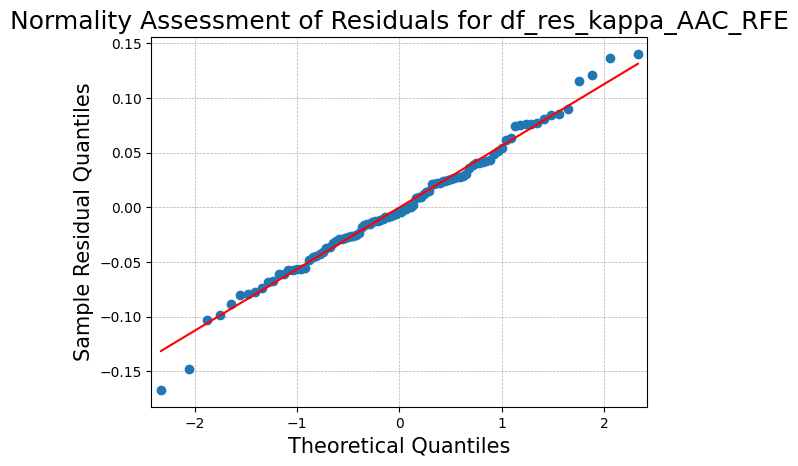

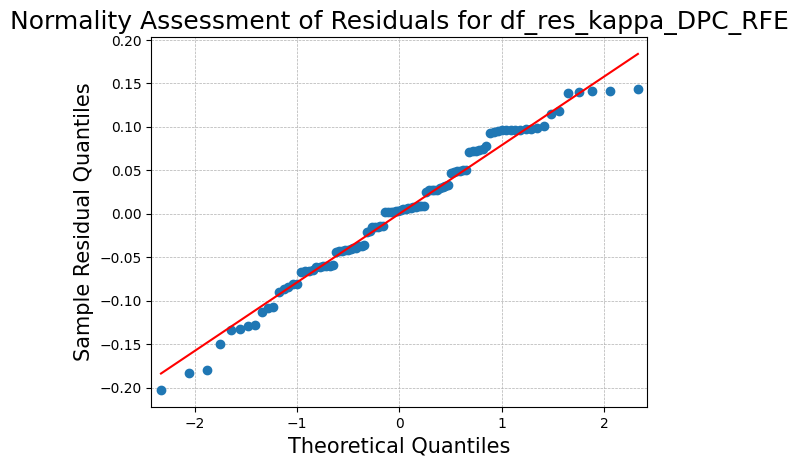

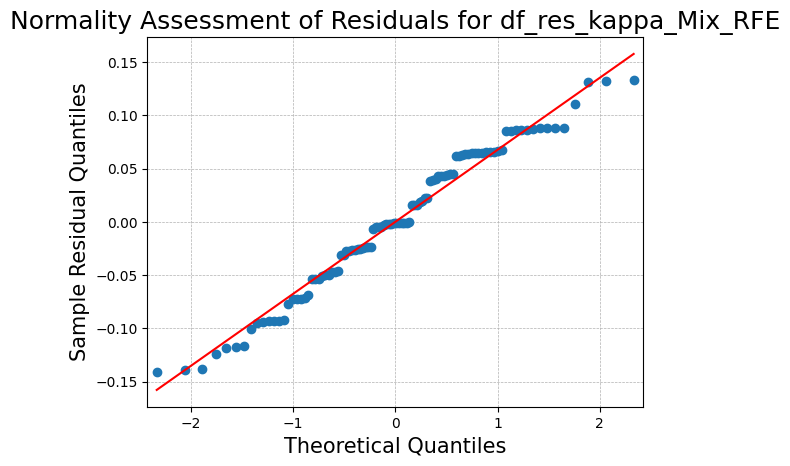

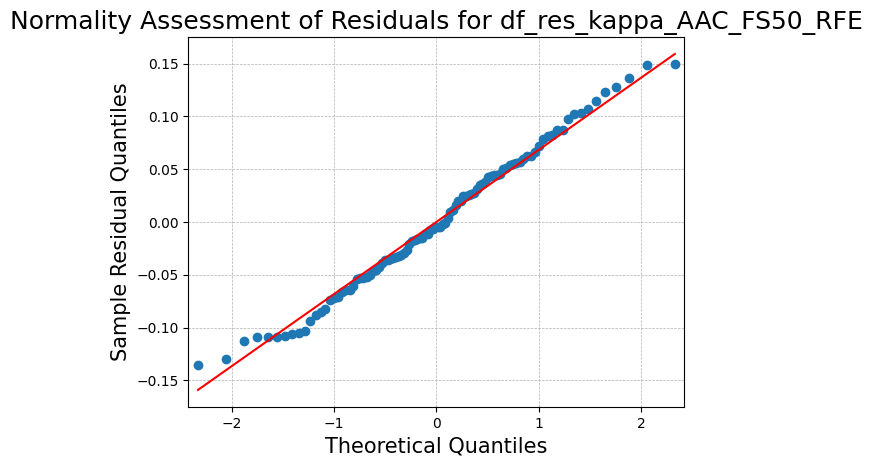

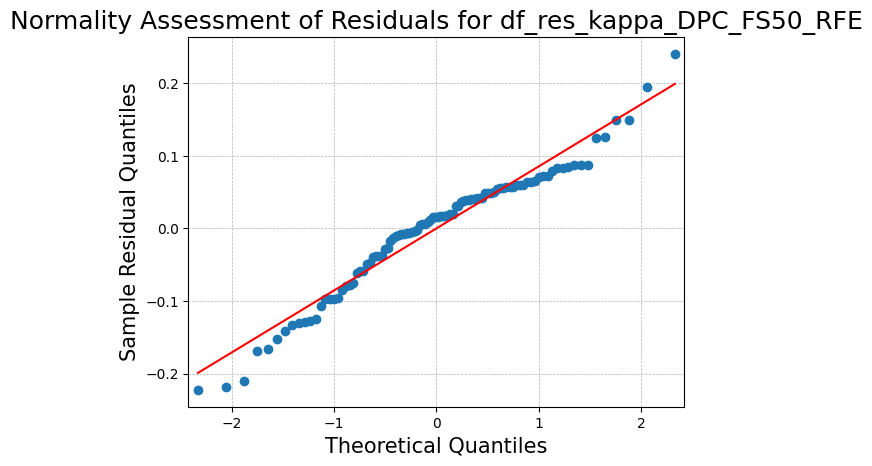

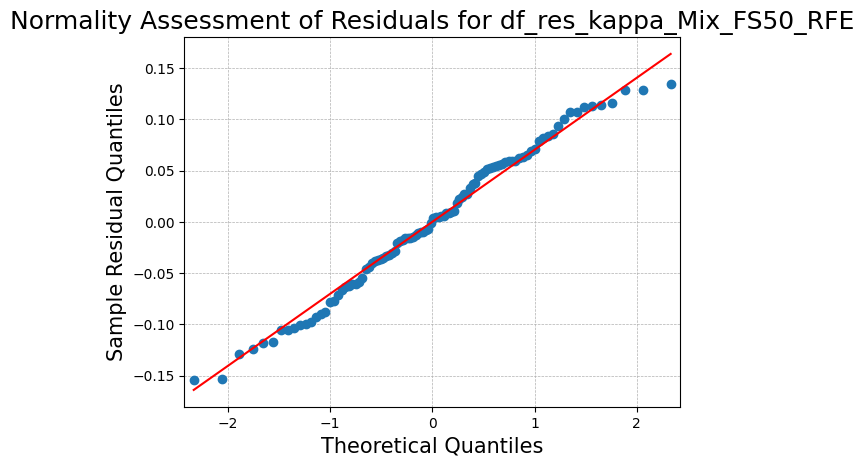

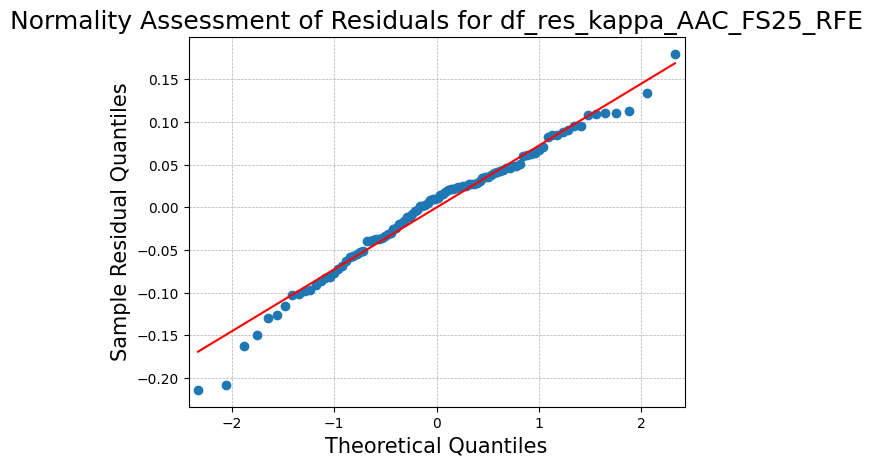

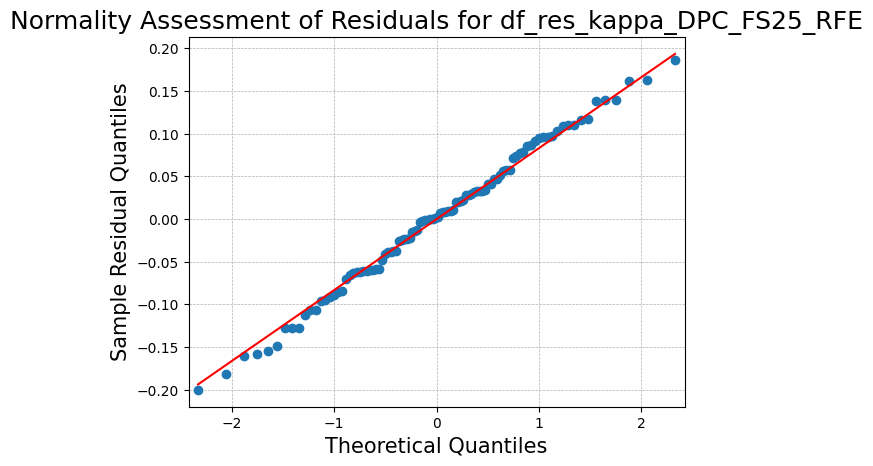

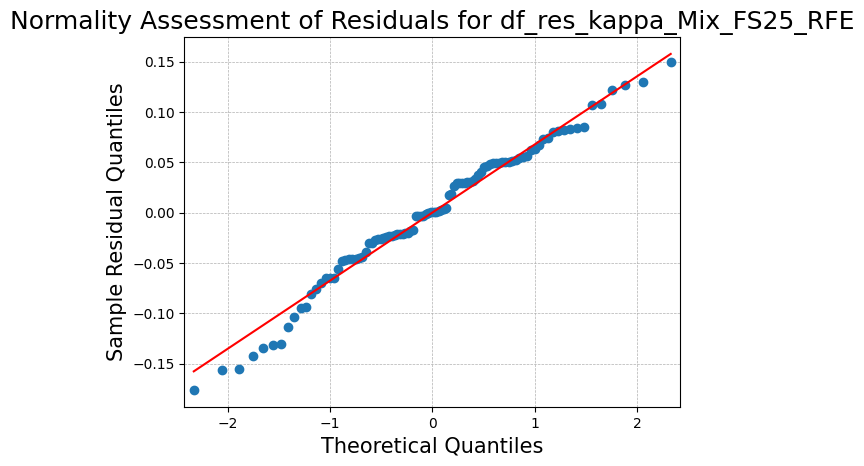

In [ ]:
# QQplot

for dataset_name, dataset in datasets_RFE.items():
    assess_normality(dataset, dataset_name)

In [ ]:
# ANOVA

norm_dicc_RFE = {
    "df_res_kappa_AAC_RFE": df_res_kappa_AAC_RFE,
    "df_res_kappa_DPC_RFE": df_res_kappa_DPC_RFE,
    "df_res_kappa_AAC_FS50_RFE": df_res_kappa_AAC_FS50_RFE,
    "df_res_kappa_Mix_FS50_RFE": df_res_kappa_Mix_FS50_RFE,
    "df_res_kappa_AAC_FS25_RFE": df_res_kappa_AAC_FS25_RFE,
    "df_res_kappa_DPC_FS25_RFE": df_res_kappa_DPC_FS25_RFE,
}

norm_datasets_RFE = {}

for dataset_name, dataset in norm_dicc_RFE.items():
    norm_datasets_RFE[dataset_name] = remove(dataset)

In [ ]:
for dataset_name, dataset in norm_datasets_RFE.items():
    anova(dataset, dataset_name)

Statistical F: 2.470604772567589
P value: 0.014438770812916998
Rejects the null hypothesis.
For the dataset df_res_kappa_AAC_RFE THERE ARE statistically significant differences between the classifiers's means.

Statistical F: 6.533930835475108
P value: 4.0550904465755783e-07
Rejects the null hypothesis.
For the dataset df_res_kappa_DPC_RFE THERE ARE statistically significant differences between the classifiers's means.

Statistical F: 2.11002425538008
P value: 0.036553368618215745
Rejects the null hypothesis.
For the dataset df_res_kappa_AAC_FS50_RFE THERE ARE statistically significant differences between the classifiers's means.

Statistical F: 6.582947550946705
P value: 3.602601893173972e-07
Rejects the null hypothesis.
For the dataset df_res_kappa_Mix_FS50_RFE THERE ARE statistically significant differences between the classifiers's means.

Statistical F: 2.433560642499041
P value: 0.015902374450266266
Rejects the null hypothesis.
For the dataset df_res_kappa_AAC_FS25_RFE THERE ARE 

In [ ]:
# Kruskall Wallis

not_norm_dicc_RFE = {
    "df_res_kappa_Mix_RFE": df_res_kappa_Mix_RFE,
    "df_res_kappa_DPC_FS50_RFE": df_res_kappa_DPC_FS50_RFE,
    "df_res_kappa_Mix_FS25_RFE": df_res_kappa_Mix_FS25_RFE
}

not_norm_datasets_RFE = {}

for dataset_name, dataset in not_norm_dicc.items():
    not_norm_datasets_RFE[dataset_name] = remove(dataset)

In [ ]:
for dataset_name, dataset in not_norm_datasets_RFE.items():
    kruskal_w(dataset, dataset_name)

Statistical F: 44.25437765751839
P value: 1.2669619364515008e-06
Rejects the null hypothesis.
For the dataset df_res_kappa_Mix THERE IS at least one classifier whose performance is statistically different from the rest.

Statistical F: 37.99146809589334
P value: 1.749289918894328e-05
Rejects the null hypothesis.
For the dataset df_res_kappa_DPC_FS25 THERE IS at least one classifier whose performance is statistically different from the rest.

Statistical F: 37.407778146795046
P value: 2.2254135240222935e-05
Rejects the null hypothesis.
For the dataset df_res_kappa_Mix_FS25 THERE IS at least one classifier whose performance is statistically different from the rest.



Results for the dataset df_res_kappa_AAC_RFE

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    DT    KNN   0.0301 0.9776 -0.0548 0.1151  False
    DT    LDA   0.0412 0.8575 -0.0438 0.1261  False
    DT     LR   0.0344 0.9478 -0.0505 0.1193  False
    DT    MLP   0.0343 0.9487 -0.0506 0.1192  False
    DT     NB   0.0096    1.0 -0.0754 0.0945  False
    DT     RF   0.0914 0.0247  0.0065 0.1763   True
    DT    SVM     0.03 0.9784  -0.055 0.1149  False
    DT SVMrbf   0.0803   0.08 -0.0046 0.1652  False
    DT    XGB   0.0643 0.3069 -0.0207 0.1492  False
   KNN    LDA    0.011    1.0 -0.0739  0.096  False
   KNN     LR   0.0043    1.0 -0.0806 0.0892  False
   KNN    MLP   0.0042    1.0 -0.0808 0.0891  False
   KNN     NB  -0.0206 0.9986 -0.1055 0.0644  False
   KNN     RF   0.0613 0.3742 -0.0237 0.1462  False
   KNN    SVM  -0.0002    1.0 -0.0851 0.0848  False
   KNN SVMrbf   0.

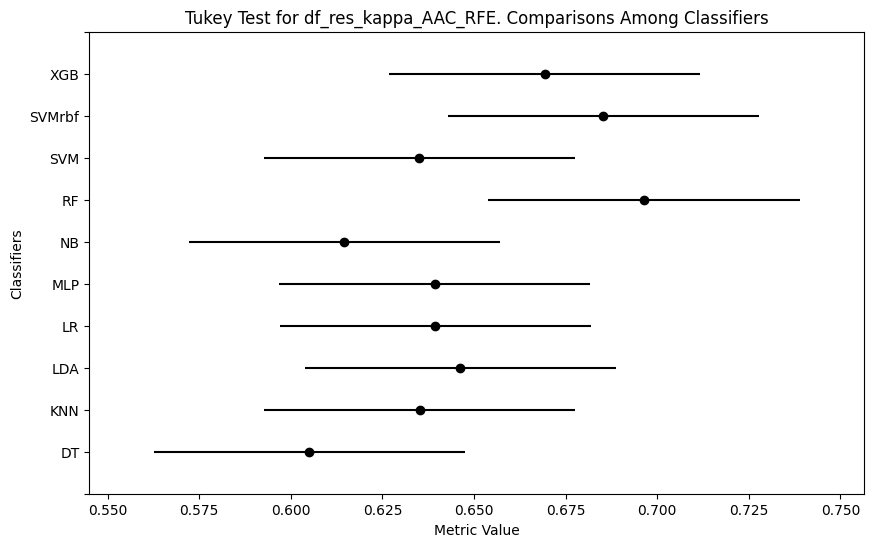


Results for the dataset df_res_kappa_DPC_RFE

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    DT    KNN   0.0298 0.9897 -0.0641  0.1236  False
    DT    LDA   0.0229 0.9986  -0.071  0.1168  False
    DT     LR   0.1412 0.0002  0.0473  0.2351   True
    DT    MLP   0.1436 0.0001  0.0497  0.2374   True
    DT     NB    0.048 0.8142 -0.0458  0.1419  False
    DT     RF   0.1145 0.0056  0.0206  0.2084   True
    DT    SVM    0.107  0.013  0.0131  0.2009   True
    DT SVMrbf    0.121 0.0026  0.0271  0.2149   True
    DT    XGB   0.0869 0.0942  -0.007  0.1808  False
   KNN    LDA  -0.0069    1.0 -0.1008   0.087  False
   KNN     LR   0.1115  0.008  0.0176  0.2054   True
   KNN    MLP   0.1138 0.0061  0.0199  0.2077   True
   KNN     NB   0.0183 0.9998 -0.0756  0.1122  False
   KNN     RF   0.0847 0.1131 -0.0092  0.1786  False
   KNN    SVM   0.0773 0.2019 -0.0166  0.1712  False

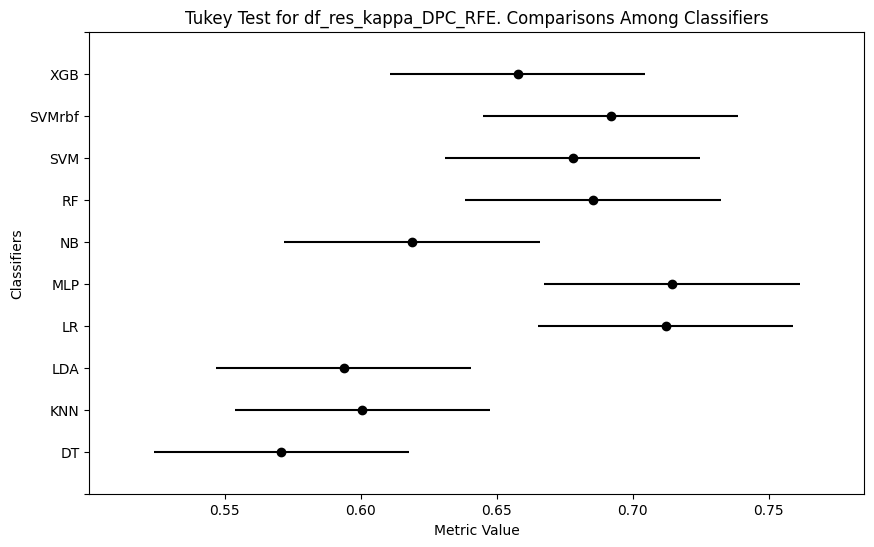


Results for the dataset df_res_kappa_Mix_RFE

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    DT    KNN  -0.0658 0.1604 -0.1426  0.0111  False
    DT    LDA  -0.0888  0.011 -0.1657  -0.012   True
    DT     LR   0.0502 0.5198 -0.0267   0.127  False
    DT    MLP   0.0387 0.8267 -0.0381  0.1156  False
    DT     NB  -0.0316 0.9427 -0.1084  0.0452  False
    DT     RF   0.0347 0.9024 -0.0421  0.1115  False
    DT    SVM   0.0183 0.9988 -0.0585  0.0951  False
    DT SVMrbf   0.0345 0.9048 -0.0423  0.1113  False
    DT    XGB   0.0255 0.9859 -0.0513  0.1023  False
   KNN    LDA  -0.0231  0.993 -0.0999  0.0537  False
   KNN     LR   0.1159 0.0002  0.0391  0.1927   True
   KNN    MLP   0.1045 0.0011  0.0277  0.1813   True
   KNN     NB   0.0341 0.9103 -0.0427   0.111  False
   KNN     RF   0.1004 0.0021  0.0236  0.1772   True
   KNN    SVM    0.084 0.0207  0.0072  0.1609   True

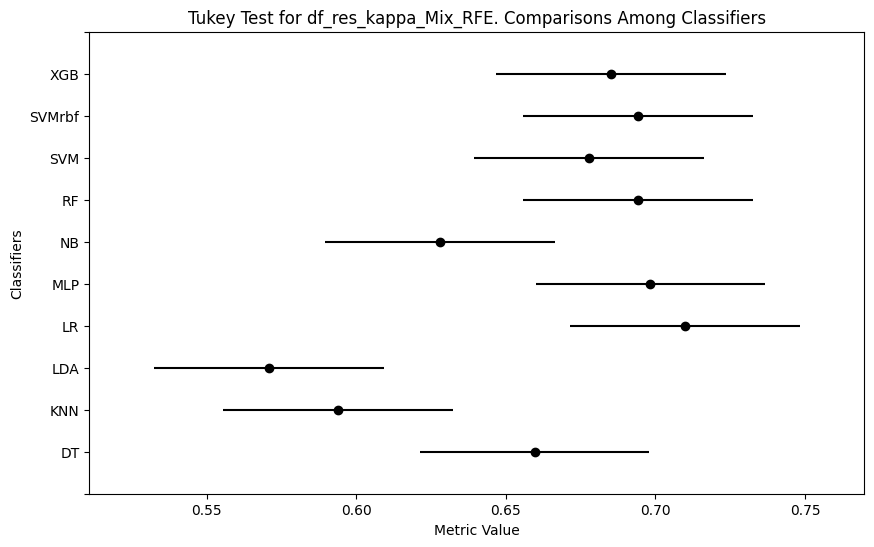


Results for the dataset df_res_kappa_AAC_FS50_RFE

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    DT    KNN   0.0436 0.9368 -0.0606 0.1477  False
    DT    LDA   0.0323 0.9912 -0.0718 0.1364  False
    DT     LR     0.03 0.9948 -0.0741 0.1342  False
    DT    MLP   0.0367 0.9785 -0.0674 0.1409  False
    DT     NB   0.0464 0.9096 -0.0578 0.1505  False
    DT     RF   0.1053 0.0451  0.0012 0.2095   True
    DT    SVM   0.0277 0.9971 -0.0764 0.1319  False
    DT SVMrbf   0.0826 0.2462 -0.0216 0.1867  False
    DT    XGB   0.0915 0.1357 -0.0126 0.1956  False
   KNN    LDA  -0.0113    1.0 -0.1154 0.0929  False
   KNN     LR  -0.0135    1.0 -0.1177 0.0906  False
   KNN    MLP  -0.0068    1.0 -0.1109 0.0973  False
   KNN     NB   0.0028    1.0 -0.1013 0.1069  False
   KNN     RF   0.0618 0.6522 -0.0423 0.1659  False
   KNN    SVM  -0.0158    1.0 -0.1199 0.0883  False
   KNN SVMrb

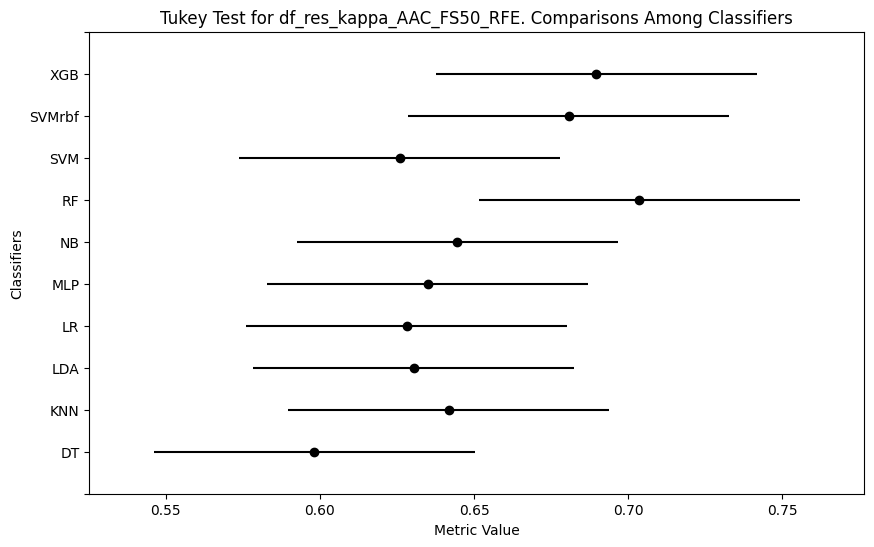


Results for the dataset df_res_kappa_DPC_FS50_RFE

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    DT    KNN  -0.0277 0.9965  -0.129  0.0736  False
    DT    LDA   0.0797 0.2562 -0.0216  0.1809  False
    DT     LR   0.1391  0.001  0.0378  0.2404   True
    DT    MLP   0.1321 0.0022  0.0309  0.2334   True
    DT     NB   0.0232 0.9991 -0.0781  0.1244  False
    DT     RF   0.0845 0.1865 -0.0168  0.1858  False
    DT    SVM   0.1185 0.0095  0.0172  0.2198   True
    DT SVMrbf   0.1118 0.0188  0.0105  0.2131   True
    DT    XGB   0.0777 0.2884 -0.0236   0.179  False
   KNN    LDA   0.1073 0.0287  0.0061  0.2086   True
   KNN     LR   0.1668    0.0  0.0655  0.2681   True
   KNN    MLP   0.1598 0.0001  0.0586  0.2611   True
   KNN     NB   0.0508 0.8304 -0.0504  0.1521  False
   KNN     RF   0.1122  0.018  0.0109  0.2135   True
   KNN    SVM   0.1462 0.0004  0.0449  0.2475  

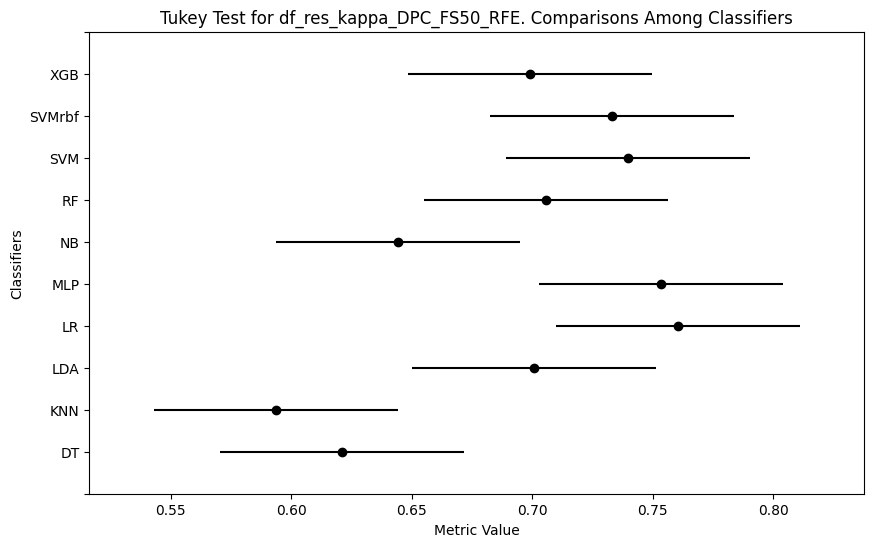


Results for the dataset df_res_kappa_Mix_FS50_RFE

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    DT    KNN   -0.025 0.9942 -0.1104 0.0604  False
    DT    LDA   0.0186 0.9994 -0.0669  0.104  False
    DT     LR    0.119 0.0008  0.0336 0.2044   True
    DT    MLP   0.1098 0.0027  0.0244 0.1952   True
    DT     NB   0.0369 0.9231 -0.0485 0.1223  False
    DT     RF   0.0778 0.1057 -0.0076 0.1632  False
    DT    SVM   0.0802  0.084 -0.0052 0.1656  False
    DT SVMrbf   0.0892 0.0334  0.0038 0.1746   True
    DT    XGB   0.0504   0.66  -0.035 0.1358  False
   KNN    LDA   0.0436 0.8172 -0.0419  0.129  False
   KNN     LR    0.144    0.0  0.0586 0.2294   True
   KNN    MLP   0.1348 0.0001  0.0494 0.2202   True
   KNN     NB   0.0619 0.3662 -0.0235 0.1473  False
   KNN     RF   0.1028 0.0067  0.0174 0.1882   True
   KNN    SVM   0.1052 0.0049  0.0198 0.1906   True
   KNN SVMrb

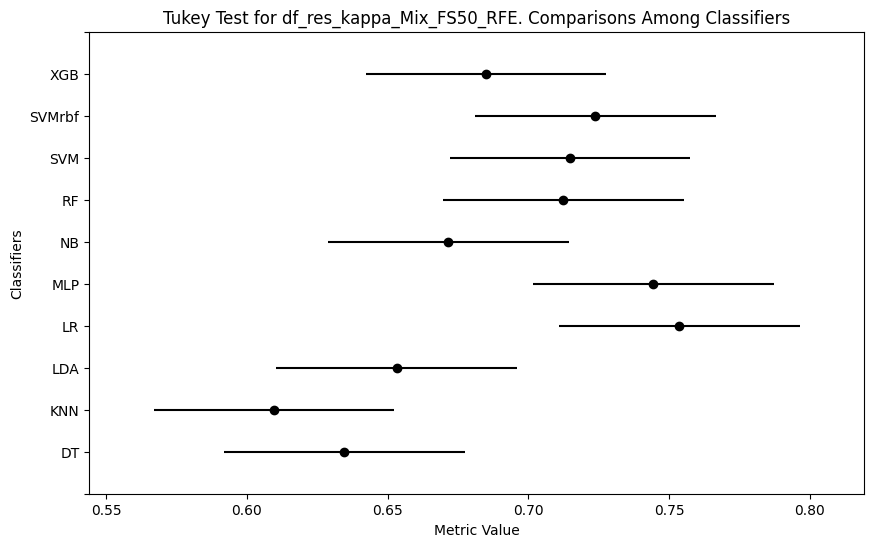


Results for the dataset df_res_kappa_AAC_FS25_RFE

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    DT    KNN   0.0322 0.9925  -0.074  0.1385  False
    DT    LDA  -0.0018    1.0  -0.108  0.1044  False
    DT     LR  -0.0154    1.0 -0.1217  0.0908  False
    DT    MLP  -0.0914  0.155 -0.1977  0.0148  False
    DT     NB   0.0118    1.0 -0.0945   0.118  False
    DT     RF   0.0094    1.0 -0.0968  0.1156  False
    DT    SVM   0.0006    1.0 -0.1056  0.1069  False
    DT SVMrbf   0.0391 0.9714 -0.0671  0.1454  False
    DT    XGB   0.0186 0.9999 -0.0877  0.1248  False
   KNN    LDA   -0.034 0.9889 -0.1403  0.0722  False
   KNN     LR  -0.0477 0.9054 -0.1539  0.0586  False
   KNN    MLP  -0.1237 0.0101 -0.2299 -0.0174   True
   KNN     NB  -0.0205 0.9998 -0.1267  0.0858  False
   KNN     RF  -0.0228 0.9995 -0.1291  0.0834  False
   KNN    SVM  -0.0316 0.9935 -0.1378  0.0746  

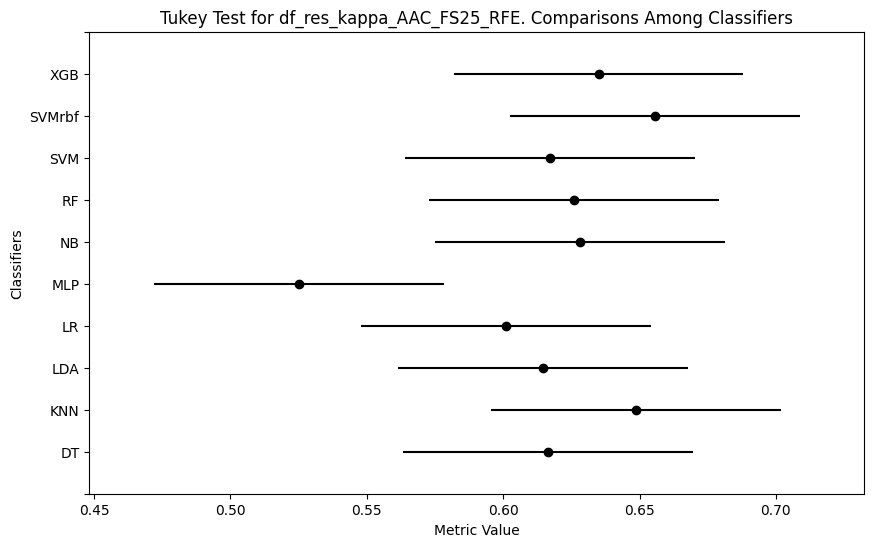


Results for the dataset df_res_kappa_DPC_FS25_RFE

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    DT    KNN  -0.0432 0.9029 -0.1389 0.0526  False
    DT    LDA   0.1211 0.0034  0.0253 0.2169   True
    DT     LR   0.1236 0.0025  0.0278 0.2193   True
    DT    MLP   0.1004 0.0322  0.0046 0.1961   True
    DT     NB   0.0416 0.9213 -0.0542 0.1374  False
    DT     RF   0.0892   0.09 -0.0066 0.1849  False
    DT    SVM    0.128 0.0015  0.0322 0.2237   True
    DT SVMrbf   0.1077 0.0153  0.0119 0.2034   True
    DT    XGB   0.0915 0.0736 -0.0043 0.1873  False
   KNN    LDA   0.1643    0.0  0.0685   0.26   True
   KNN     LR   0.1668    0.0   0.071 0.2625   True
   KNN    MLP   0.1436 0.0002  0.0478 0.2393   True
   KNN     NB   0.0848 0.1291  -0.011 0.1805  False
   KNN     RF   0.1323 0.0009  0.0366 0.2281   True
   KNN    SVM   0.1711    0.0  0.0754 0.2669   True
   KNN SVMrb

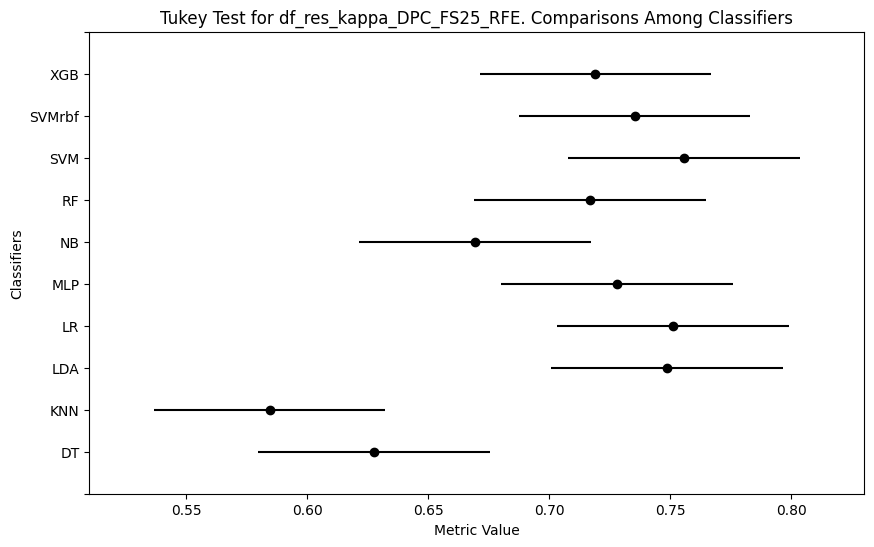


Results for the dataset df_res_kappa_Mix_FS25_RFE

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    DT    KNN  -0.0321 0.9629 -0.1157 0.0516  False
    DT    LDA   0.0705 0.1769 -0.0132 0.1541  False
    DT     LR   0.0865 0.0366  0.0029 0.1702   True
    DT    MLP    0.091  0.022  0.0074 0.1747   True
    DT     NB   0.0208 0.9983 -0.0628 0.1045  False
    DT     RF   0.0822 0.0584 -0.0015 0.1658  False
    DT    SVM   0.0773 0.0956 -0.0064 0.1609  False
    DT SVMrbf   0.0979 0.0095  0.0143 0.1816   True
    DT    XGB   0.0751 0.1179 -0.0086 0.1587  False
   KNN    LDA   0.1025 0.0052  0.0189 0.1862   True
   KNN     LR   0.1186 0.0006  0.0349 0.2023   True
   KNN    MLP   0.1231 0.0003  0.0394 0.2068   True
   KNN     NB   0.0529 0.5656 -0.0308 0.1366  False
   KNN     RF   0.1143 0.0011  0.0306 0.1979   True
   KNN    SVM   0.1094 0.0021  0.0257  0.193   True
   KNN SVMrb

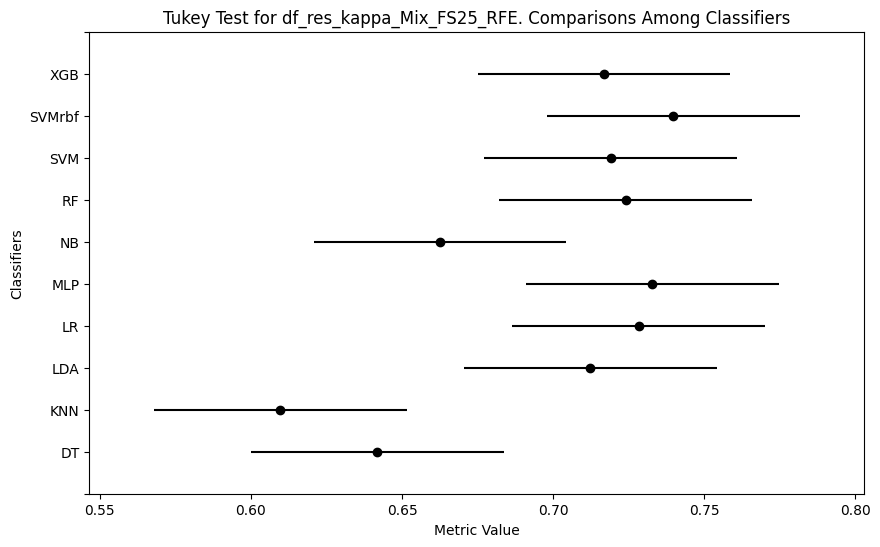

In [ ]:
# Tukey

for dataset_name, dataset in datasets_RFE.items():
    tukey_test(dataset, dataset_name)

### Statistical analysis
### For all datasets

In [ ]:
kappa_all_datasets = [df_res_kappa_AAC_RFE, df_res_kappa_DPC_RFE, df_res_kappa_Mix_RFE, df_res_kappa_AAC_FS50_RFE, df_res_kappa_DPC_FS50_RFE, df_res_kappa_Mix_FS50_RFE, df_res_kappa_AAC_FS25_RFE, df_res_kappa_DPC_FS25_RFE, df_res_kappa_Mix_FS25_RFE]
dataframe_names = ['df_res_kappa_AAC_RFE', 'df_res_kappa_DPC_RFE', 'df_res_kappa_Mix_RFE', 'df_res_kappa_AAC_FS50_RFE', 'df_res_kappa_DPC_FS50_RFE', 'df_res_kappa_Mix_FS50_RFE', 'df_res_kappa_AAC_FS25_RFE', 'df_res_kappa_DPC_FS25_RFE', 'df_res_kappa_Mix_FS25_RFE']

final_df_RFE = NB_columns(kappa_all_datasets, dataframe_names)
print(final_df_RFE)

   df_res_kappa_AAC_RFE_NB  df_res_kappa_DPC_RFE_NB  df_res_kappa_Mix_RFE_NB  \
0                 0.545455                 0.704545                 0.704545   
1                 0.522727                 0.477273                 0.522727   
2                 0.590909                 0.659091                 0.636364   
3                 0.613636                 0.613636                 0.590909   
4                 0.681818                 0.613636                 0.636364   
5                 0.568182                 0.522727                 0.568182   
6                 0.613636                 0.659091                 0.659091   
7                 0.590909                 0.636364                 0.636364   
8                 0.674419                 0.627907                 0.627907   
9                 0.744186                 0.674419                 0.697674   

   df_res_kappa_AAC_FS50_RFE_NB  df_res_kappa_DPC_FS50_RFE_NB  \
0                      0.681818                      0

In [ ]:
# one-dimensional array
kappa_data = final_df_RFE.values.flatten()

# Shapiro-Wilk
statistic, p_value = shapiro(kappa_data)

# results
print("Statistical:", statistic)
print("P value:", p_value)
print()

if p_value < 0.05:
  print("Shapiro-Wilk test rejects the null hypothesis.")
  print("The NB Dataset DOES NOT FOLLOWS a normal distribution.")

else:
  print("Shapiro-Wilk test does not reject the null hypothesis.")
  print("The NB Dataset FOLLOWS a normal distribution.")

Statistical: 0.9767743945121765
P value: 0.10697663575410843

Shapiro-Wilk test does not reject the null hypothesis.
The NB Dataset FOLLOWS a normal distribution.


In [ ]:
# ANOVA
anova(final_df_RFE, 'NB Dataset')

Statistical F: 0.7243708708819988
P value: 0.669499792204977
Does not reject the null hypothesis.
For the dataset NB Dataset THERE ARE NO statistically significant differences between the classifiers's means.



In [ ]:
# Levene's test
levene_test(final_df_RFE, 'NB Dataset')

Levene's Test Statistic: 0.567089305128924
p-value: 0.801848686113305
Does no reject null hypothesis of equal variances.
For the dataset NB Dataset THERE ARE NO statistically significant differences between the variance of the classifiers.



Results for the dataset DB Dataset

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                       group2            meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------------------
df_res_kappa_AAC_FS25_RFE_NB df_res_kappa_AAC_FS50_RFE_NB   0.0163 0.9999 -0.0979 0.1305  False
df_res_kappa_AAC_FS25_RFE_NB      df_res_kappa_AAC_RFE_NB  -0.0136    1.0 -0.1279 0.1006  False
df_res_kappa_AAC_FS25_RFE_NB df_res_kappa_DPC_FS25_RFE_NB    0.041 0.9653 -0.0732 0.1552  False
df_res_kappa_AAC_FS25_RFE_NB df_res_kappa_DPC_FS50_RFE_NB   0.0161    1.0 -0.0981 0.1303  False
df_res_kappa_AAC_FS25_RFE_NB      df_res_kappa_DPC_RFE_NB  -0.0094    1.0 -0.1236 0.1049  False
df_res_kappa_AAC_FS25_RFE_NB df_res_kappa_Mix_FS25_RFE_NB   0.0344 0.9885 -0.0799 0.1486  False
df_res_kappa_AAC_FS25_RFE_NB df_res_kappa_Mix_FS50_RFE_NB   0.0433 0.9522 -0.0709 0.1576  False
df_r

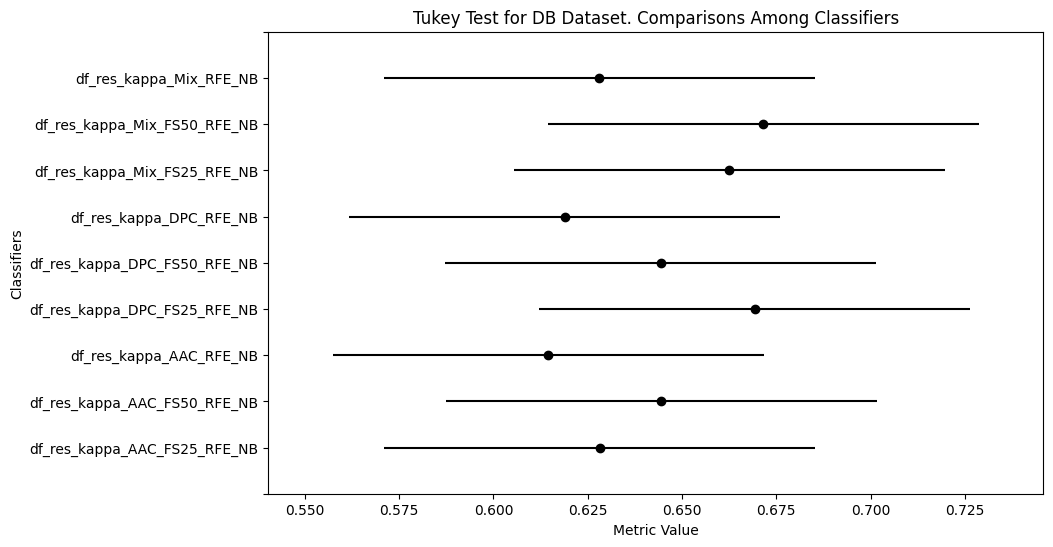

In [ ]:
#Tukey's test
tukey_test(final_df_RFE, 'DB Dataset')